# 1. Data understanding and preparation

The aim of this part is to extract some important features from the table `Laboratory_events`, in order to build insights for the patient profile. 
This notebook is divided in two parts: 
<ul>
    <li><b>Data understanding</b></li>
    <li><b>Data Preparation</b></li>
</ul>

Before diving into the further steps, ensure to have installed the data analitycs libraries: 

In [1]:
%conda install pandas seaborn scipy

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## 1.1 Data understanding

### 1.1.2 Load the dataset

read the `.csv` file we need for the **DU**. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

notebook_dir = Path().resolve()
LAB_CODES_PATH = notebook_dir.parents[1] / "Data" / "laboratory_events_codes_2.csv"
df = pd.read_csv(LAB_CODES_PATH)

### 1.1.3 Semantic understanding of features
Printing general about the dataFrame `df`

In [3]:
df.shape

(978503, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978503 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978503 non-null  float64
 1   charttime          978503 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978503 non-null  object 
 9   fluid              978503 non-null  object 
 10  examination_group  978503 non-null  object 
 11  analysis_batch_id  978503 non-null  object 
 12  qc_flag            978503 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 104.5+ MB


In [5]:
df.describe(include="all")

hadm_id            charttime   value       valuenum valueuom  \
count   9.785030e+05               978503  934025  907317.000000   884585   
unique           NaN                66403    4284            NaN       47   
top              NaN  2172-04-23 08:45:00     ___            NaN    mg/dL   
freq             NaN                   93   68645            NaN   229227   
mean    2.504395e+07                  NaN     NaN      67.332325      NaN   
std     2.868159e+06                  NaN     NaN    2175.589189      NaN   
min     2.000446e+07                  NaN     NaN    -743.000000      NaN   
25%     2.261232e+07                  NaN     NaN       4.300000      NaN   
50%     2.510567e+07                  NaN     NaN      17.000000      NaN   
75%     2.749772e+07                  NaN     NaN      60.200000      NaN   
max     2.999967e+07                  NaN     NaN  886449.000000      NaN   

        ref_range_lower  ref_range_upper      flag    label   fluid  \
count     865544.000000    865544.000000    343687   978503  978503   
unique              NaN              NaN         1      502       9   
top                 NaN              NaN  abnormal  Glucose   Blood   
freq                NaN              NaN    343687    39744  918188   
mean          31.724619        55.794861       NaN      NaN     NaN   
std           44.840840       400.515033       NaN      NaN     NaN   
min            0.000000         0.000000       NaN      NaN     NaN   
25%            3.300000         5.400000       NaN      NaN     NaN   
50%           10.400000        20.000000       NaN      NaN     NaN   
75%           36.000000        52.000000       NaN      NaN     NaN   
max         2200.000000    100000.000000       NaN      NaN     NaN   

                 examination_group analysis_batch_id qc_flag  \
count                       978503            978503  978503   
unique                         202            227052       3   
top     Complete Blood Count (CBC)   BATCH_217602_T1      OK   
freq                        286407                39  880809   
mean                           NaN               NaN     NaN   
std                            NaN               NaN     NaN   
min                            NaN               NaN     NaN   
25%                            NaN               NaN     NaN   
50%                            NaN               NaN     NaN   
75%                            NaN               NaN     NaN   
max                            NaN               NaN     NaN   

                  ref_range  
count                146215  
unique                    3  
top     Normal range: 10-20  
freq                  49098  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

## 1.2. Data Preparation

### 1.2.1 Handle duplicated records

In [6]:
df.shape
df = df.drop_duplicates()
df.shape

(978501, 14)

### 1.2.2 Missing values
We estimate the percentage of *missing values* contained in each column. 

In [7]:
df.isna().mean().sort_values(ascending=False)

ref_range            0.850572
flag                 0.648762
ref_range_lower      0.115439
ref_range_upper      0.115439
valueuom             0.095979
valuenum             0.072748
value                0.045453
charttime            0.000000
hadm_id              0.000000
label                0.000000
fluid                0.000000
examination_group    0.000000
analysis_batch_id    0.000000
qc_flag              0.000000
dtype: float64

We can create a bar chart that reports the number of missing values in each variable 

/tmp/ipykernel_12542/4090193844.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')


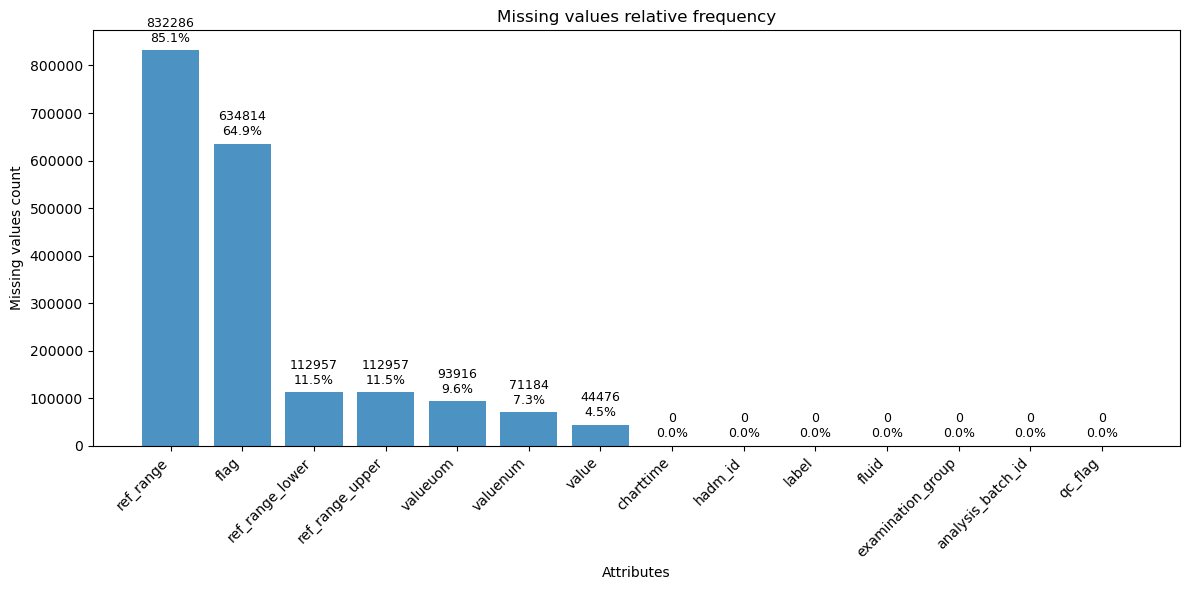

In [8]:
# Bar chart dei missing values per colonna (frequenza e percentuale)
missing_counts = df.isnull().sum()
total = len(df)
missing_counts = missing_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='tab:blue', alpha=0.8)
ax.set_title("Missing values relative frequency")
ax.set_xlabel("Attributes")
ax.set_ylabel("Missing values count")
ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')
for bar, count in zip(bars, missing_counts.values):
    pct = count / total * 100
    ax.annotate(f"{count}\n{pct:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

From this bar chart we can now see that the `flag` and `ref_range` attributes have a lot of missing values. 
Let's have a look at them.


#### 1.2.2.1 `flag`

In [9]:
df['flag'].value_counts()

flag
abnormal    343687
Name: count, dtype: int64

We can replace the `abnormal` with a 1, and the rest of the fields we put a 0 which indicates that the test is not abnormal.

In [10]:
df['flag'] = df['flag'].str.strip().str.lower()
df['flag'] = df['flag'].apply(lambda x: 1 if x == 'abnormal' else 0)
df['flag'].value_counts()

flag
0    634814
1    343687
Name: count, dtype: int64

#### 1.2.2.2 `ref_range`

This variable has ~80% of values missing. <br>
Moreover, we can observe that there isn't coerence between the values of `ref_range_lower`, `ref_range_upper` and `ref_range`. <br>
Therefore, we can drop the column `ref_range` because it has already a big percentage of missing values.

In [11]:
ref_range_not_null = df[df['ref_range'].notna()][['ref_range', 'ref_range_lower', 'ref_range_upper']]
ref_range_not_null.head()

ref_range  ref_range_lower  ref_range_upper
6   Normal range: 70-110              4.8              5.9
10   Normal range: 10-20              8.4             10.3
21     Normal range: 3-5              2.7              4.5
29     Normal range: 3-5             27.0             32.0
32  Normal range: 70-110            150.0            440.0

In [12]:
df.drop(columns=['ref_range'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978501 non-null  float64
 1   charttime          978501 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               978501 non-null  int64  
 8   label              978501 non-null  object 
 9   fluid              978501 non-null  object 
 10  examination_group  978501 non-null  object 
 11  analysis_batch_id  978501 non-null  object 
 12  qc_flag            978501 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.5+ MB


#### 1.2.2.3 `valuenum` and `valueuom` 

Let's assume we have tests that can provide useful information (insights). To infer metrics, we need to discard tests that don't have a valid `valuenum` numerical value.

In [13]:
df = df.dropna(subset=['valuenum'])
df['valuenum'].isna().mean()

np.float64(0.0)

The `valueuom` can be inferred with the type of the exam (`label`)

In [14]:
# Group by label and find the mode of valueuom for each label
valueuom_mode = df.groupby('label')['valueuom'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None) #valueuom mode of each label

# Fill missing valueuom values with the mode for each label
df['valueuom'] = df.apply(
    lambda row: valueuom_mode[row['label']] if pd.isna(row['valueuom']) else row['valueuom'],
    axis=1
)

# Display the result
# print(df['valueuom'].isna().mean())

# for each label, missing valueuom count and percentage
missing_stats = (
    df.groupby('label')['valueuom']
      .agg(total='size', missing=lambda s: s.isna().sum())
      .assign(missing_pct=lambda d: d['missing'] / d['total'] * 100)
      .sort_values('missing_pct', ascending=False)
)

# The labels with missing valueuom are discarded
df = df[~df['label'].isin(missing_stats[missing_stats['missing'] > 0].index)]
print(df['valueuom'].isna().mean())

0.0


#### 1.2.2.4 `ref_range_upper` and `ref_range_lower`

To start, we handle the missing values. <br>
We can check the percentage of missing values on the reference ranges associated with an laboratory exam (denoted by the `label`).

In [15]:
missing_pct = df.groupby(["label", "valueuom"])[["ref_range_lower", "ref_range_upper", "valuenum", "valueuom"]].apply(lambda g: g.isna().mean())
missing_pct[(missing_pct['ref_range_lower'] > 0) & (missing_pct['ref_range_upper'] > 0)]

ref_range_lower  ref_range_upper  \
label                     valueuom                                     
24 hr Calcium             mg/24hr          1.000000         1.000000   
24 hr Creatinine          mg/24hr          1.000000         1.000000   
24 hr Protein             mg/24hr          1.000000         1.000000   
Absolute Lymphocyte Count #/uL             1.000000         1.000000   
Albumin, Ascites          g/dL             1.000000         1.000000   
...                                             ...              ...   
Urea Nitrogen, Urine      mg/dL            1.000000         1.000000   
Uric Acid, Urine          mg/dL            1.000000         1.000000   
Urine Volume              mL               1.000000         1.000000   
pH                        units            0.012456         0.012456   
proBNP, Pleural           pg/mL            1.000000         1.000000   

                                    valuenum  valueuom  
label                     valueuom                      
24 hr Calcium             mg/24hr        0.0       0.0  
24 hr Creatinine          mg/24hr        0.0       0.0  
24 hr Protein             mg/24hr        0.0       0.0  
Absolute Lymphocyte Count #/uL           0.0       0.0  
Albumin, Ascites          g/dL           0.0       0.0  
...                                      ...       ...  
Urea Nitrogen, Urine      mg/dL          0.0       0.0  
Uric Acid, Urine          mg/dL          0.0       0.0  
Urine Volume              mL             0.0       0.0  
pH                        units          0.0       0.0  
proBNP, Pleural           pg/mL          0.0       0.0  

[97 rows x 4 columns]

In [16]:
print(f"Missing values percentage in reference ranges : \n {df['ref_range_lower'].isna().mean()}\n {df['ref_range_upper'].isna().mean()}")

mode_df = df.groupby('label').agg({
    'ref_range_lower': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,
    'ref_range_upper': lambda x: x.mode()[0] if len(x.mode()) > 0 else None
})

range_lower_mode, range_upper_mode = df.groupby('label').agg({
    'ref_range_lower': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,
    'ref_range_upper': lambda x: x.mode()[0] if len(x.mode()) > 0 else None
})

def fill_ref_ranges(row):
    if pd.isna(row['ref_range_lower']):
        row['ref_range_lower'] = mode_df['ref_range_lower'][row['label']]
    if pd.isna(row['ref_range_upper']):
        row['ref_range_upper'] = mode_df['ref_range_upper'][row['label']]
    return row

df = df.apply(fill_ref_ranges, axis=1)
print(f"Missing values percentage in reference ranges after mode imputation: \n {df['ref_range_lower'].isna().mean()}\n {df['ref_range_upper'].isna().mean()}")


Missing values percentage in reference ranges : 
 0.05438124497887597
 0.05438124497887597
Missing values percentage in reference ranges after mode imputation: 
 0.027609826318542932
 0.027609826318542932


After the value inference by the mode of the (`ref_range_lower`,`ref_range_upper`) for each group identified by the `label`, we delete any record that have missing ref range values. 

In [17]:
# per ogni label, conta il numero di righe e quante hanno ref_range_lower o ref_range_upper mancanti
missing_stats = (
    df.groupby('label')[['ref_range_lower', 'ref_range_upper']]
      .apply(lambda g: pd.Series({
          'total': len(g),
          'missing': g[['ref_range_lower', 'ref_range_upper']].isna().any(axis=1).sum()
      }))
      .assign(missing_pct=lambda d: d['missing'] / d['total'] * 100)
      .sort_values('missing_pct', ascending=False)
)

# rimuovi i label con almeno un missing
labels_with_missing = missing_stats[missing_stats['missing'] > 0].index

df = df[~df['label'].isin(labels_with_missing)]

print("Missing percentage after removal:")
print(df['ref_range_lower'].isna().mean())
print(df['ref_range_upper'].isna().mean())

Missing percentage after removal:
0.0
0.0


Now, we can conclude that we have no missing values in our dataframe. 

In [18]:
df.isna().mean().sort_values(ascending=False)

hadm_id              0.0
charttime            0.0
value                0.0
valuenum             0.0
valueuom             0.0
ref_range_lower      0.0
ref_range_upper      0.0
flag                 0.0
label                0.0
fluid                0.0
examination_group    0.0
analysis_batch_id    0.0
qc_flag              0.0
dtype: float64

### 1.2.3 Detecting redundant variables

In [19]:
df['value'] = df['value'].replace(['-', '--', '', ' '], np.nan)
df['value'] = (
    df['value']
    .str.replace('<', '', regex=False)
    .str.replace('>', '', regex=False)
)
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'] = df['value'].astype('float64')

In [20]:
df[['value', 'valuenum']].corr()

value  valuenum
value       1.0       1.0
valuenum    1.0       1.0

We observe that `value` is completely redundant, so we remove it. 

In [21]:
df = df.drop(columns=["value"])

## 1.3 Data quality

### 1.3.1 Normalization 

The only numerical attributes that we have are: `ref_range_lower`, `ref_range_upper`, `valuenum`. <br>
Before digging on the analysis of their distribution we need to normalize them w.r.t. the unit of measure (`valueuom`). 

In [22]:
# Identify labels with multiple units of measurement 
import seaborn as sns
import matplotlib.pyplot as plt

grouped = df.groupby('label')['valueuom']
multi = grouped.nunique()
multi = multi[multi > 1]

for label in multi.index:
    subset = df[df['label'] == label]
    print(f"{label}")
    for col in ['ref_range_lower', 'ref_range_upper']:
        vc = subset[col].value_counts()
        n_unique = vc.size
        print(f"  {col}: unique={n_unique}")
    print("-" * 60)


Absolute Lymphocyte Count
  ref_range_lower: unique=1
  ref_range_upper: unique=1
------------------------------------------------------------
D-Dimer
  ref_range_lower: unique=1
  ref_range_upper: unique=1
------------------------------------------------------------
HIV 1 Viral Load
  ref_range_lower: unique=1
  ref_range_upper: unique=1
------------------------------------------------------------
Heparin
  ref_range_lower: unique=1
  ref_range_upper: unique=1
------------------------------------------------------------
MCHC
  ref_range_lower: unique=2
  ref_range_upper: unique=2
------------------------------------------------------------
Protein/Creatinine Ratio
  ref_range_lower: unique=1
  ref_range_upper: unique=1
------------------------------------------------------------


In [47]:
#principal unit measure -> mode (the more frequent unit of measure for each label)
main_unit = (
    df.groupby("label")["valueuom"]
      .agg(lambda x: x.mode()[0])
)

for label in multi.index:
    print (f"{label} : {main_unit[label]}")

Absolute Lymphocyte Count : K/uL
D-Dimer : ng/mL
HIV 1 Viral Load : log10 cop/mL
Heparin : IU/mL
MCHC : %
Protein/Creatinine Ratio : Ratio


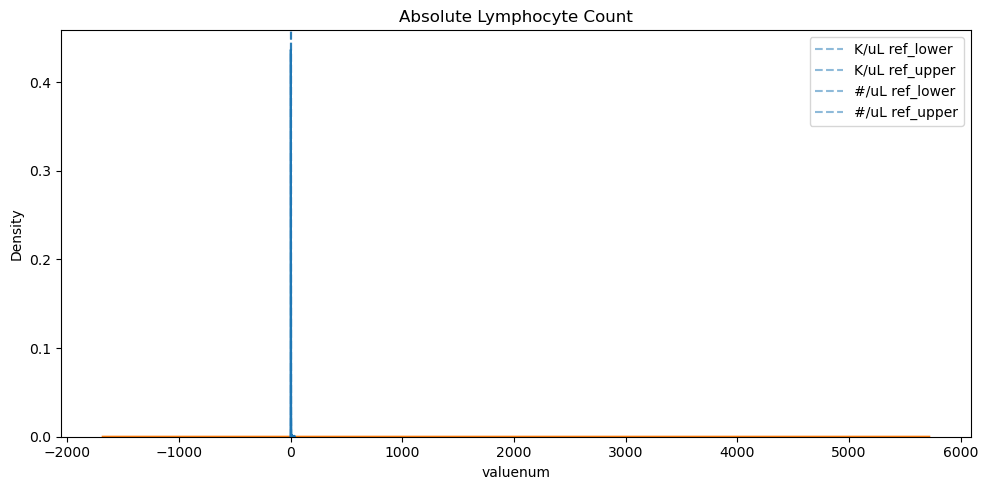

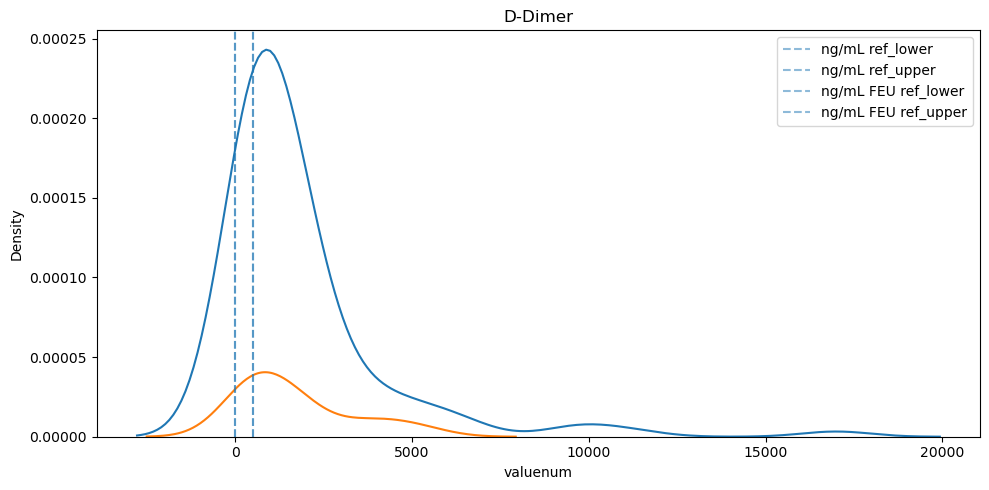

/tmp/ipykernel_12542/3005446217.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, x='valuenum', hue='valueuom', ax=ax)


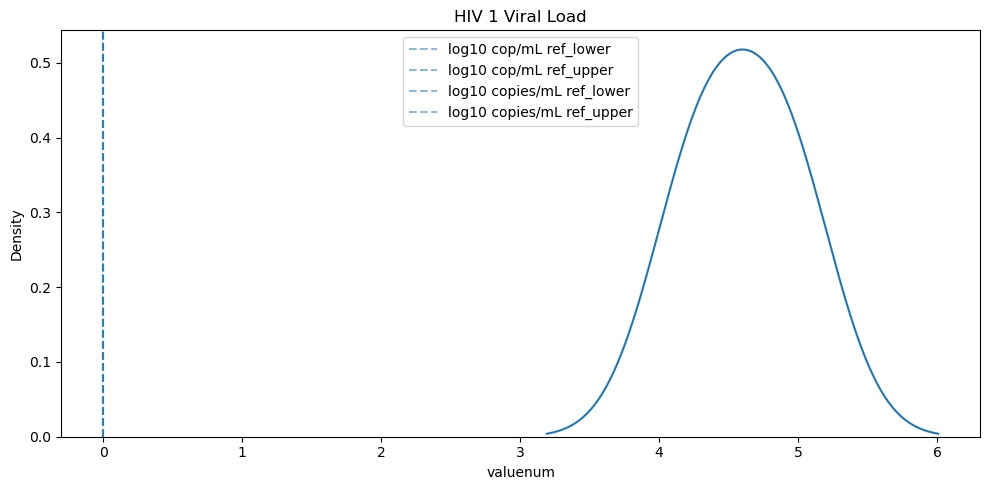

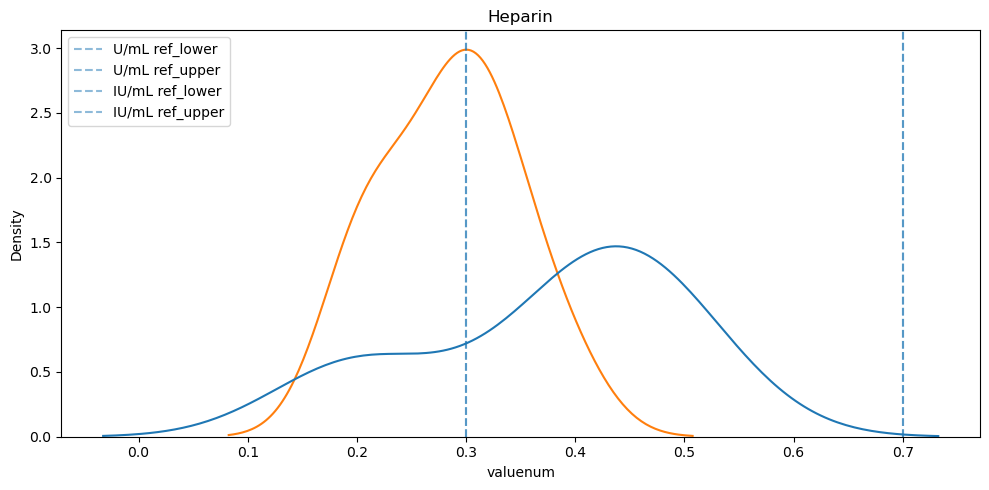

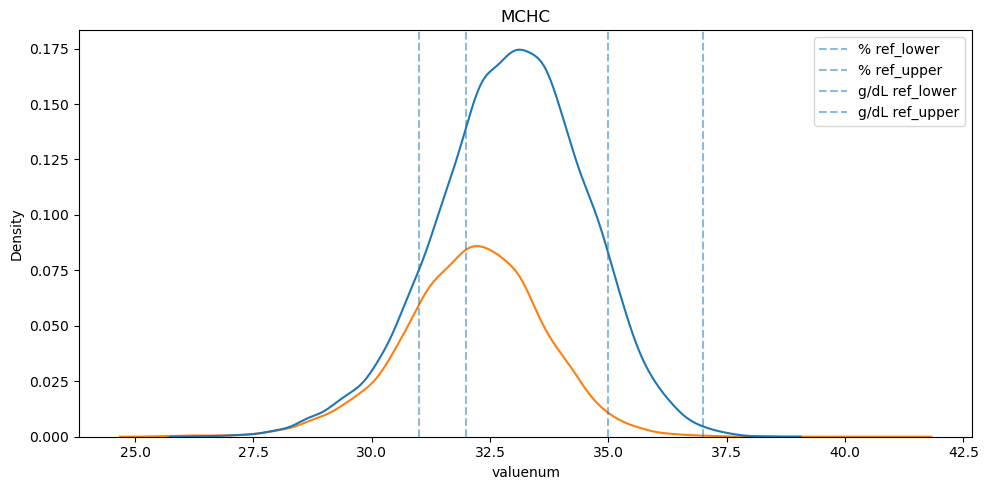

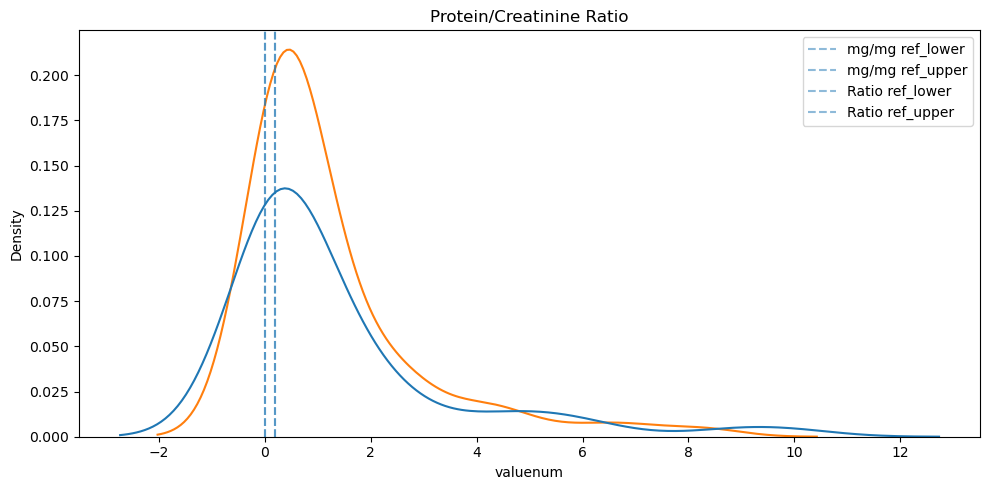

In [27]:
# Identify labels with multiple units of measurement and plot their distributions
import seaborn as sns
import matplotlib.pyplot as plt

grouped = df.groupby('label')['valueuom']
multi = grouped.nunique()
multi = multi[multi > 1]

for label in multi.index:
    subset = df[df['label'] == label]
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.kdeplot(data=subset, x='valuenum', hue='valueuom', ax=ax)
    
    # Add reference range lines for each unit of measurement
    for uom in subset['valueuom'].unique():
        uom_data = subset[subset['valueuom'] == uom]
        ref_lower = uom_data['ref_range_lower'].iloc[0]
        ref_upper = uom_data['ref_range_upper'].iloc[0]
        ax.axvline(ref_lower, linestyle='--', alpha=0.5, label=f'{uom} ref_lower')
        ax.axvline(ref_upper, linestyle='--', alpha=0.5, label=f'{uom} ref_upper')
    
    ax.set_title(label)
    ax.legend()
    plt.tight_layout()
    plt.show()


In [40]:
df[(df['label'] == 'Absolute Lymphocyte Count') & (df['valueuom'] == '#/uL')]

hadm_id            charttime  valuenum valueuom  ref_range_lower  \
116181  27078182.0  2188-11-23 00:15:00     210.0     #/uL              1.2   
137216  28660165.0  2199-01-28 16:10:00    1776.0     #/uL              1.2   
260271  23281464.0  2176-11-22 09:07:00    1125.0     #/uL              1.2   
382420  21135197.0  2182-08-11 09:25:00     957.0     #/uL              1.2   
386138  23893442.0  2167-04-20 21:24:00     490.0     #/uL              1.2   
415635  28635908.0  2144-05-10 09:55:00    2183.0     #/uL              1.2   
443461  28910138.0  2184-07-28 02:28:00    3825.0     #/uL              1.2   
672620  26250558.0  2158-07-25 06:30:00     680.0     #/uL              1.2   
746749  24912593.0  2162-12-13 21:04:00     868.0     #/uL              1.2   
750162  26589042.0  2154-04-16 09:50:00    1008.0     #/uL              1.2   
893795  21905656.0  2132-10-04 08:40:00     686.0     #/uL              1.2   

        ref_range_upper  flag                      label  fluid  \
116181              3.7     0  Absolute Lymphocyte Count  Blood   
137216              3.7     0  Absolute Lymphocyte Count  Blood   
260271              3.7     0  Absolute Lymphocyte Count  Blood   
382420              3.7     0  Absolute Lymphocyte Count  Blood   
386138              3.7     0  Absolute Lymphocyte Count  Blood   
415635              3.7     0  Absolute Lymphocyte Count  Blood   
443461              3.7     0  Absolute Lymphocyte Count  Blood   
672620              3.7     0  Absolute Lymphocyte Count  Blood   
746749              3.7     0  Absolute Lymphocyte Count  Blood   
750162              3.7     0  Absolute Lymphocyte Count  Blood   
893795              3.7     0  Absolute Lymphocyte Count  Blood   

                 examination_group analysis_batch_id qc_flag  
116181  Complete Blood Count (CBC)   BATCH_218811_I6      OK  
137216  Complete Blood Count (CBC)   BATCH_219901_V8      OK  
260271  Complete Blood Count (CBC)   BATCH_217611_N4      OK  
382420  Complete Blood Count (CBC)   BATCH_218208_J1      OK  
386138  Complete Blood Count (CBC)   BATCH_216704_T6      OK  
415635  Complete Blood Count (CBC)   BATCH_214405_A6      OK  
443461  Complete Blood Count (CBC)   BATCH_218407_F7      OK  
672620  Complete Blood Count (CBC)   BATCH_215807_J7      OK  
746749  Complete Blood Count (CBC)   BATCH_216212_J1      OK  
750162  Complete Blood Count (CBC)   BATCH_215404_D6      OK  
893795  Complete Blood Count (CBC)   BATCH_213210_I4      OK

`Absolute Lymphocyte Count`: The `#/uL` means the amount of cells that are in one microliter. Meanwhile `K/uL` means thousands of cells in a microliter. <br>
We normalize only the `valuenum` in the unit of measurement represented by the mode (`K/uL`). 

In [42]:
mask = (df['label'] == 'Absolute Lymphocyte Count') & (df['valueuom'] == '#/uL')
df.loc[mask, 'valuenum'] = df.loc[mask, 'valuenum'] / 1000
df.loc[mask, 'valueuom'] = 'K/uL'
df[(df['label'] == 'Absolute Lymphocyte Count') & (df['valueuom'] == '#/uL')]

Empty DataFrame
Columns: [hadm_id, charttime, valuenum, valueuom, ref_range_lower, ref_range_upper, flag, label, fluid, examination_group, analysis_batch_id, qc_flag]
Index: []

`D-dimer`: `ng/mL` and `ng/mL FEU` are the same unit, so we substitute for the mode of the unit

In [44]:
mask = (df['label'] == 'D-Dimer') & (df['valueuom'] == 'ng/mL FEU')
df.loc[mask, 'valueuom'] = 'ng/mL'
df[(df['label'] == 'D-Dimer') & (df['valueuom'] == 'ng/mL FEU')]

Empty DataFrame
Columns: [hadm_id, charttime, valuenum, valueuom, ref_range_lower, ref_range_upper, flag, label, fluid, examination_group, analysis_batch_id, qc_flag]
Index: []

`HIV 1 Viral Load`: the standard unit of measure is copies/mL. We don't need to normalize the data in this case because they are representing the same unit of measure.

In [ ]:
mask = (df['label'] == 'HIV 1 Viral Load') & (df['valueuom'] == 'log10 cop/mL')
df.loc[mask, 'valueuom'] = 'log10 copies/mL'
df[(df['label'] == 'HIV 1 Viral Load') & (df['valueuom'] == 'log10 cop/mL')]

Empty DataFrame
Columns: [hadm_id, charttime, valuenum, valueuom, ref_range_lower, ref_range_upper, flag, label, fluid, examination_group, analysis_batch_id, qc_flag]
Index: []

`Heparin`: Both IU/mL and U/mL refer to the anticoagulant activity of heparin per milliliter of solution. <br>
"International Unit" (IU) is the official term established by the World Health Organization (WHO) to standardize the measurement of biological activities, including heparin. <br>
 The abbreviation "U" is frequently used in clinical settings for simplicity and does not represent a different unit.

In [58]:
mask = (df['label'] == 'Heparin') & (df['valueuom'] == 'U/mL')
df.loc[mask, 'valueuom'] = 'IU/mL'

In [57]:
df[(df['label'] == 'Heparin') & (df['valueuom'] == 'IU/mL')]

hadm_id            charttime  valuenum valueuom  ref_range_lower  \
201599  26918726.0  2187-04-17 11:04:00      0.20    IU/mL              0.3   
254487  21332395.0  2163-07-23 17:56:00      0.39    IU/mL              0.3   
254534  21332395.0  2163-07-24 01:11:00      0.33    IU/mL              0.3   
254543  21332395.0  2163-07-24 07:04:00      0.30    IU/mL              0.3   
254645  21332395.0  2163-07-24 13:19:00      0.27    IU/mL              0.3   
254699  21332395.0  2163-07-24 18:20:00      0.34    IU/mL              0.3   
254716  21332395.0  2163-07-24 23:34:00      0.20    IU/mL              0.3   
257048  21332395.0  2163-08-17 14:31:00      0.20    IU/mL              0.3   
257114  21332395.0  2163-08-18 07:27:00      0.23    IU/mL              0.3   
515840  22606489.0  2164-05-06 15:08:00      0.28    IU/mL              0.3   
902574  26941902.0  2176-02-22 19:39:00      0.31    IU/mL              0.3   
922377  24353131.0  2133-12-03 14:00:00      0.50    IU/mL              0.3   
950558  29218436.0  2135-05-31 22:24:00      0.43    IU/mL              0.3   
950719  29218436.0  2135-06-01 10:37:00      0.20    IU/mL              0.3   
950792  29218436.0  2135-06-01 20:40:00      0.41    IU/mL              0.3   
950902  29218436.0  2135-06-02 06:05:00      0.44    IU/mL              0.3   
950999  29218436.0  2135-06-02 14:59:00      0.48    IU/mL              0.3   
975353  27777812.0  2143-03-09 09:58:00      0.36    IU/mL              0.3   

        ref_range_upper  flag    label  fluid           examination_group  \
201599              0.7     1  Heparin  Blood  Coagulation and Hemostasis   
254487              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
254534              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
254543              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
254645              0.7     1  Heparin  Blood  Coagulation and Hemostasis   
254699              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
254716              0.7     1  Heparin  Blood  Coagulation and Hemostasis   
257048              0.7     1  Heparin  Blood  Coagulation and Hemostasis   
257114              0.7     1  Heparin  Blood  Coagulation and Hemostasis   
515840              0.7     1  Heparin  Blood  Coagulation and Hemostasis   
902574              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
922377              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
950558              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
950719              0.7     1  Heparin  Blood  Coagulation and Hemostasis   
950792              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
950902              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
950999              0.7     0  Heparin  Blood  Coagulation and Hemostasis   
975353              0.7     0  Heparin  Blood  Coagulation and Hemostasis   

       analysis_batch_id qc_flag  
201599   BATCH_218704_S5      OK  
254487   BATCH_216307_P7      OK  
254534   BATCH_216307_X2      OK  
254543   BATCH_216307_F2      OK  
254645   BATCH_216307_S9      OK  
254699   BATCH_216307_C4      OK  
254716   BATCH_216307_L1      OK  
257048   BATCH_216308_S2    WARN  
257114   BATCH_216308_K7      OK  
515840   BATCH_216405_K8      OK  
902574   BATCH_217602_Y9      OK  
922377   BATCH_213312_M2      OK  
950558   BATCH_213505_A4      OK  
950719   BATCH_213505_C7      OK  
950792   BATCH_213505_G9      OK  
950902   BATCH_213506_W8      OK  
950999   BATCH_213506_W7      OK  
975353   BATCH_214303_D6      OK

`MCHC`: `g/dL` is the standard unit for expressing the average concentration of hemoglobin in a volume of red blood cells. <br>
Meanwhile `%` is a percentage value of the hemoglobin concentration within the red blood cells and is numerically equivalent to the g/dL value. <br>
In conclusion, they are both equivalent. <br>
We take g/dL given that it's the mode and the standard unit of measure.
In this particular setting, we need to normalize the records put in `%` measure. 
The normalization applied is in the range of 32% and 36% (see <a href="https://en.wikipedia.org/wiki/Mean_corpuscular_hemoglobin_concentration" > Wiki </a>)

In [ ]:
# MCHC normalization from g/dL to %
lbl = 'MCHC'
u_from, u_to = 'g/dL', '%'

mask_from = (df['label'] == lbl) & (df['valueuom'] == u_from)
mask_to   = (df['label'] == lbl) & (df['valueuom'] == u_to)

#ref range in %
ref_lower = df.loc[mask_to, 'ref_range_lower'].unique()[0]
ref_upper = df.loc[mask_to, 'ref_range_upper'].unique()[0]

# ref range in g/dL
gdl_lower = df.loc[mask_from, 'ref_range_lower'].unique()[0]
gdl_upper = df.loc[mask_from, 'ref_range_upper'].unique()[0]

# linear scaling factor
scale = (ref_upper - ref_lower) / (gdl_upper - gdl_lower)

df.loc[mask_from, 'valuenum'] = (
    ref_lower +
    (df.loc[mask_from, 'valuenum'] - gdl_lower) * scale
)

# units update
df.loc[mask_from, 'valueuom'] = u_to
df.loc[mask_from, 'ref_range_lower'] = ref_lower
df.loc[mask_from, 'ref_range_upper'] = ref_upper

Reference range (target: %): 31.0–35.0
Reference range (from g/dL): 32.0–37.0
Conversione completata.


`Protein/Creatinine ratio`: The different `valueuom` (that is, `Ratio` and `mg/mg`) indicate the same measure, that is the protein/creatinine ratio in urine used to evaluate kidney function. We can substitute the `valueuom` of `mg/mg` into `Ratio` (the mode of this measure, in this particular label) 

In [89]:
mask_mg = ((df['label'] == 'Protein/Creatinine Ratio') & (df['valueuom'] == 'mg/mg'))
df.loc[mask_mg, 'valueuom'] = 'Ratio'
df[mask_mg]

hadm_id            charttime  valuenum valueuom  ref_range_lower  \
1296    20051301.0  2138-04-30 16:33:00       0.3    Ratio              0.0   
8602    29765478.0  2164-03-08 21:22:00       0.2    Ratio              0.0   
12031   23333218.0  2193-04-11 14:30:00       0.6    Ratio              0.0   
14570   21303564.0  2193-02-08 20:00:00       0.5    Ratio              0.0   
21143   23709960.0  2189-07-01 01:36:00       0.2    Ratio              0.0   
35865   29187882.0  2172-08-03 15:24:00       1.8    Ratio              0.0   
37043   23737808.0  2190-04-22 15:26:00       0.2    Ratio              0.0   
39081   27444901.0  2145-02-07 08:15:00       0.1    Ratio              0.0   
52527   20727689.0  2148-12-26 17:00:00       0.6    Ratio              0.0   
56638   20794194.0  2116-12-06 16:51:00       0.3    Ratio              0.0   
66581   22655936.0  2182-05-15 05:13:00       0.4    Ratio              0.0   
67482   22655936.0  2182-05-28 23:36:00       0.3    Ratio              0.0   
82141   24010879.0  2129-11-12 04:10:00       0.2    Ratio              0.0   
82748   25374622.0  2194-11-01 16:20:00       0.2    Ratio              0.0   
91571   22696152.0  2147-10-18 21:24:00       0.2    Ratio              0.0   
100976  29761340.0  2154-01-27 23:02:00       6.2    Ratio              0.0   
132239  24867834.0  2169-01-19 08:32:00       0.1    Ratio              0.0   
141194  23284617.0  2141-04-07 18:13:00       8.8    Ratio              0.0   
141316  23284617.0  2141-04-11 17:52:00       9.9    Ratio              0.0   
179754  23026285.0  2136-12-22 10:46:00       0.2    Ratio              0.0   
184516  29735443.0  2118-03-06 05:14:00       0.5    Ratio              0.0   
184603  29735443.0  2118-03-07 12:42:00       0.2    Ratio              0.0   
205481  26442707.0  2182-03-25 18:06:00       2.0    Ratio              0.0   
206718  28946055.0  2118-12-03 01:00:00       0.2    Ratio              0.0   
227738  28660961.0  2128-10-05 17:30:00       2.3    Ratio              0.0   
227750  28660961.0  2128-10-05 22:00:00       2.6    Ratio              0.0   
250111  29807221.0  2122-12-19 13:49:00       5.7    Ratio              0.0   
295530  28977543.0  2158-08-02 14:55:00       4.2    Ratio              0.0   
325869  20275615.0  2183-01-08 00:30:00       0.6    Ratio              0.0   
328701  23745269.0  2203-05-06 23:49:00       0.2    Ratio              0.0   
330429  23972251.0  2122-06-21 12:09:00       1.7    Ratio              0.0   
386146  23893442.0  2167-04-20 22:26:00       0.1    Ratio              0.0   
389107  22774707.0  2170-04-26 12:20:00       0.1    Ratio              0.0   
417311  27322715.0  2179-11-15 21:53:00       0.5    Ratio              0.0   
420079  22671714.0  2184-12-23 16:41:00       0.2    Ratio              0.0   
433605  27782722.0  2193-03-01 02:08:00       0.2    Ratio              0.0   
443548  28910138.0  2184-07-29 19:01:00       0.2    Ratio              0.0   
473108  23035487.0  2130-08-26 14:40:00       0.1    Ratio              0.0   
537344  25566090.0  2168-05-09 17:47:00       2.0    Ratio              0.0   
542277  27197903.0  2164-08-14 23:20:00       0.2    Ratio              0.0   
573670  21014169.0  2125-08-18 17:26:00       1.6    Ratio              0.0   
573674  21014169.0  2125-08-18 17:26:00       1.6    Ratio              0.0   
574329  22323832.0  2198-10-31 17:24:00       0.2    Ratio              0.0   
615503  28630099.0  2124-02-28 20:01:00       1.8    Ratio              0.0   
626696  25742495.0  2201-02-06 18:35:00       0.4    Ratio              0.0   
626945  25742495.0  2201-02-15 00:38:00       1.6    Ratio              0.0   
675777  24593964.0  2168-03-03 00:35:00       0.6    Ratio              0.0   
692530  23605219.0  2125-07-30 04:37:00       0.4    Ratio              0.0   
694080  29937885.0  2149-01-24 19:55:00       0.3    Ratio              0.0   
721402  23522597.0  2133-04-19 17:08:00       0.3    Ratio   

### 1.3.2 Detect outliers 

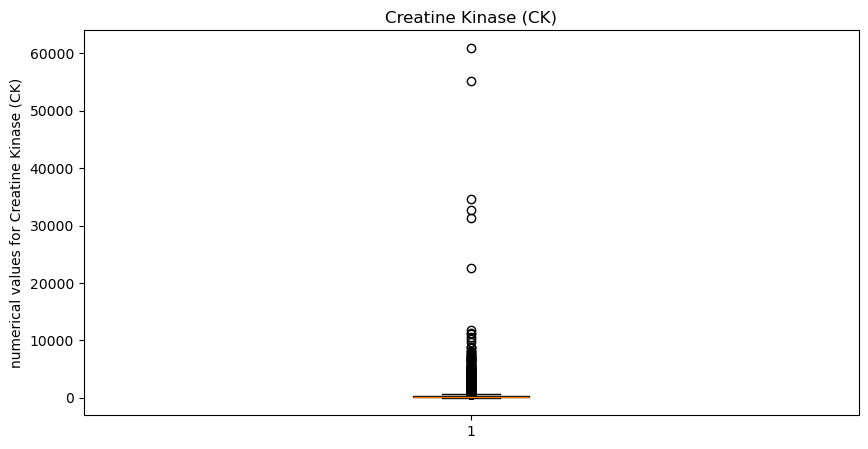

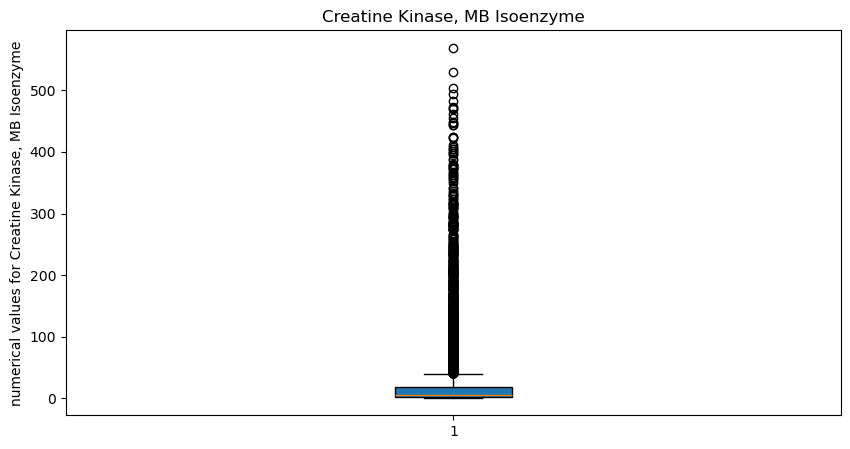

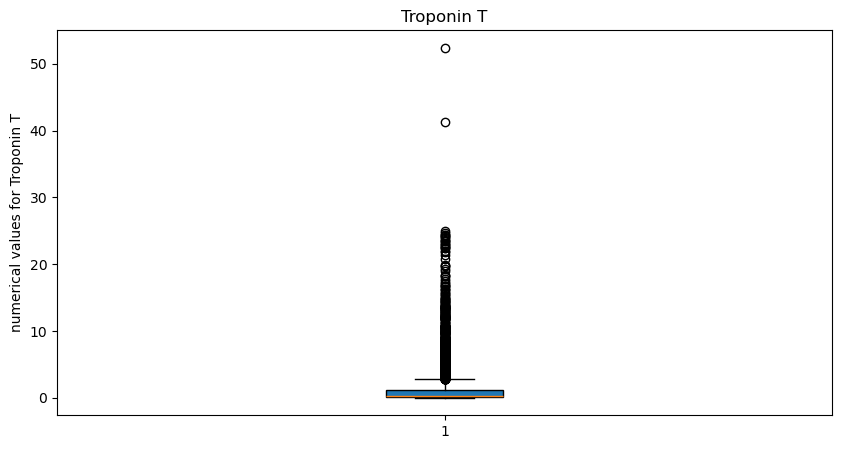

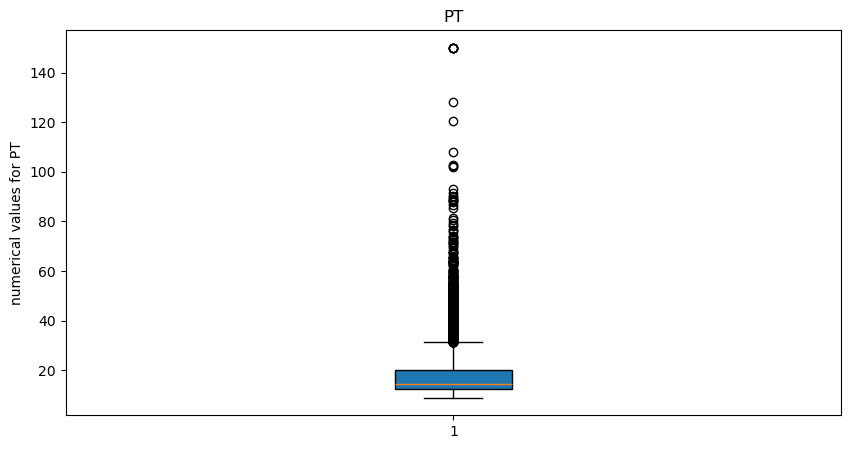

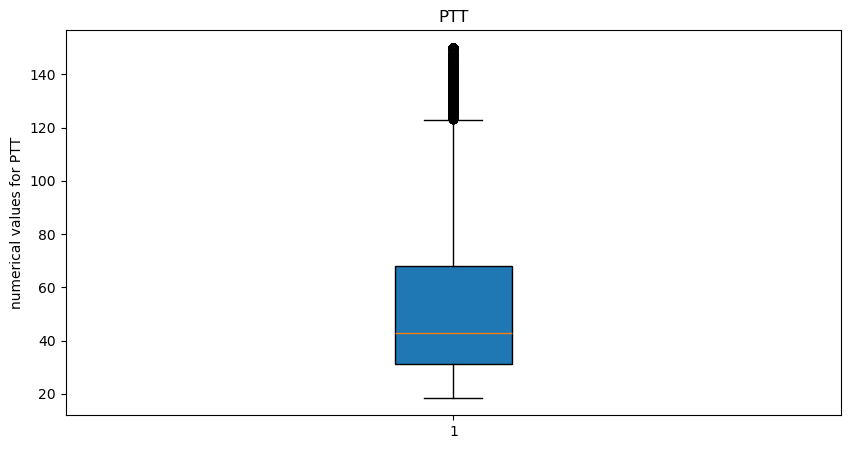

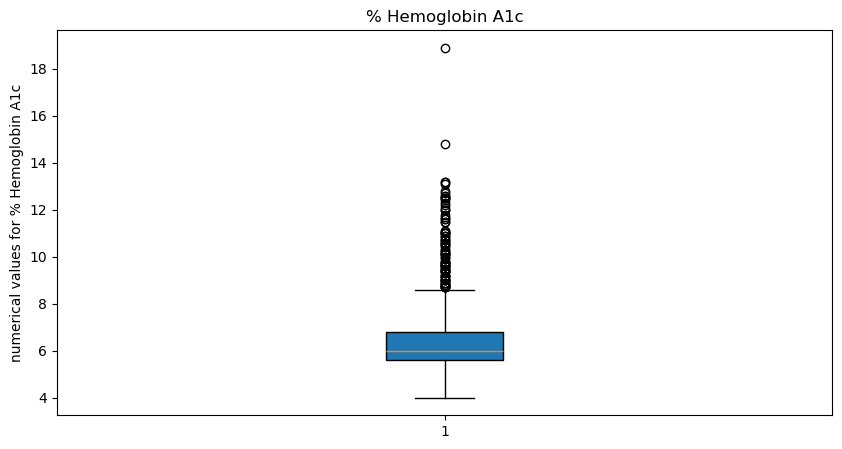

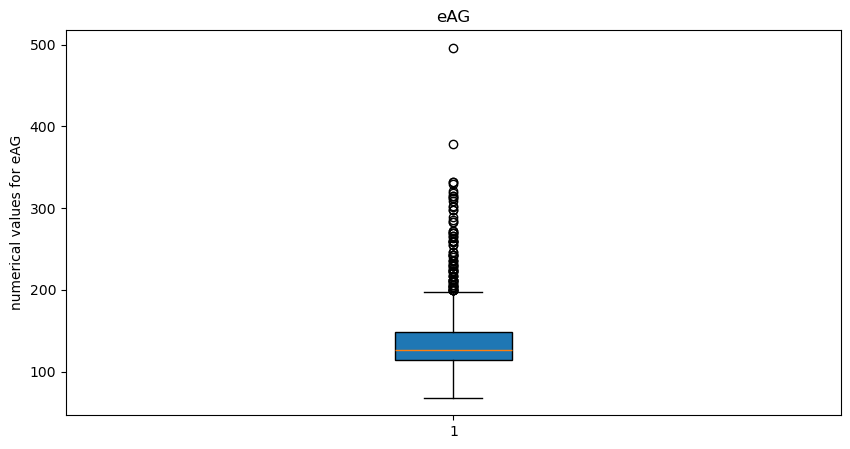

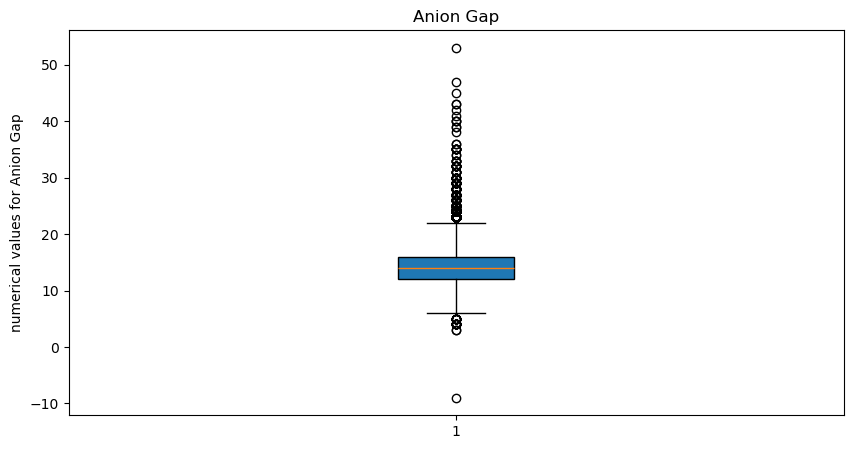

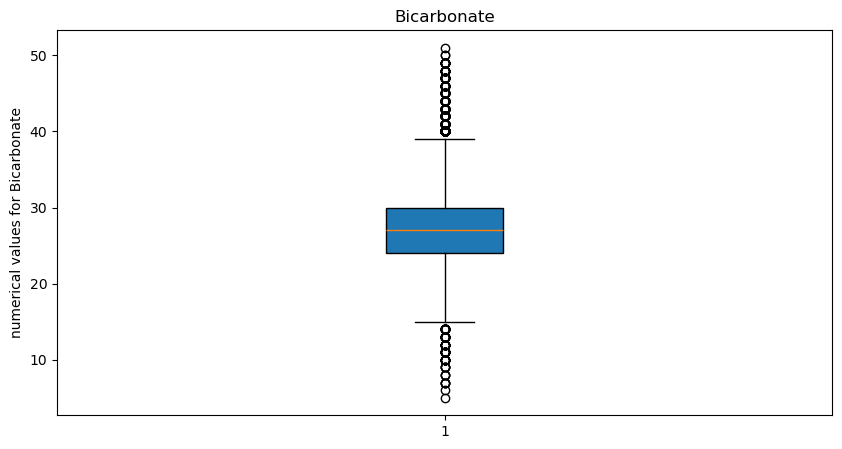

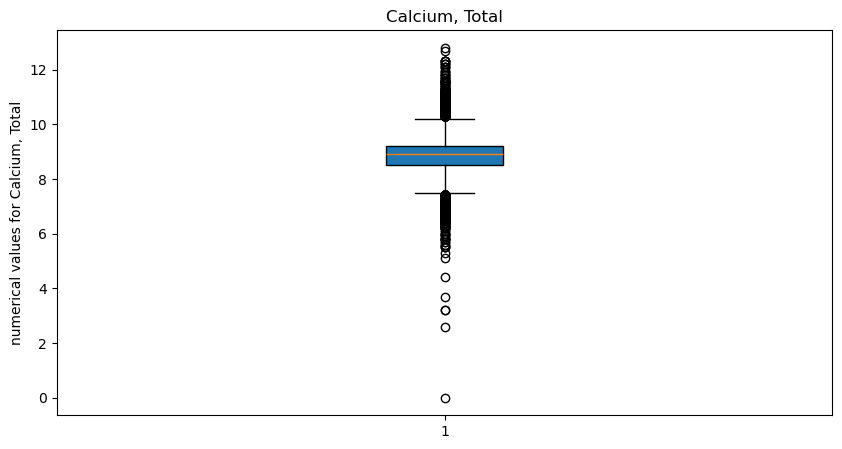

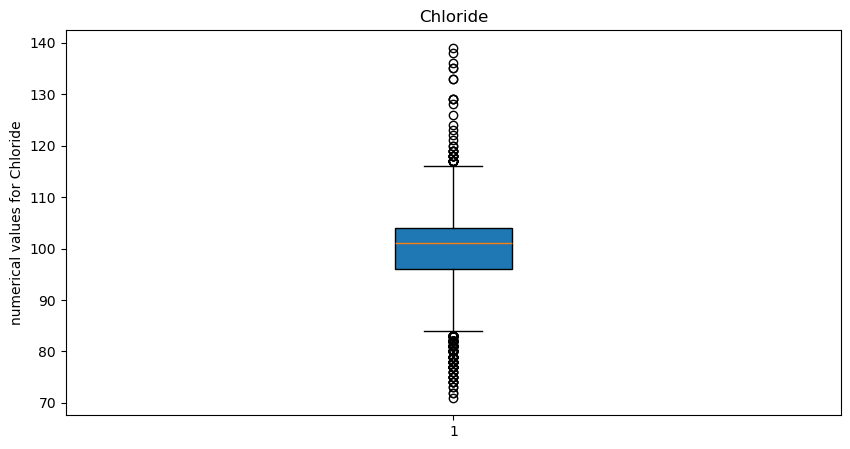

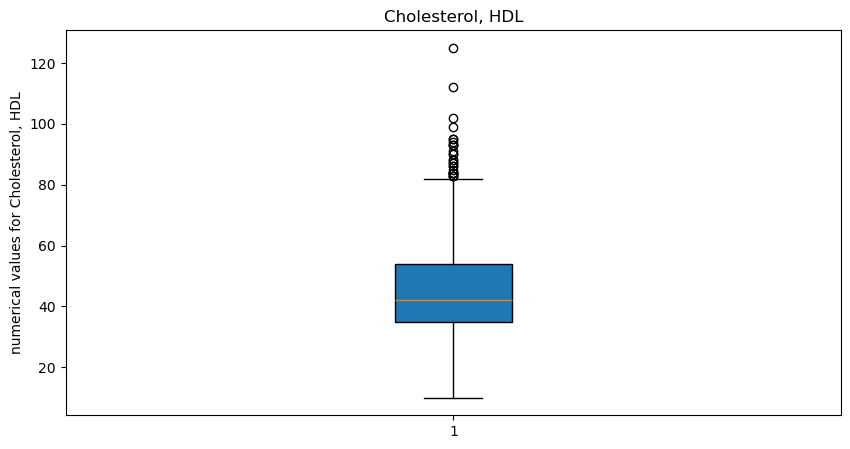

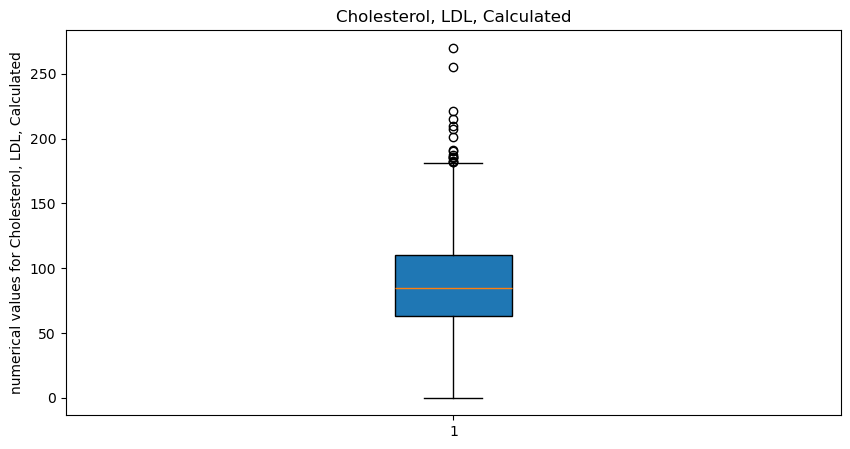

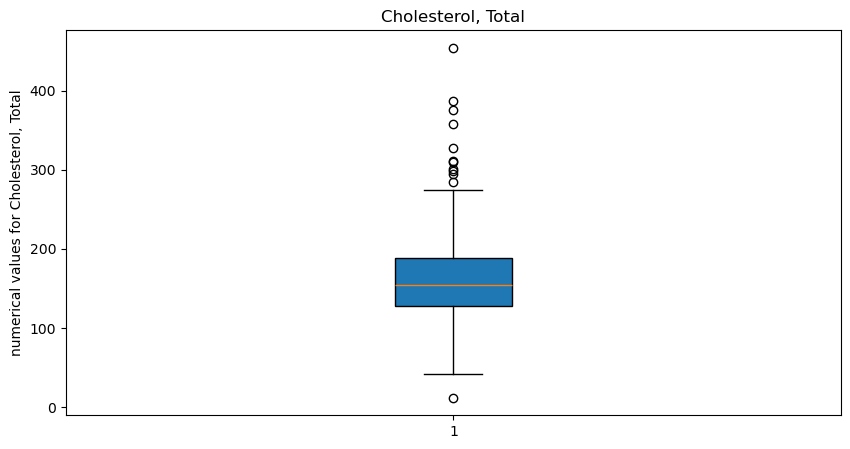

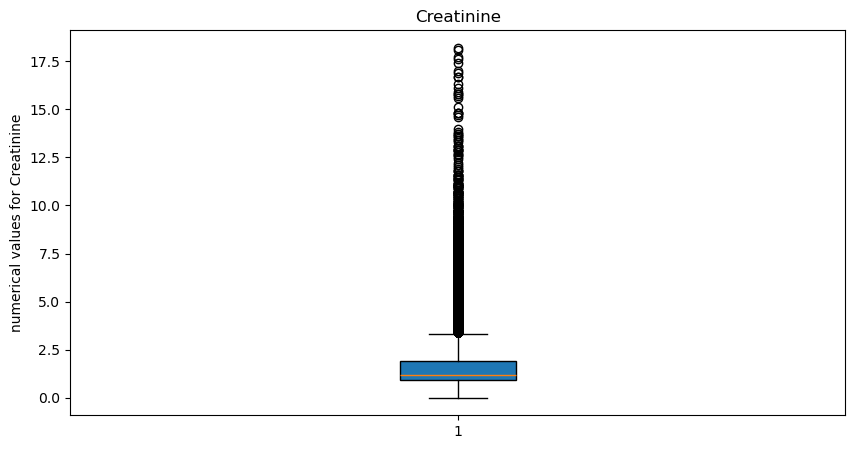

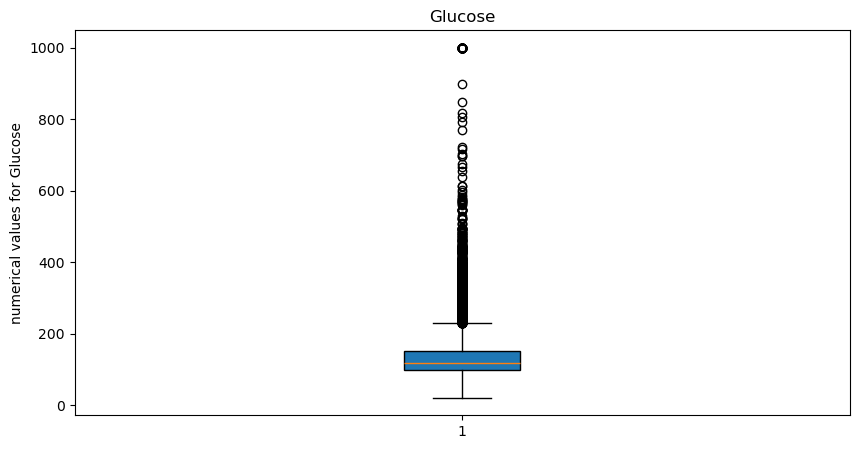

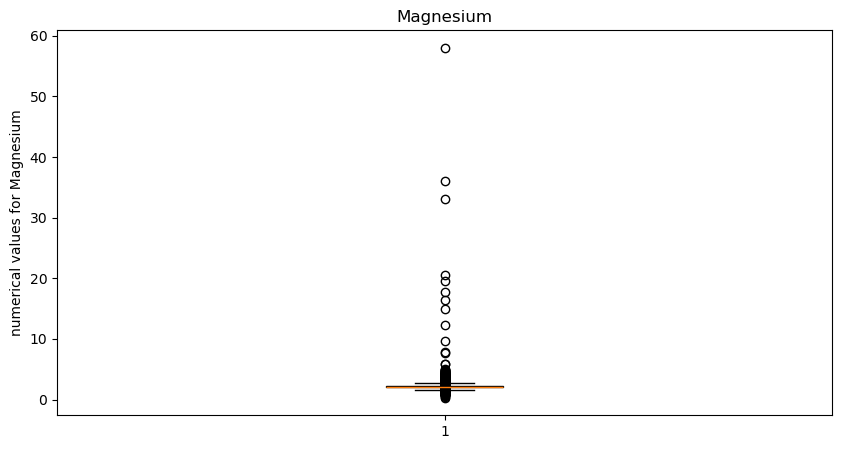

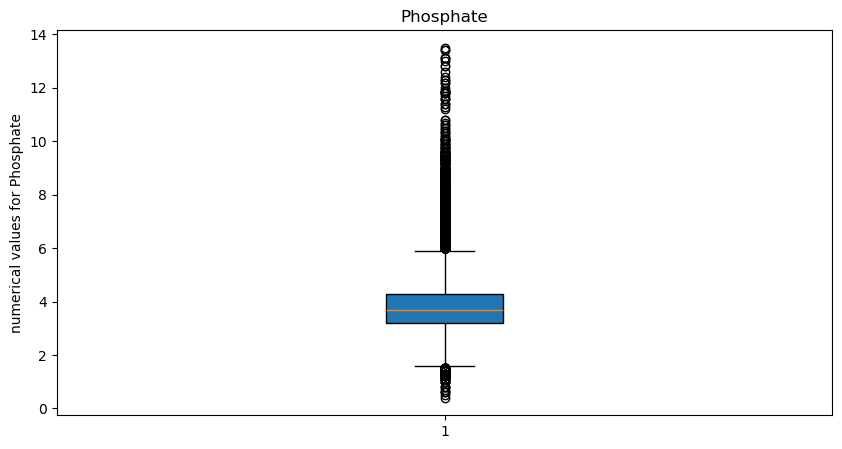

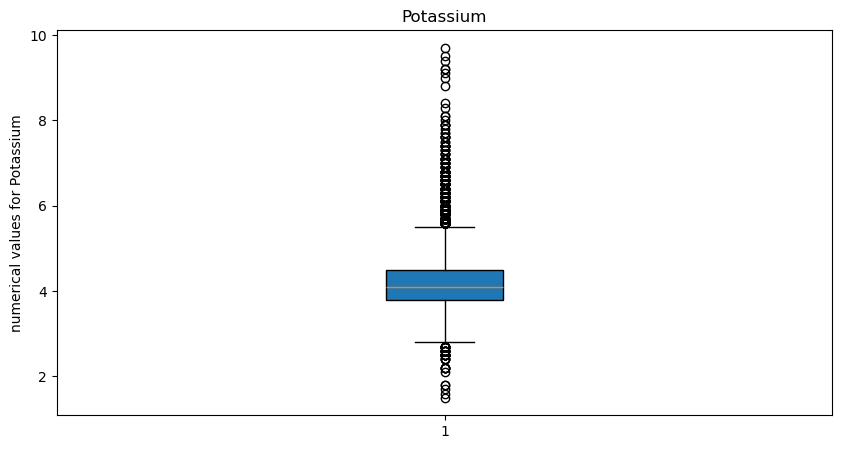

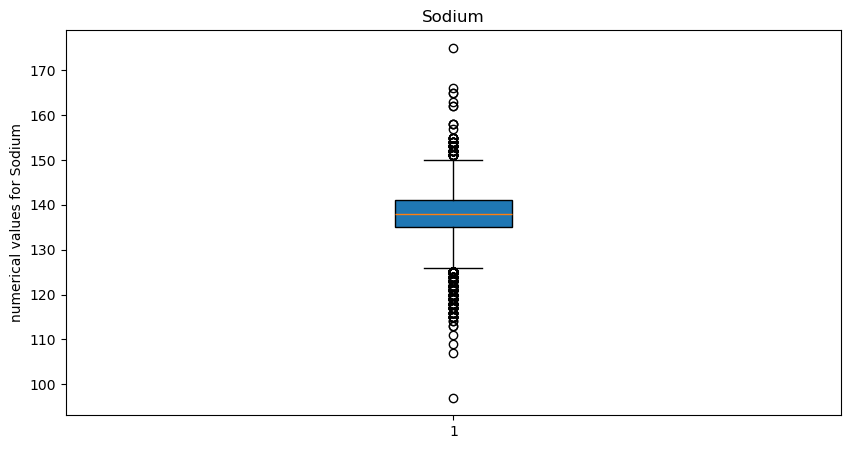

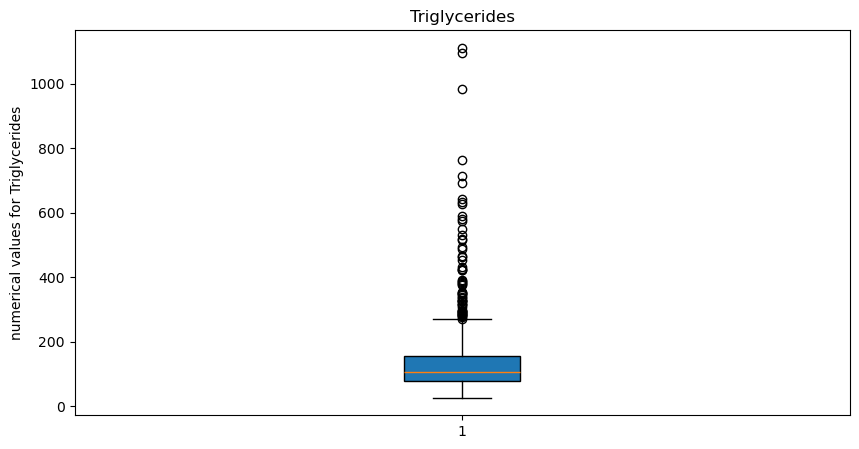

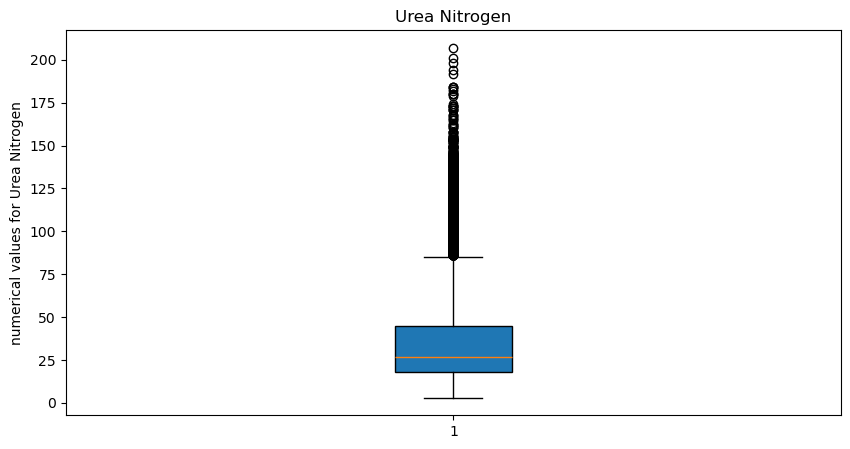

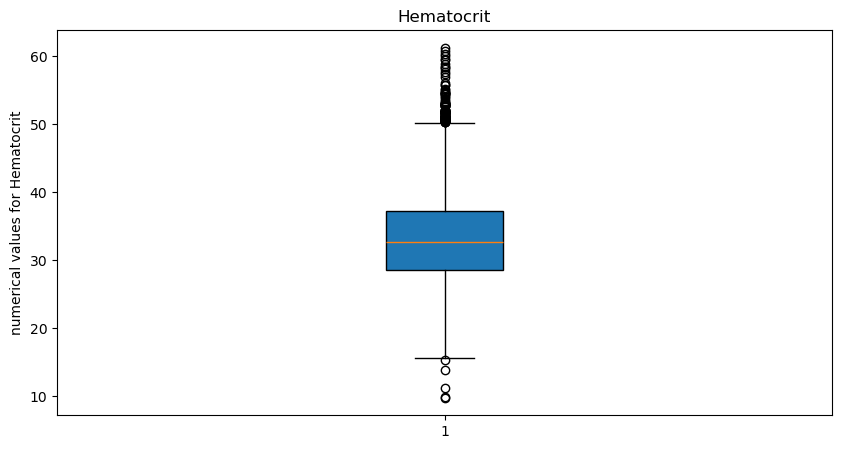

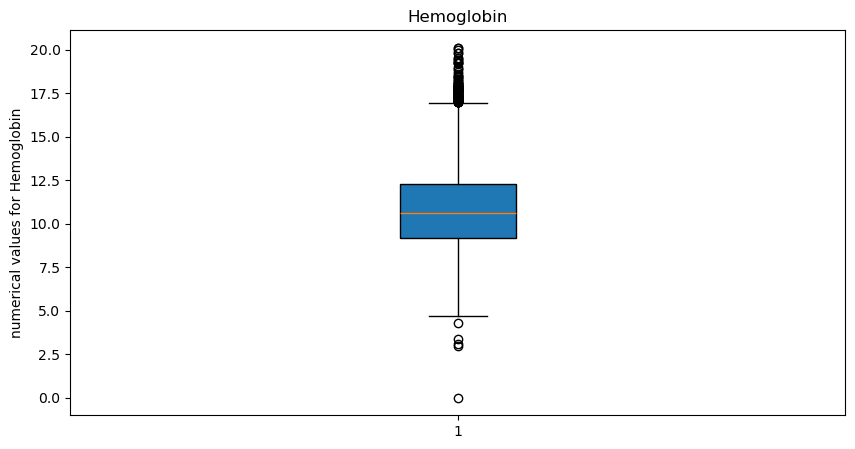

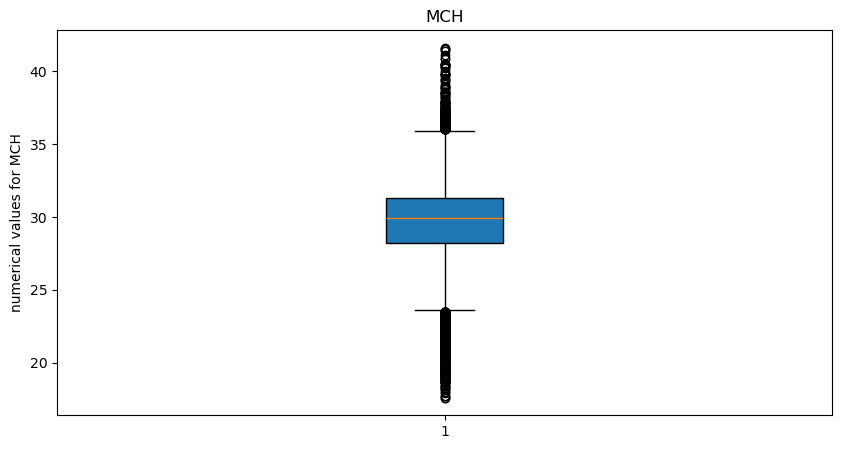

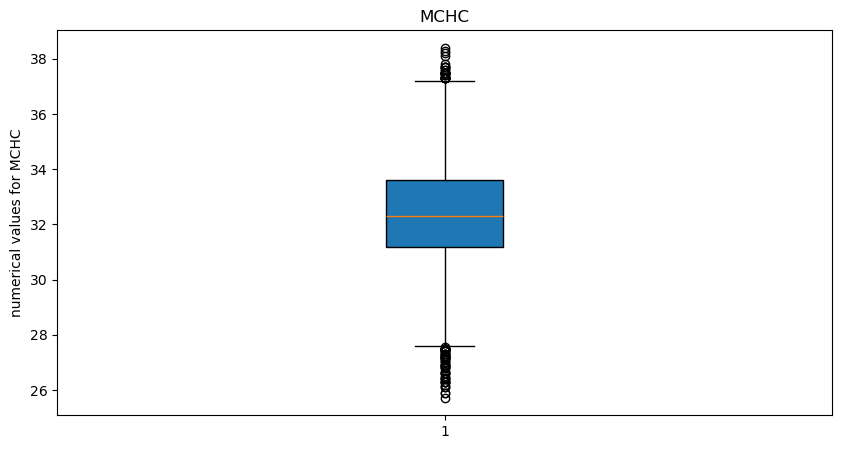

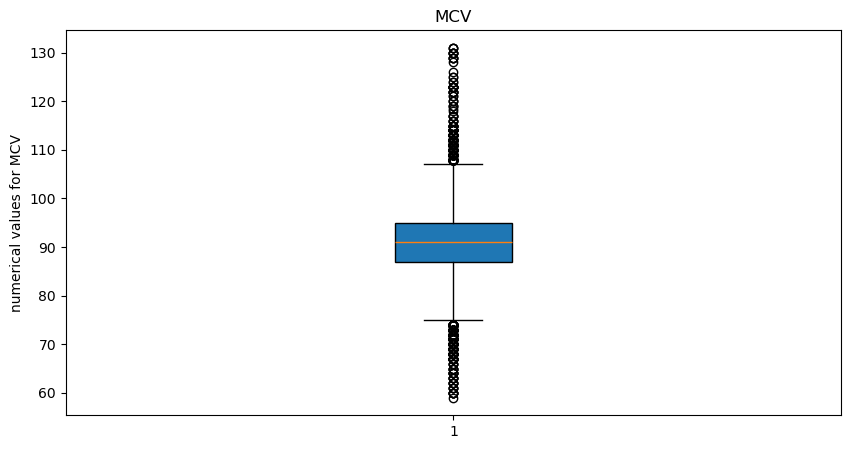

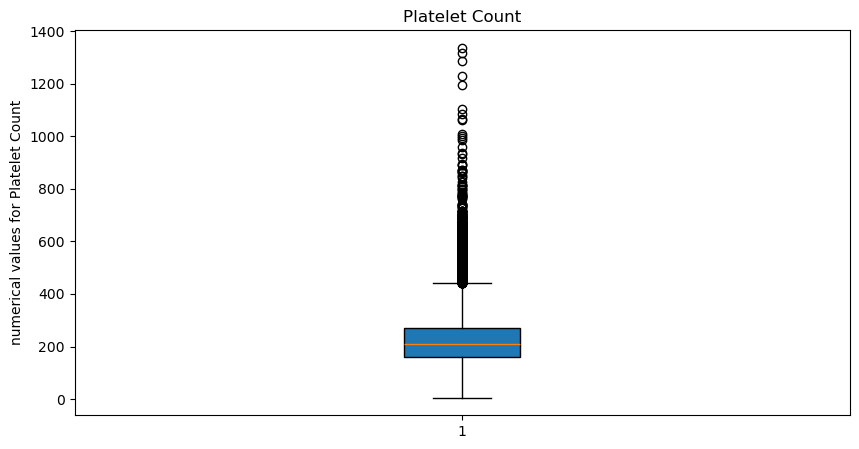

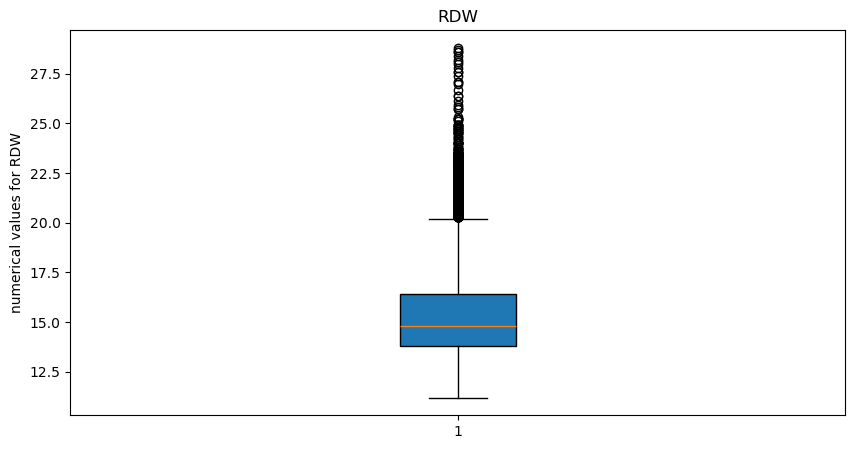

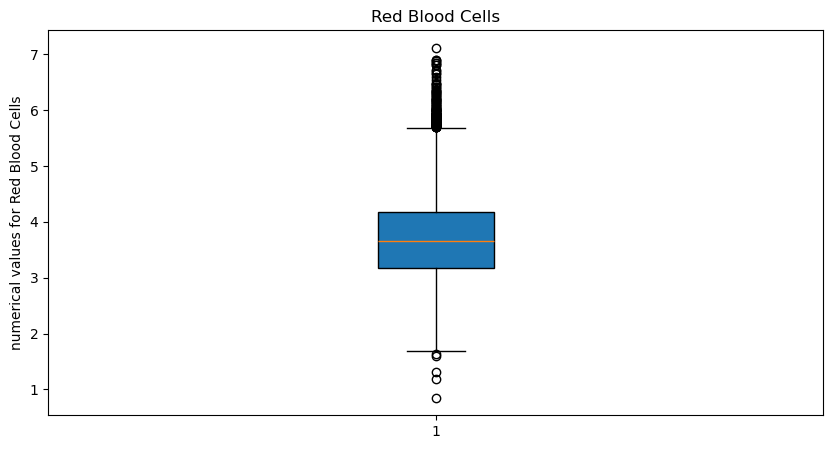

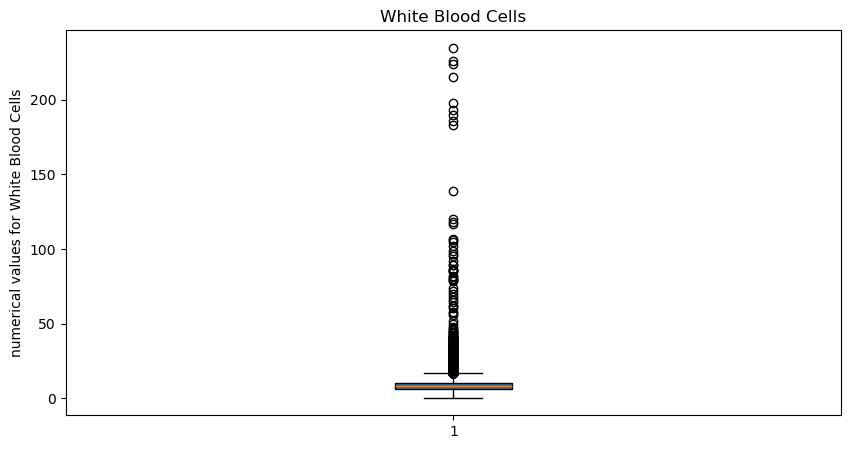

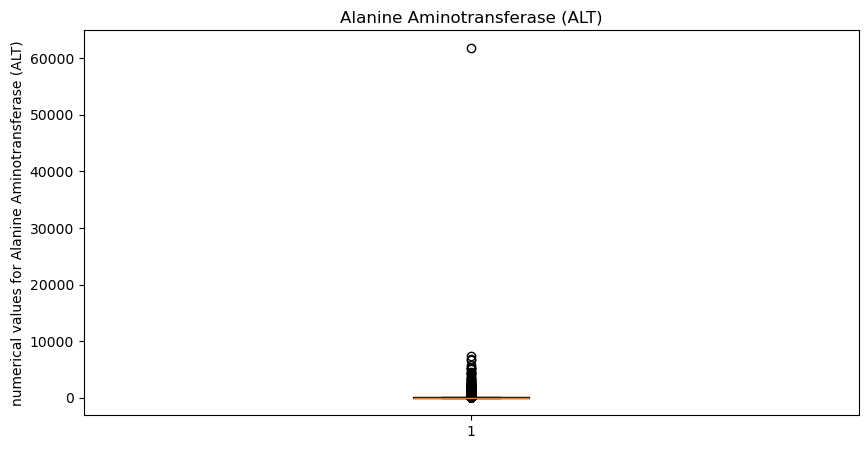

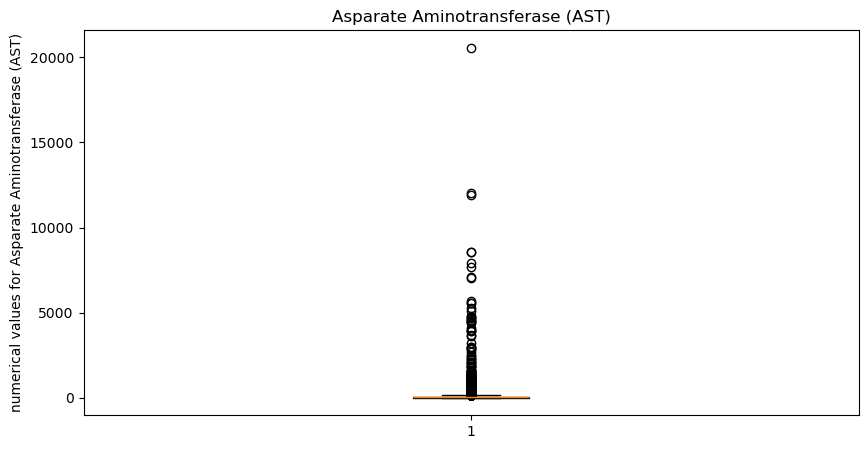

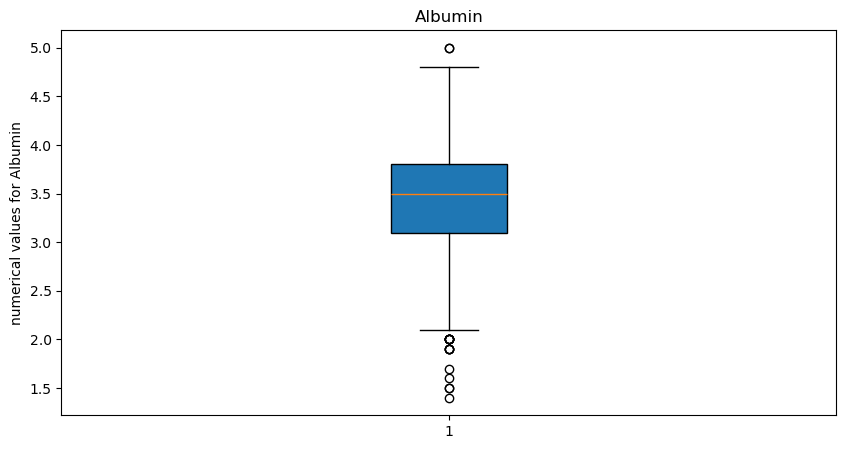

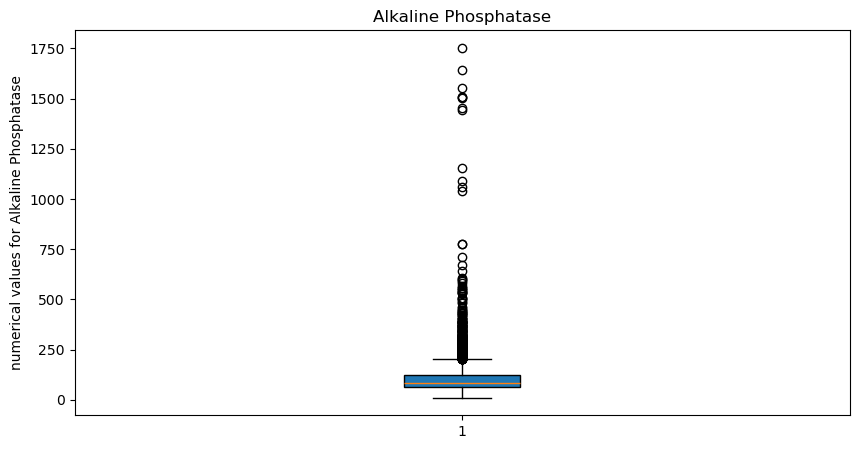

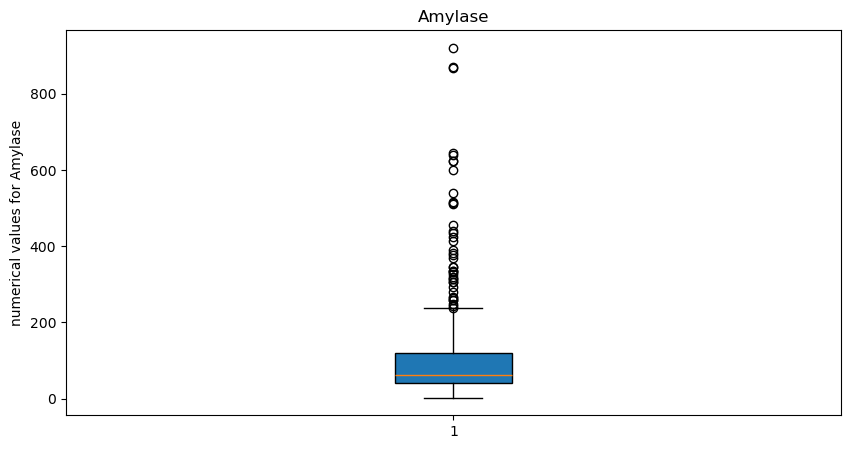

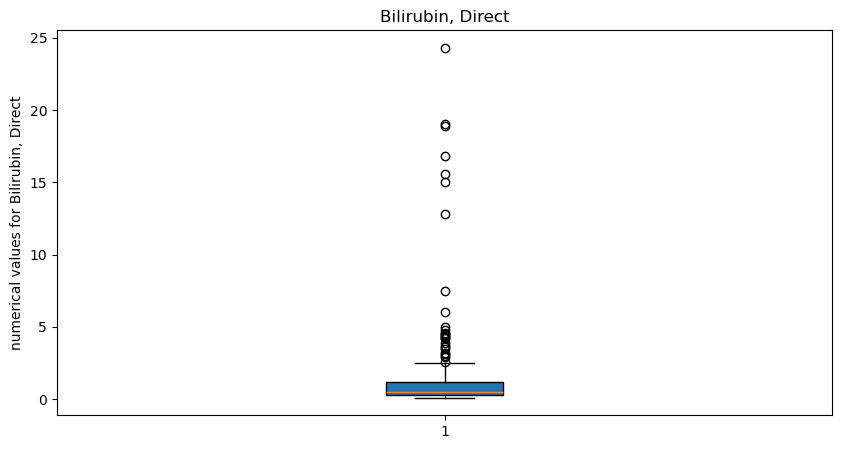

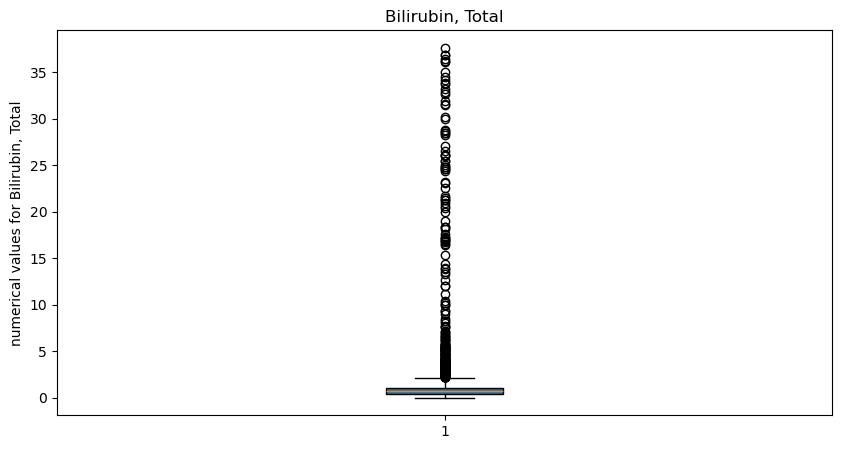

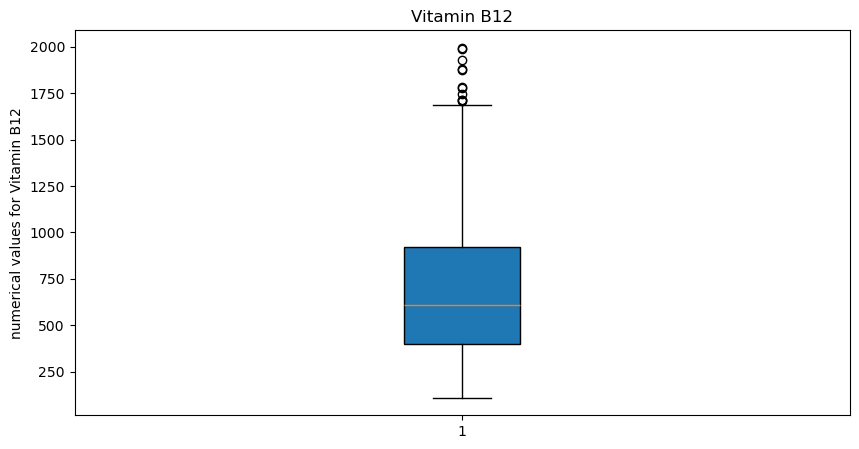

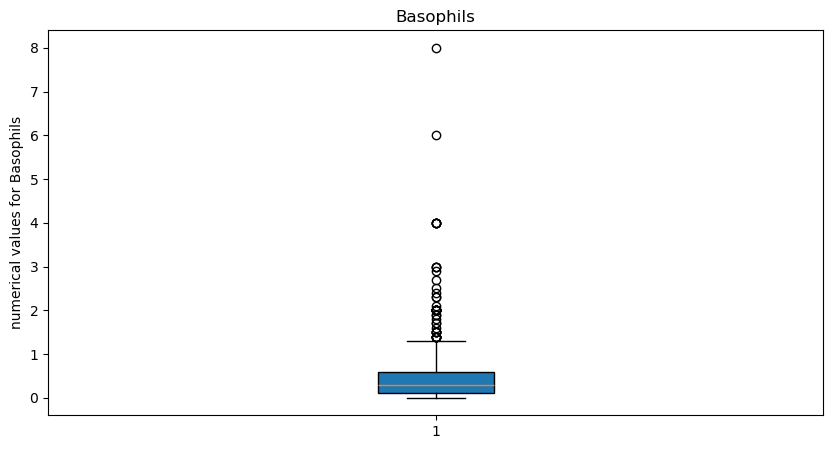

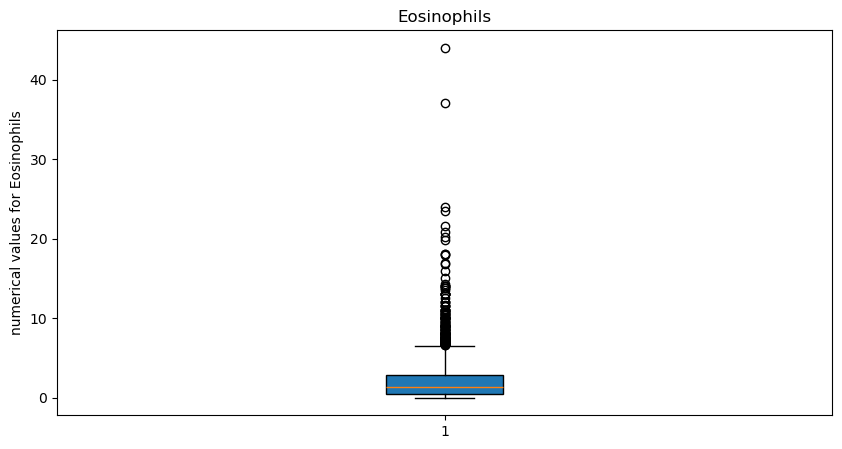

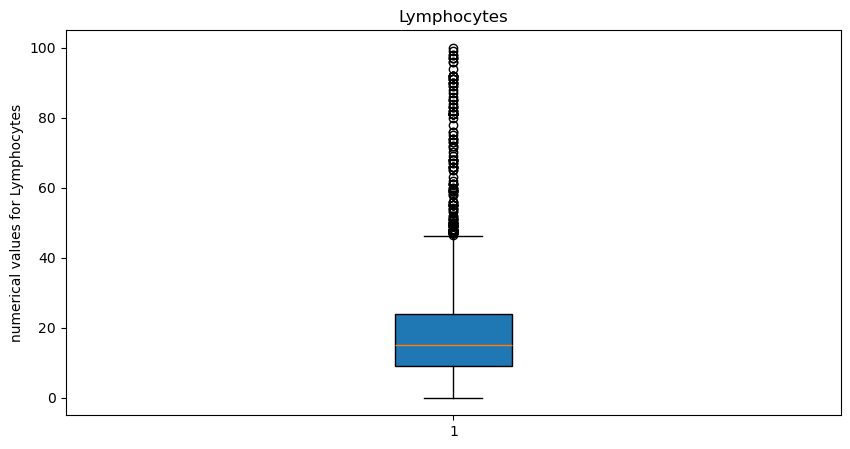

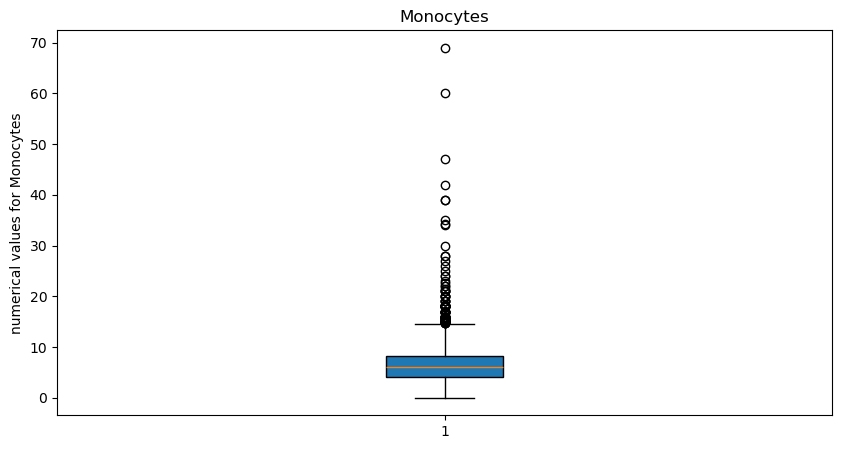

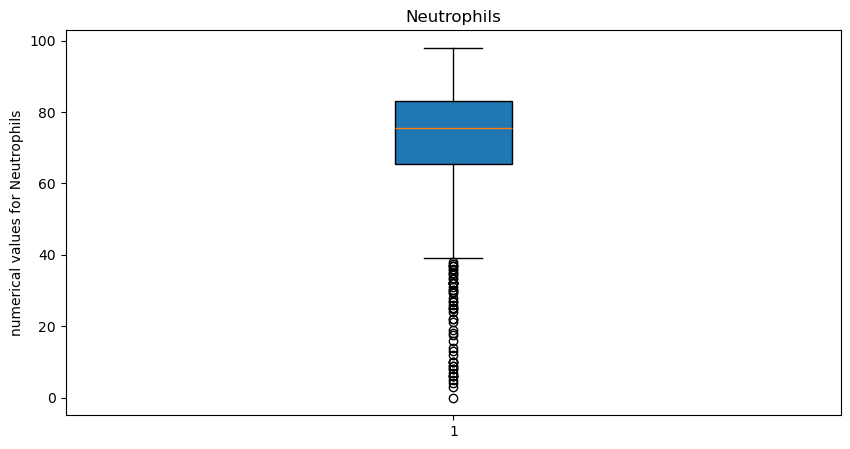

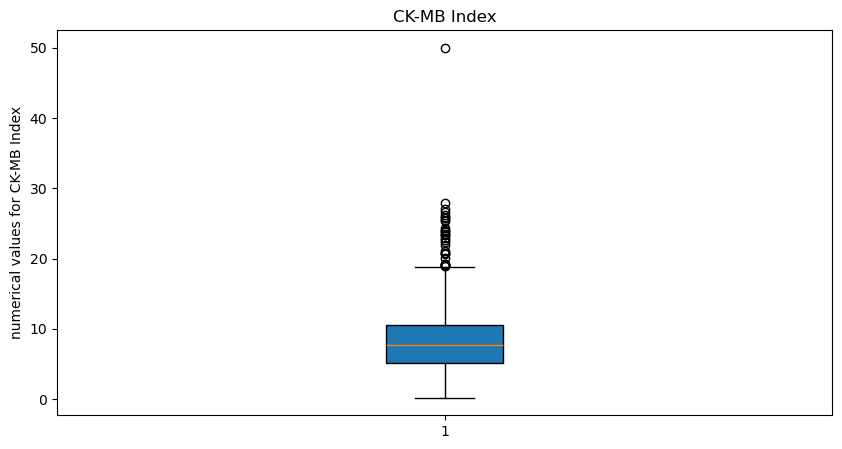

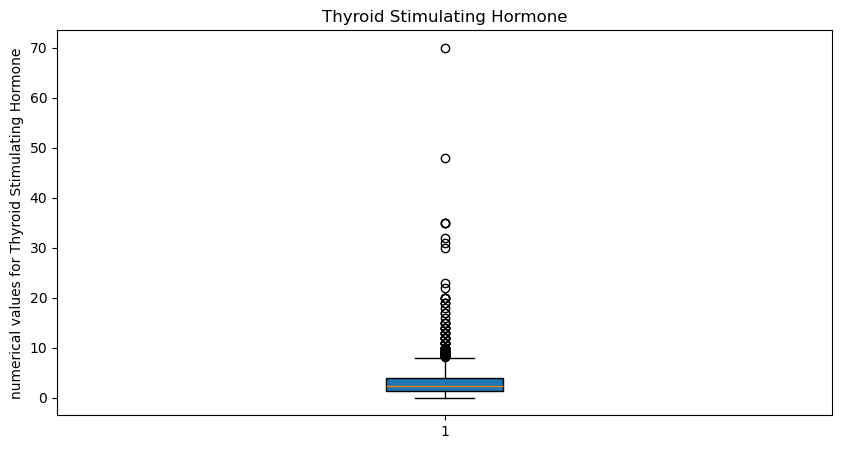

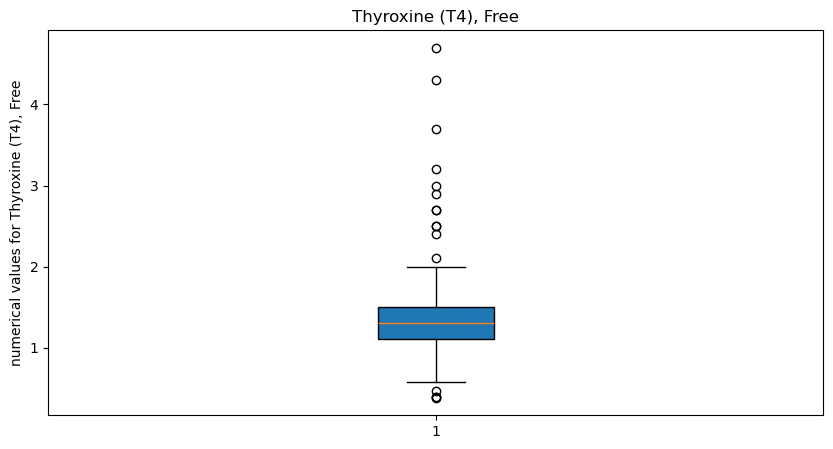

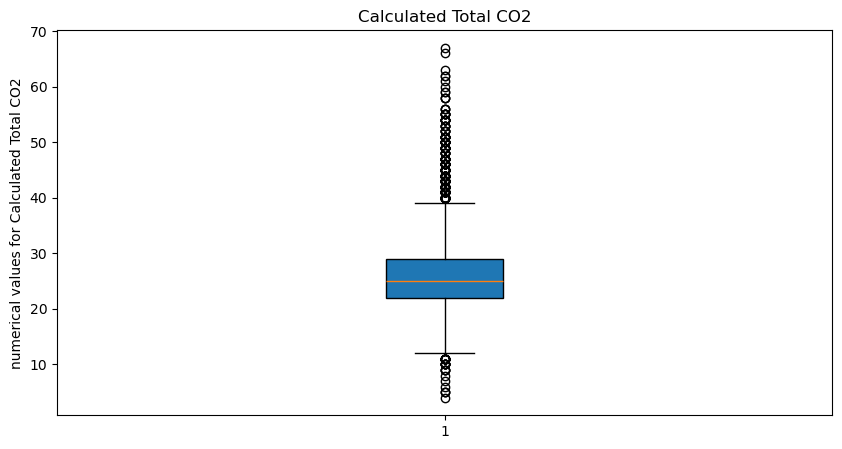

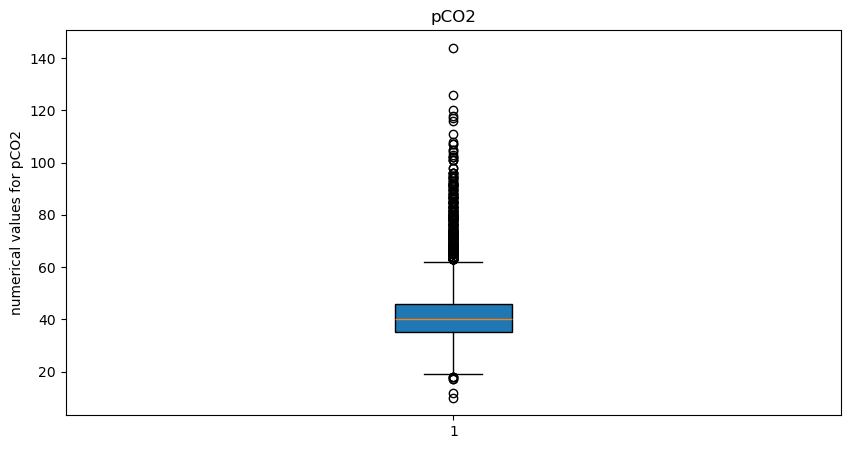

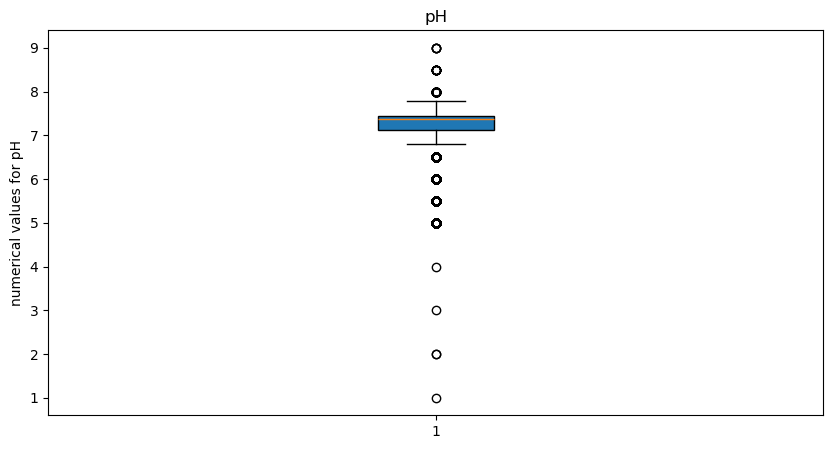

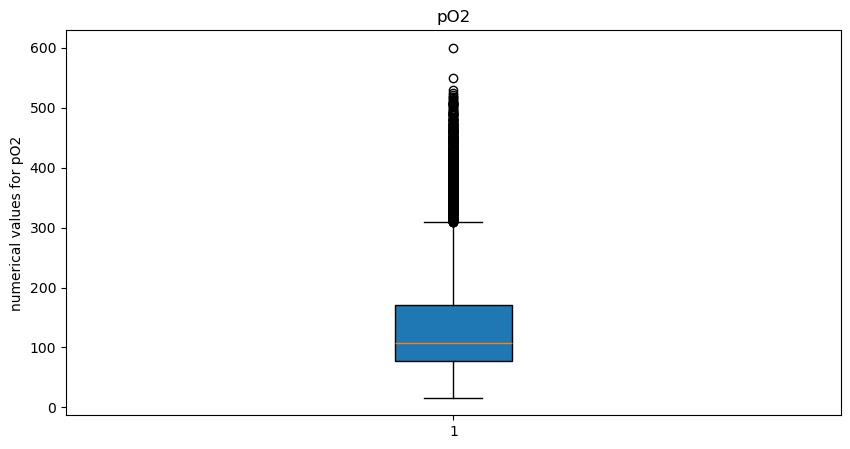

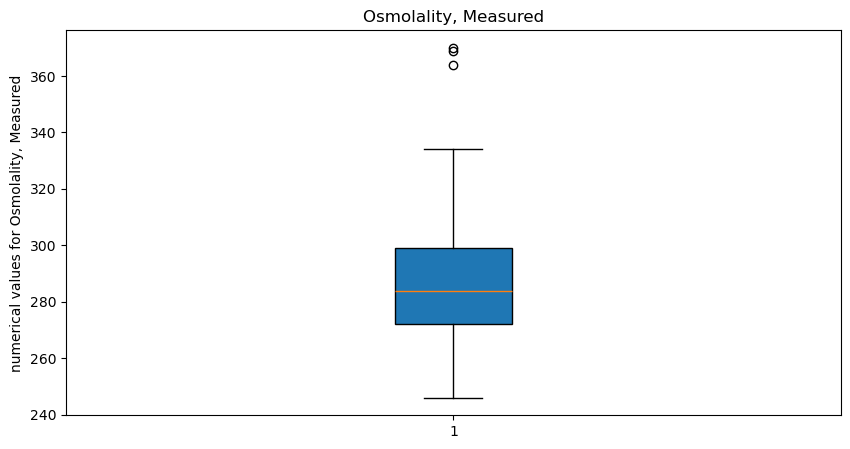

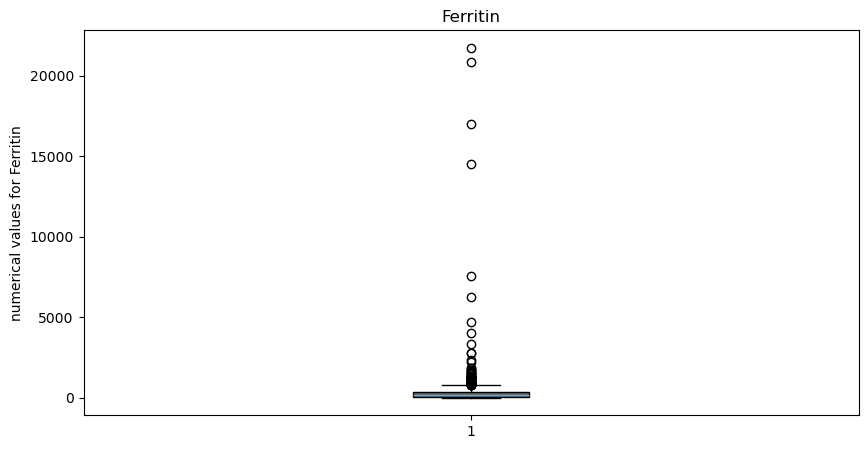

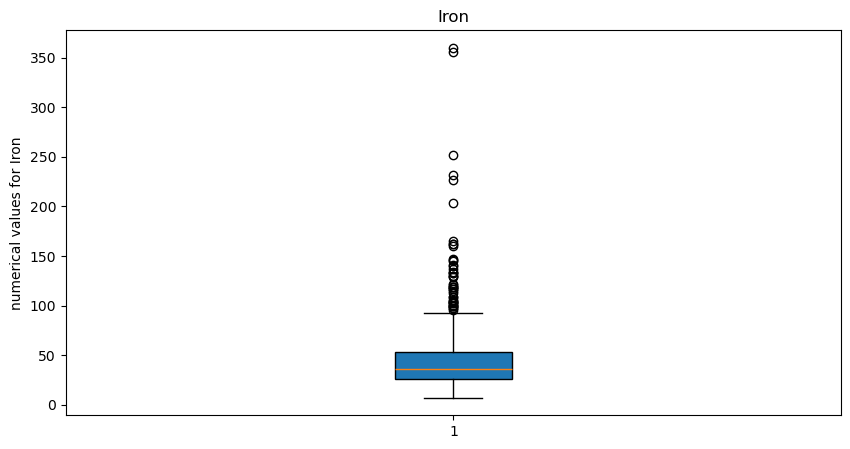

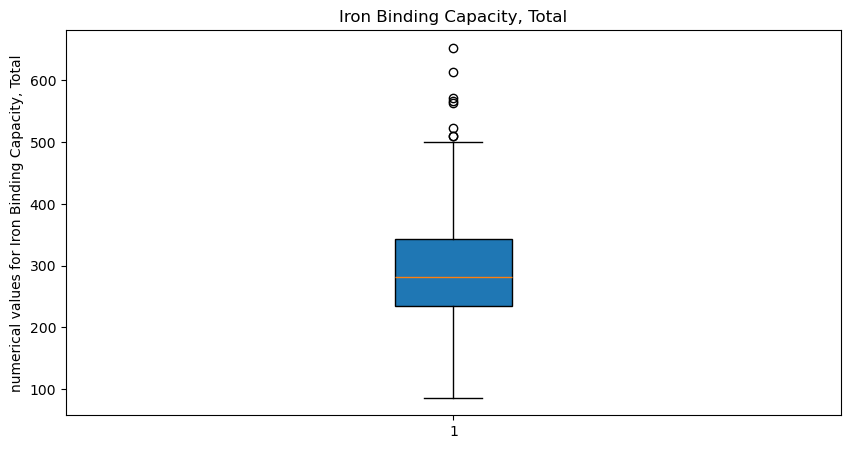

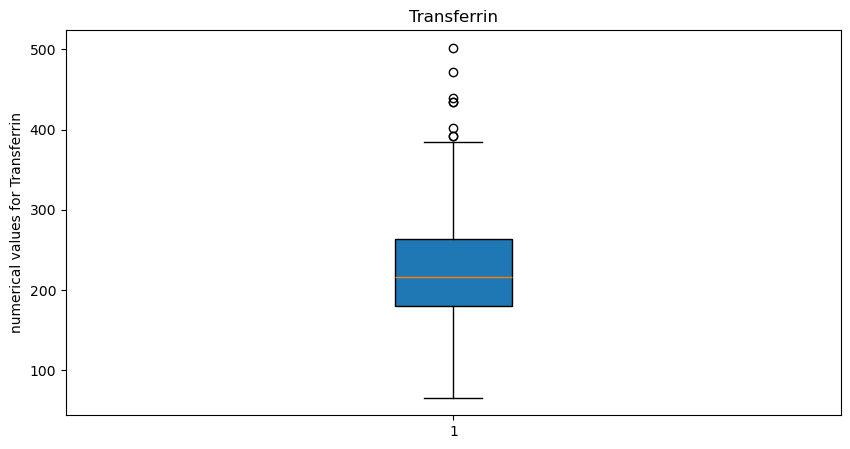

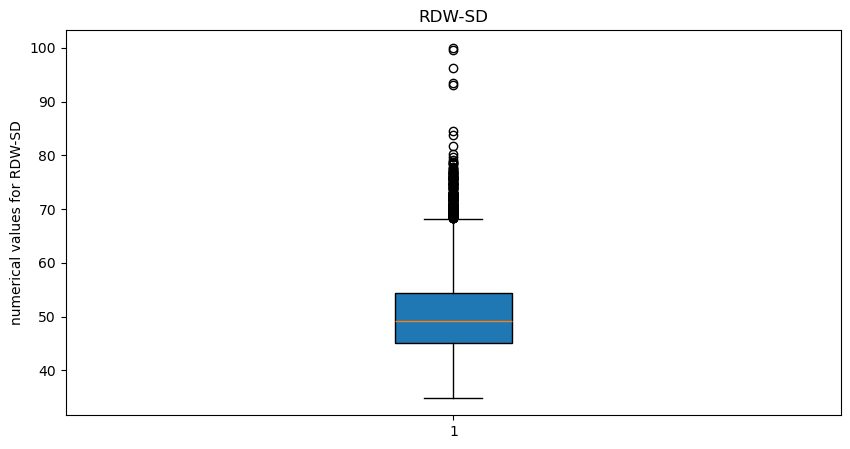

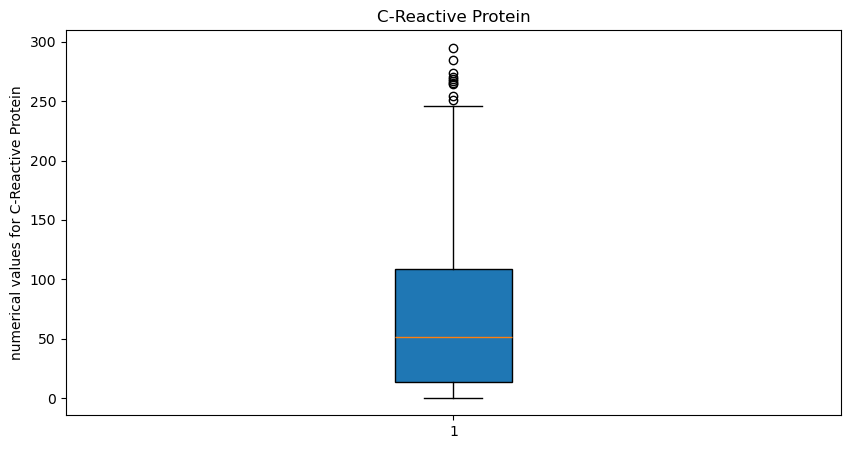

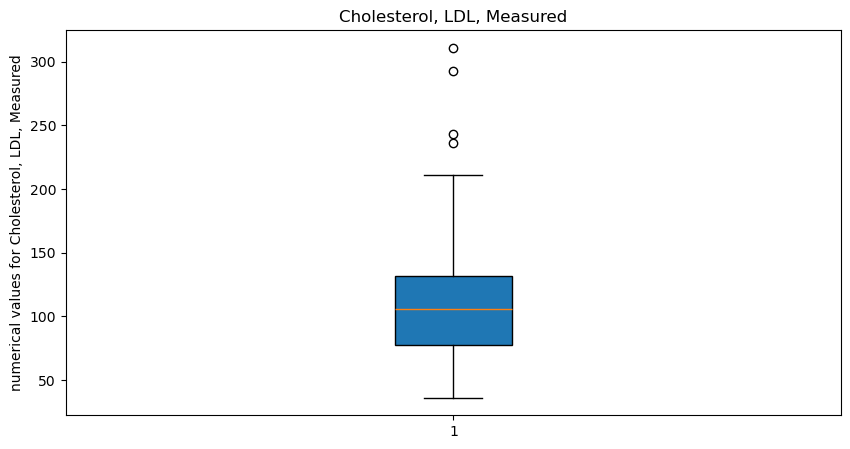

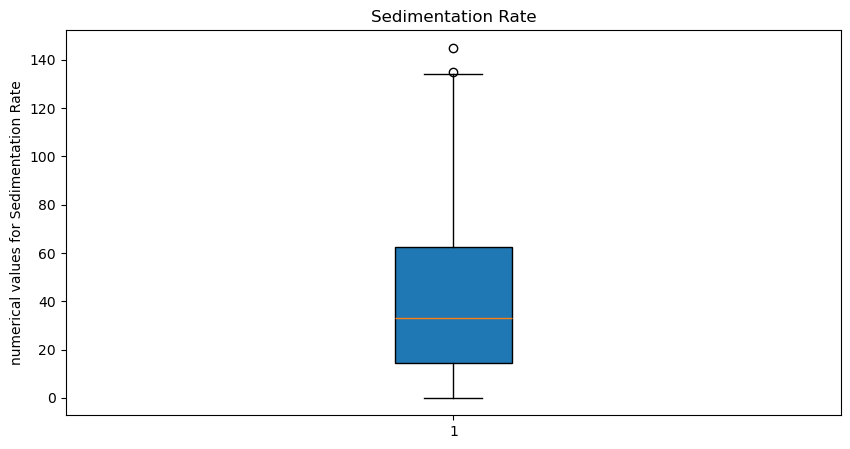

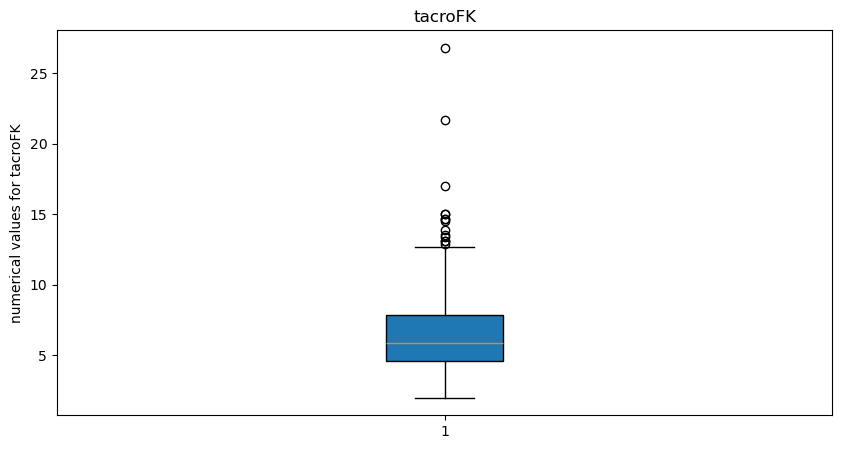

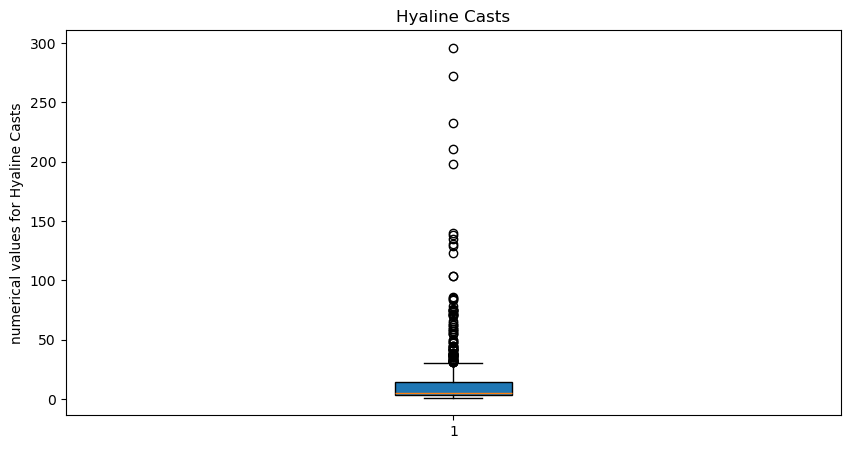

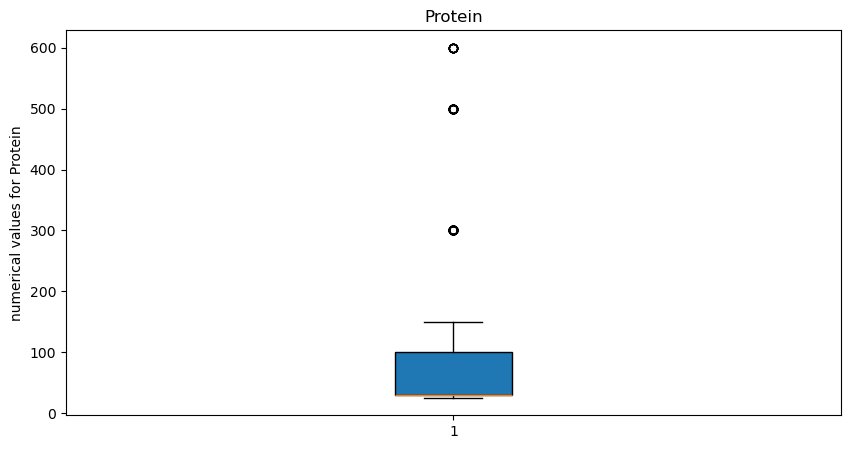

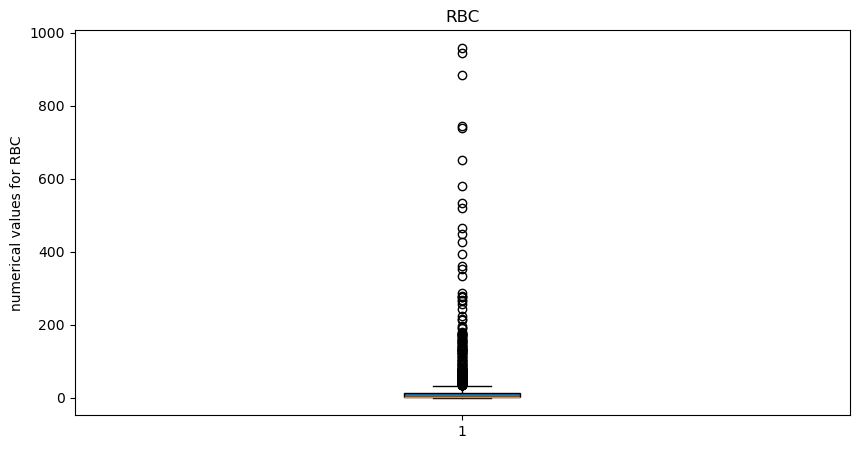

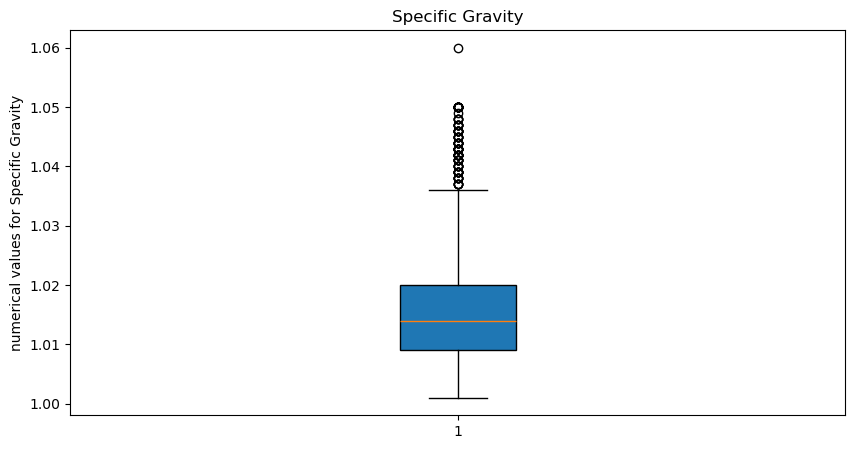

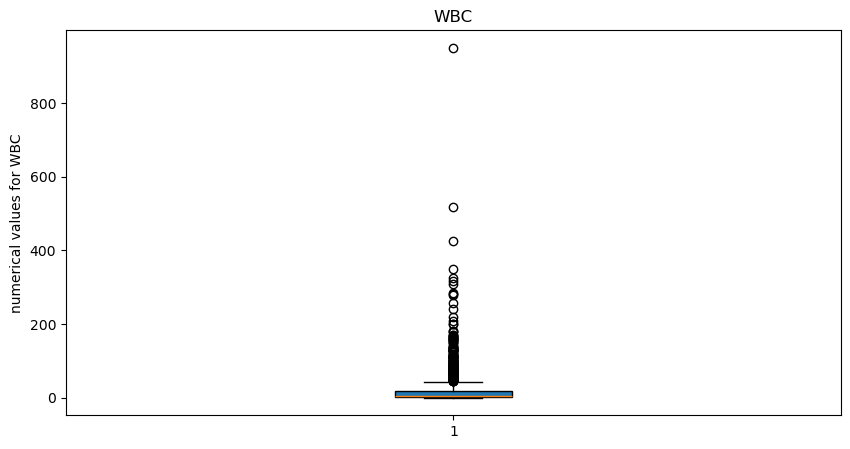

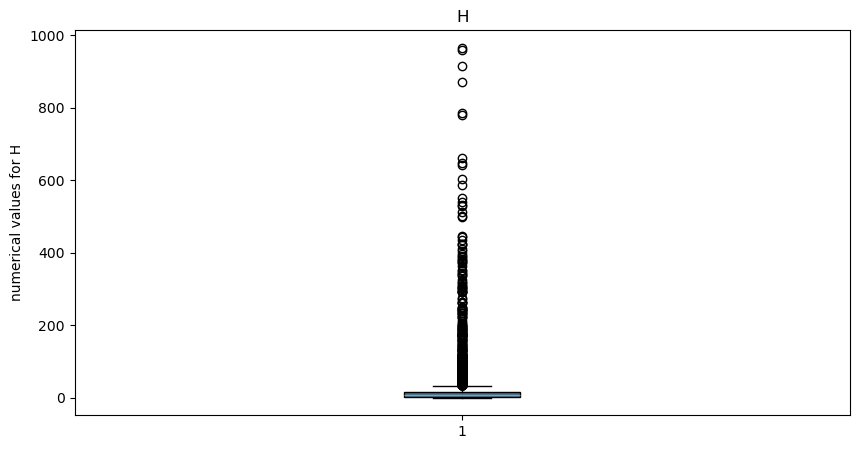

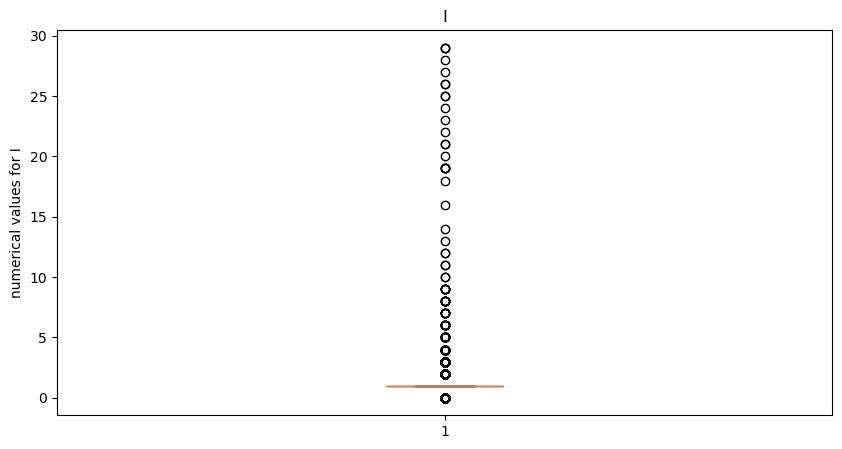

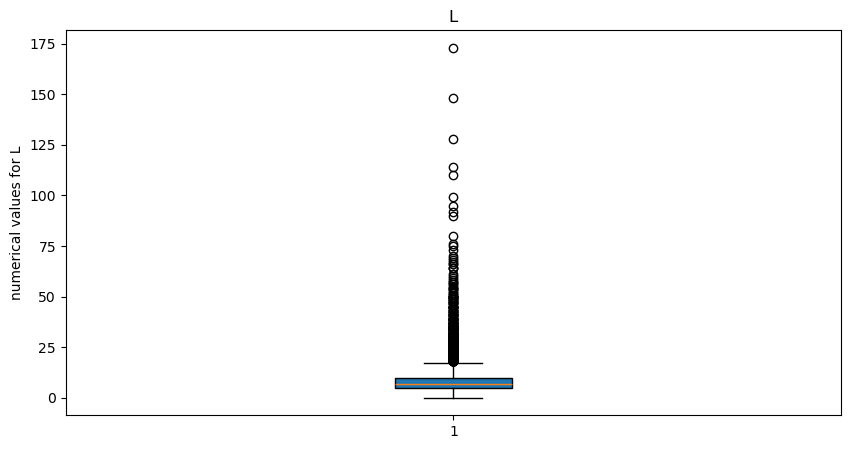

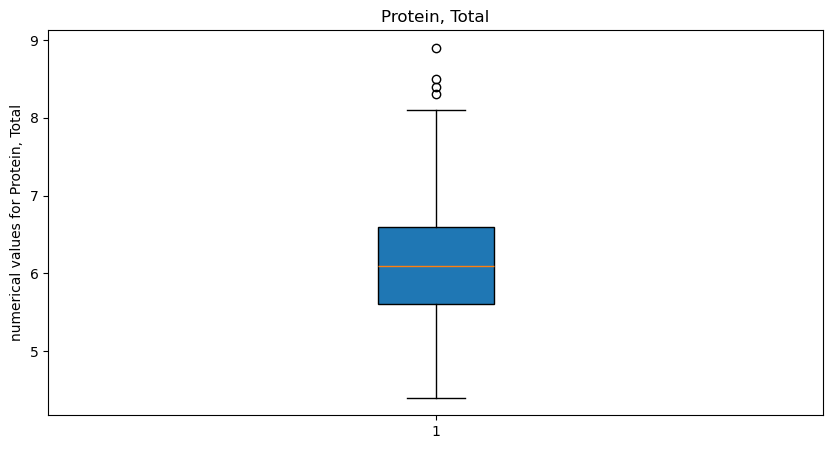

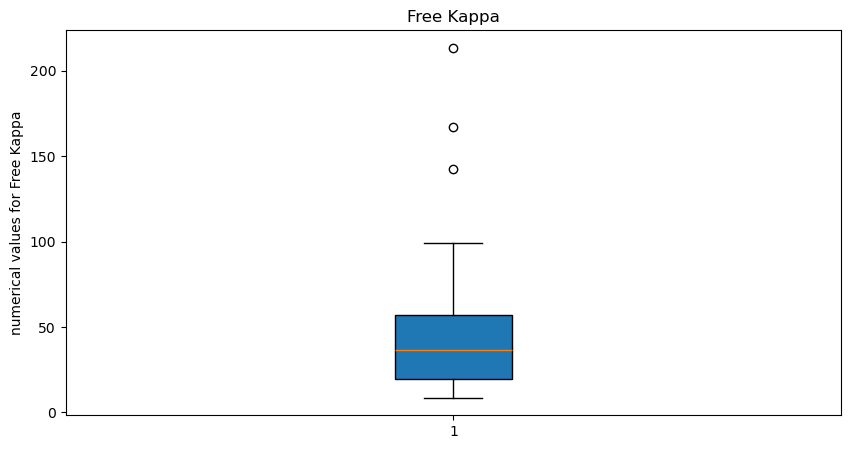

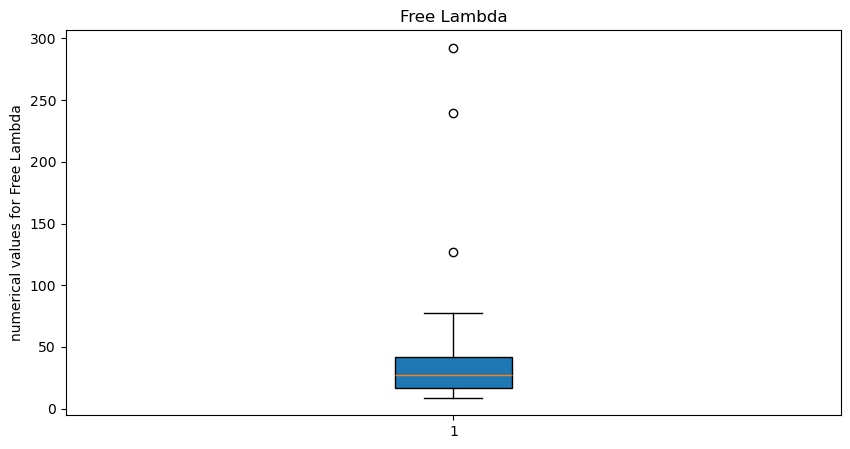

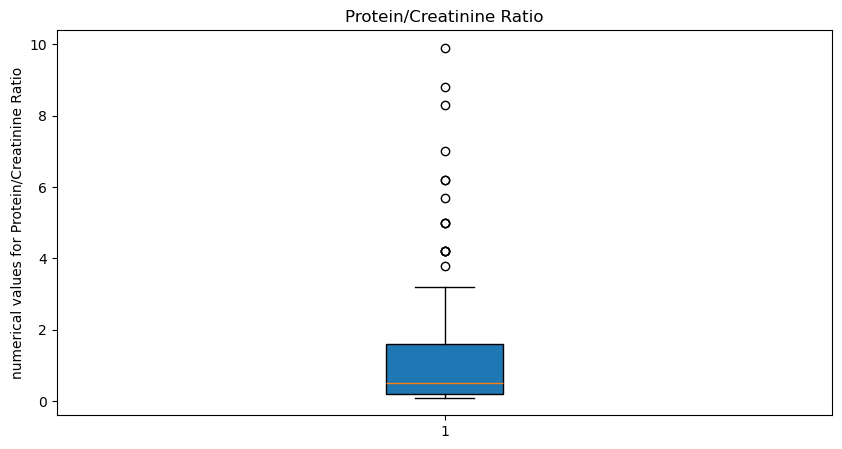

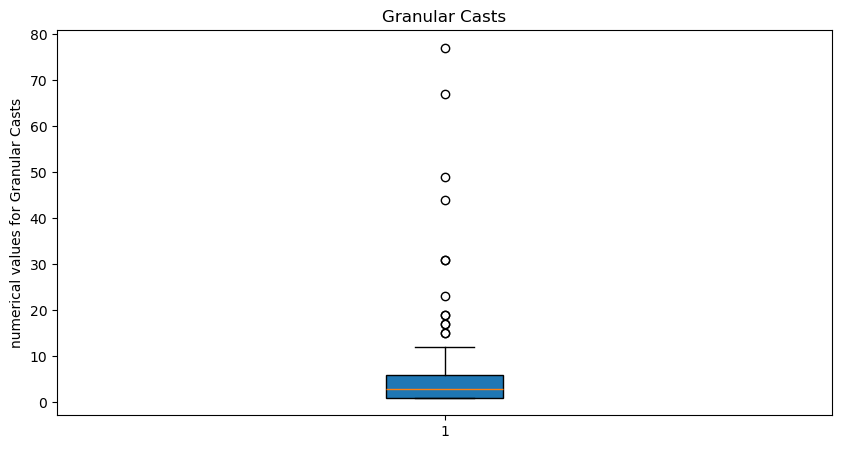

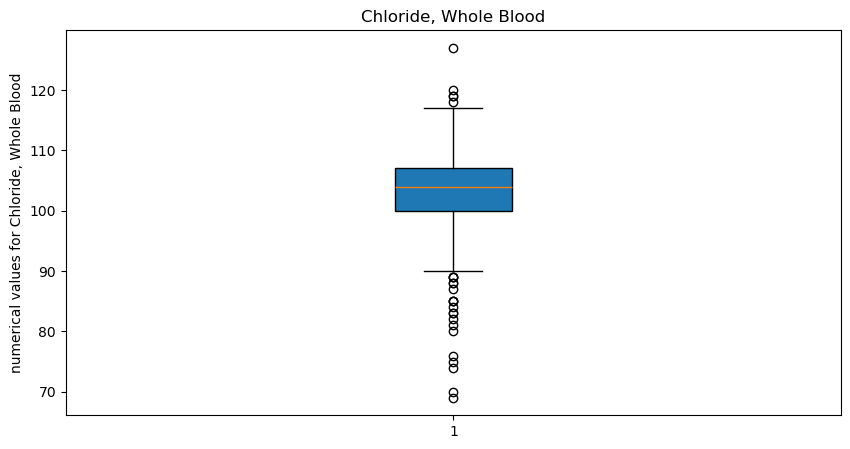

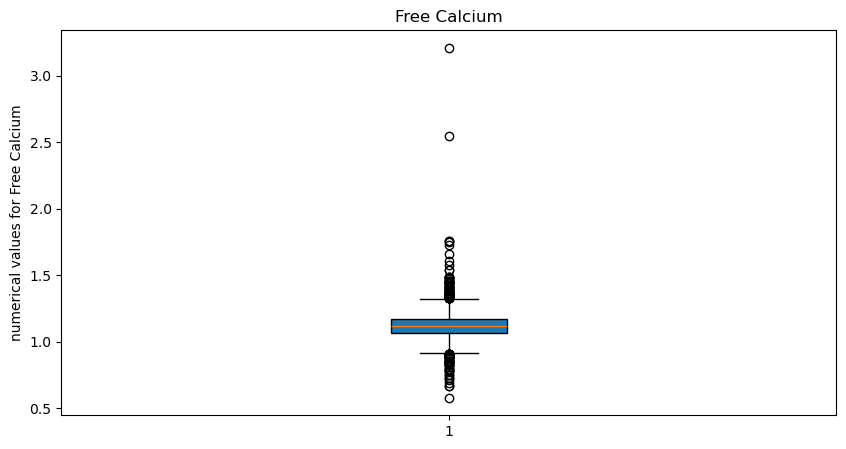

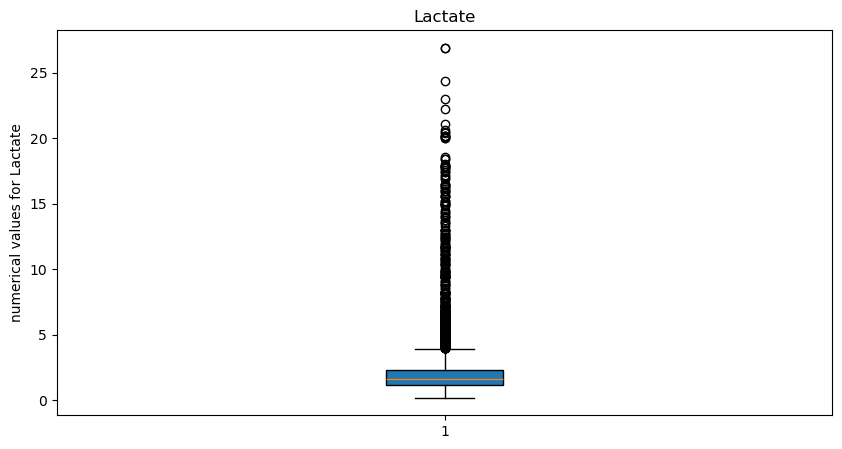

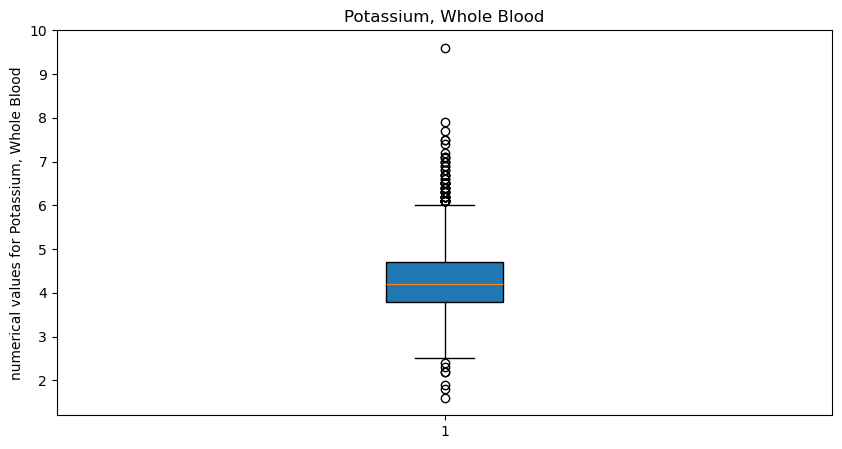

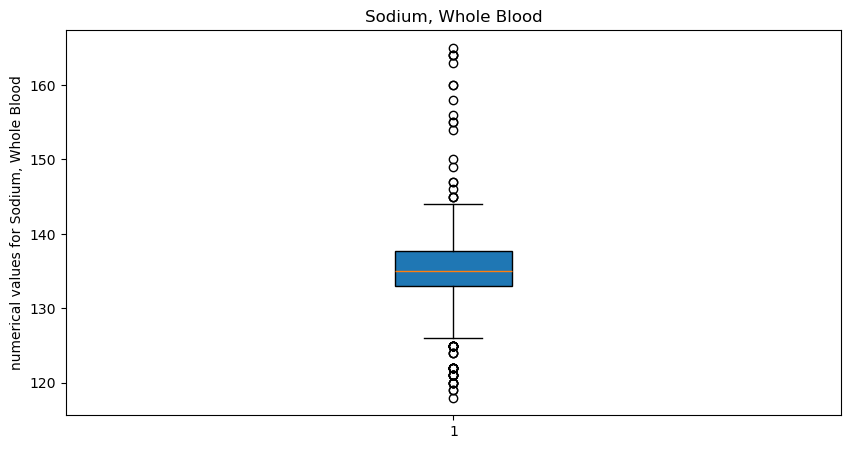

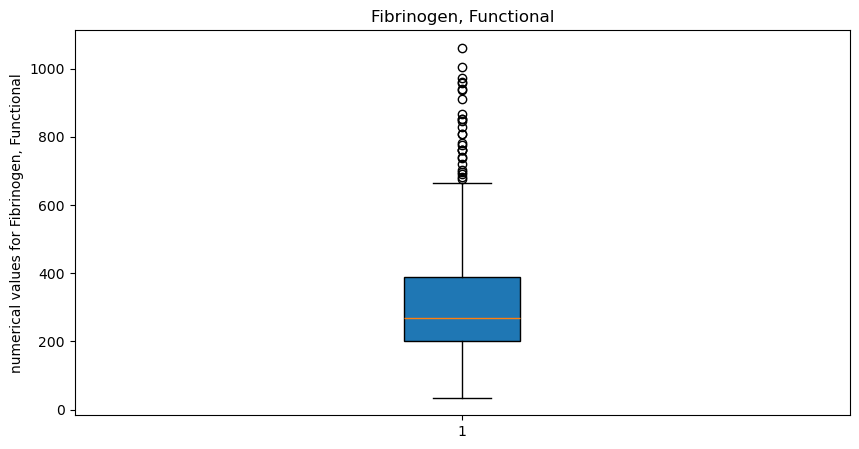

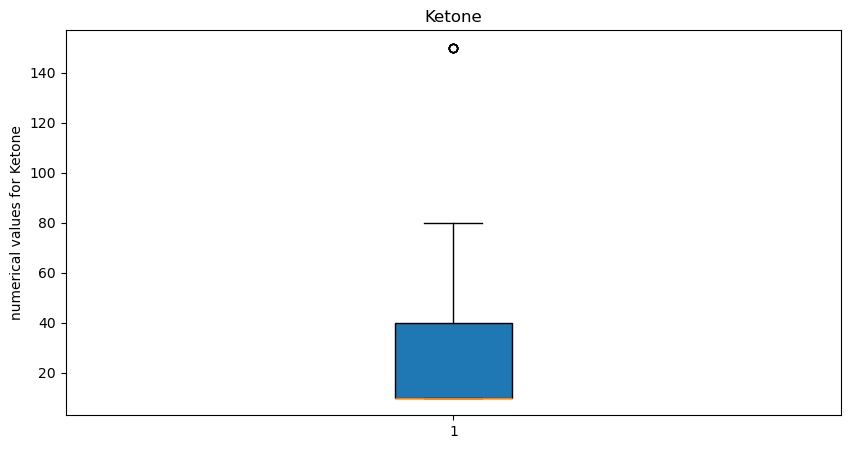

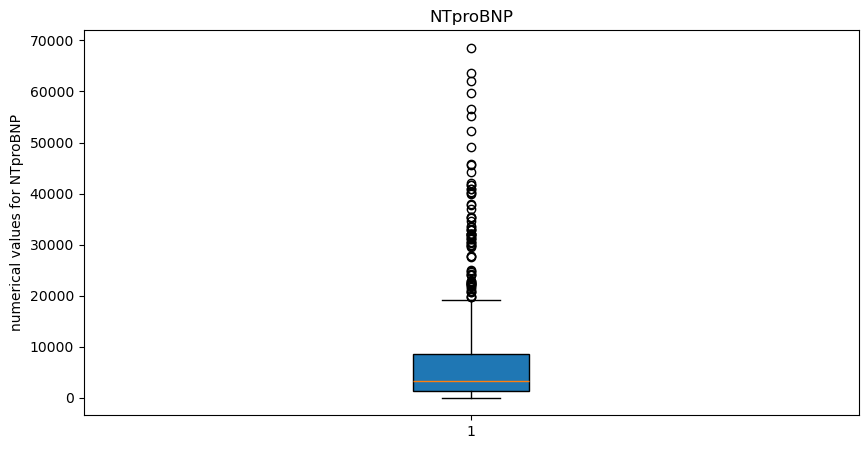

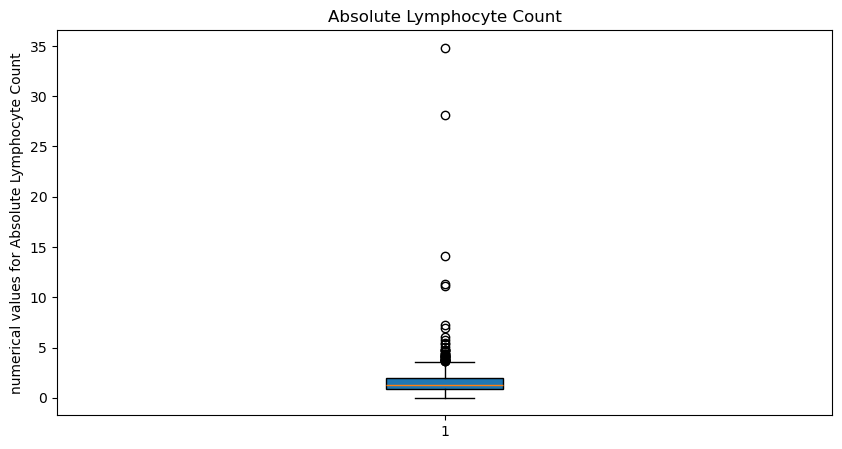

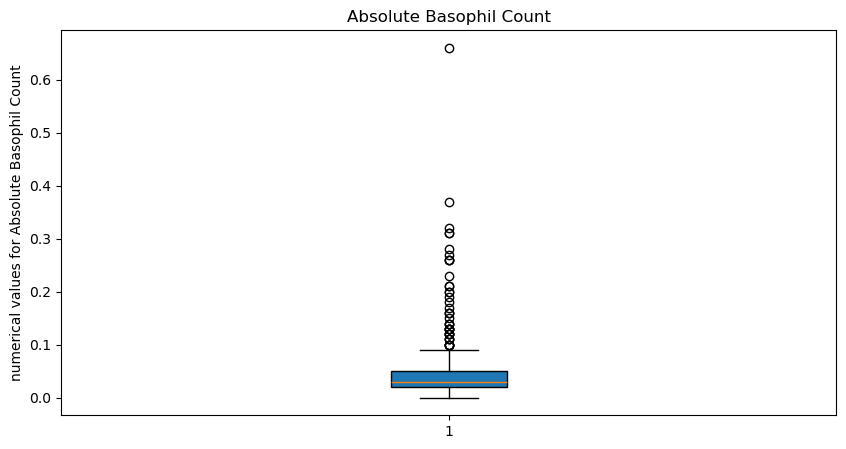

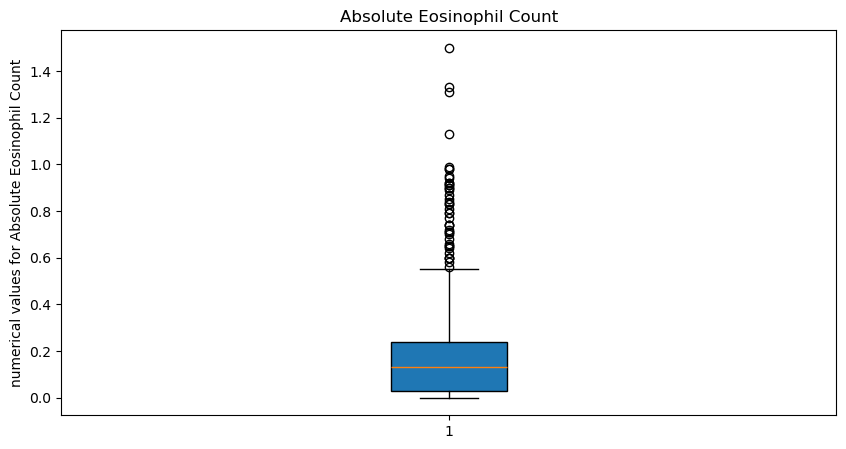

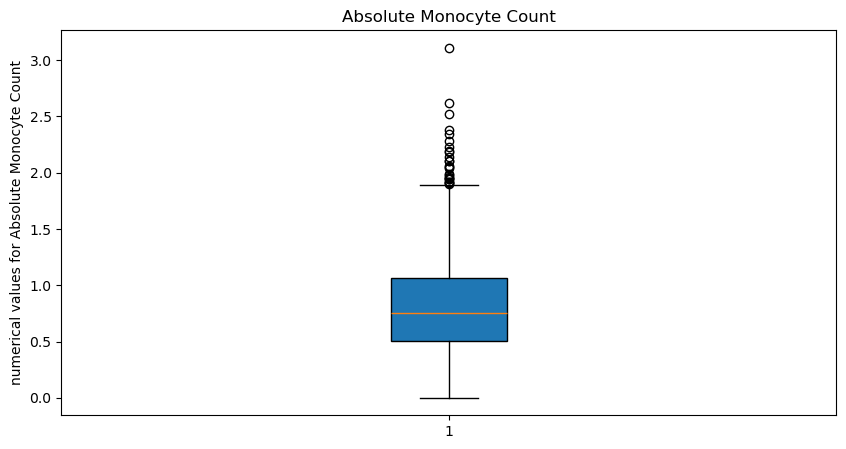

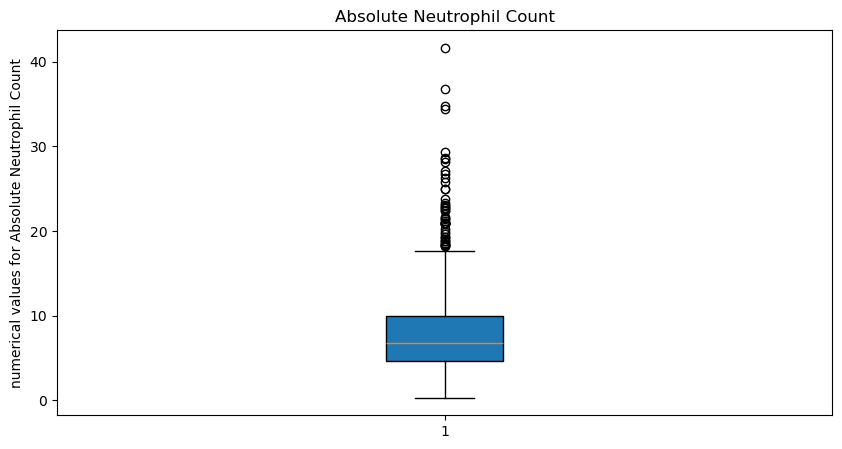

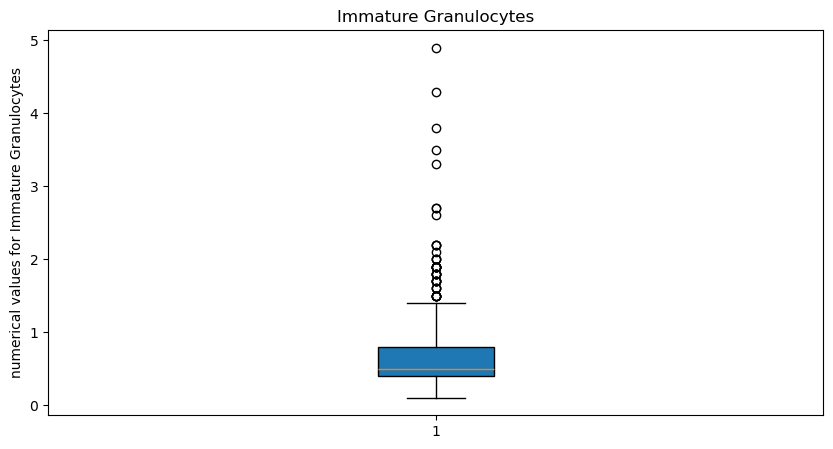

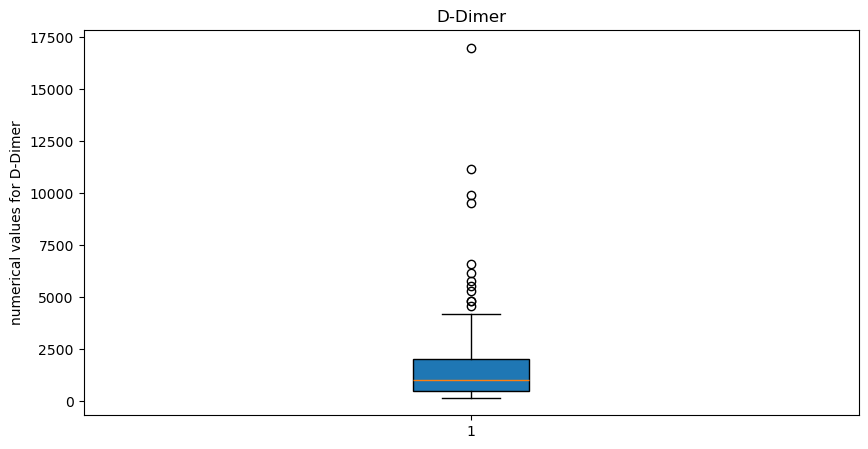

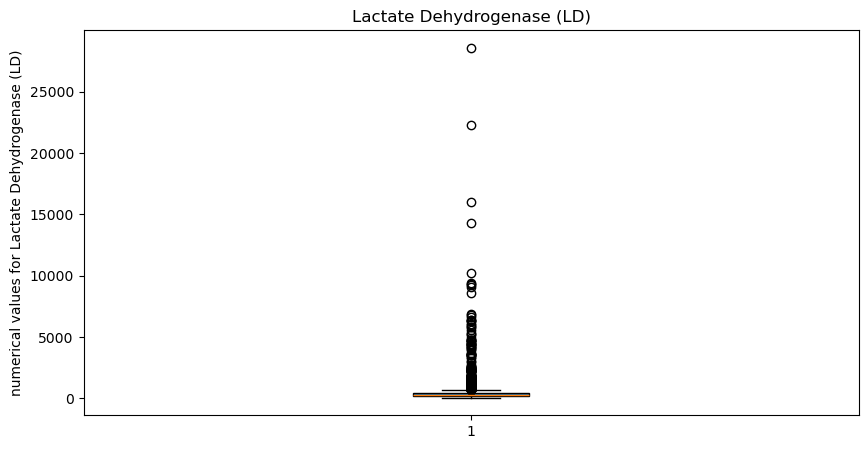

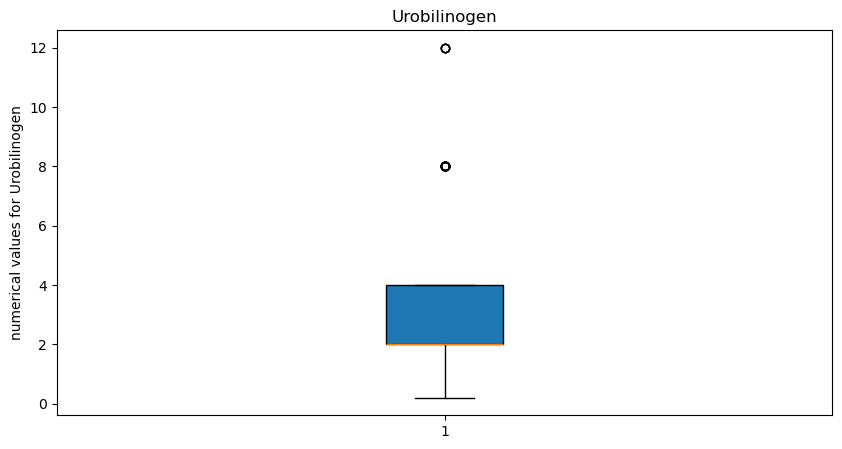

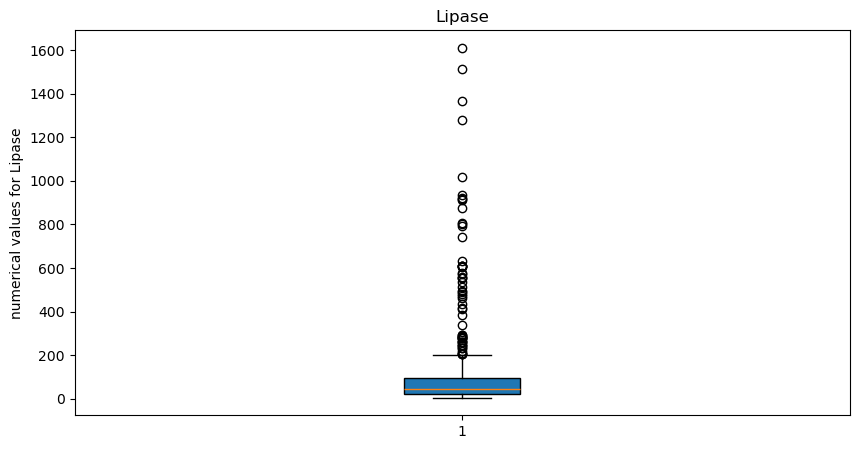

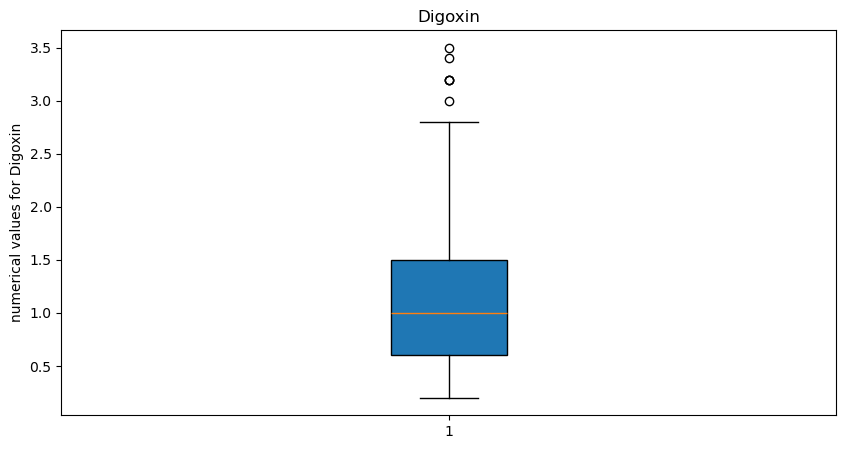

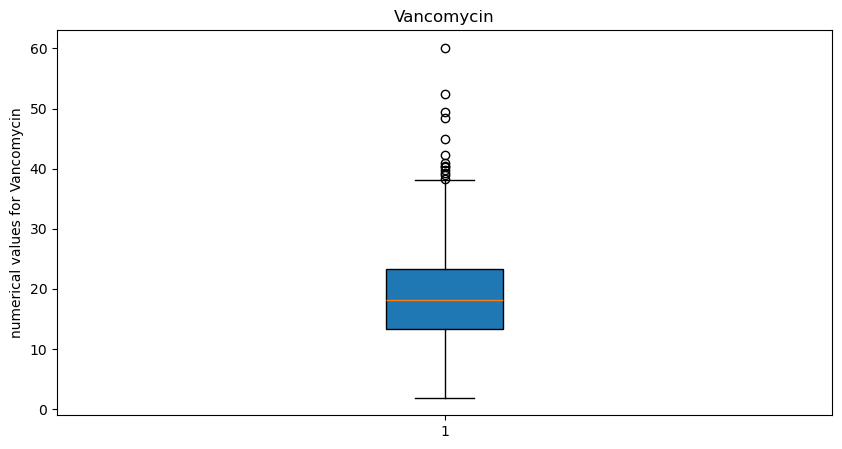

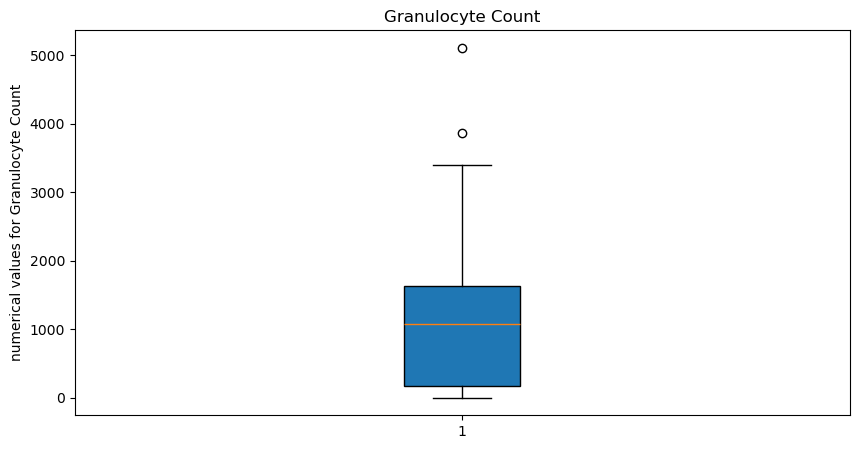

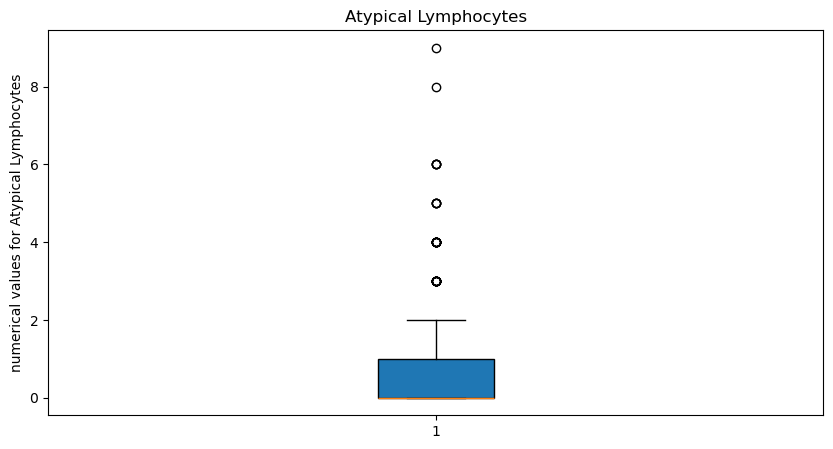

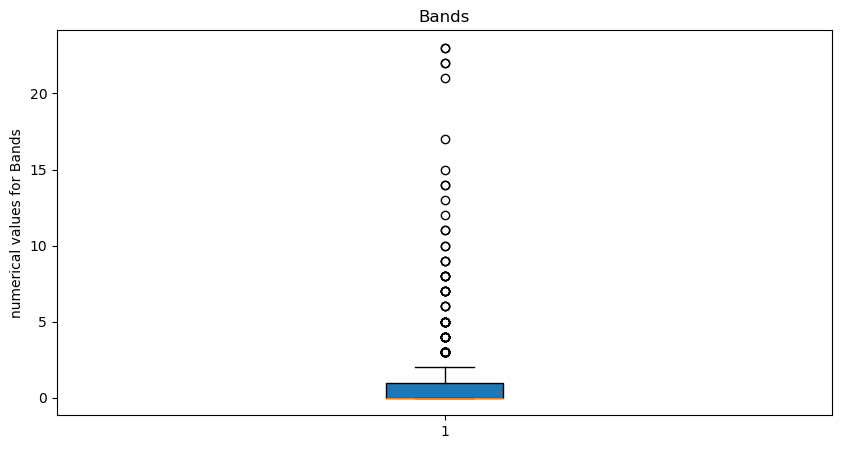

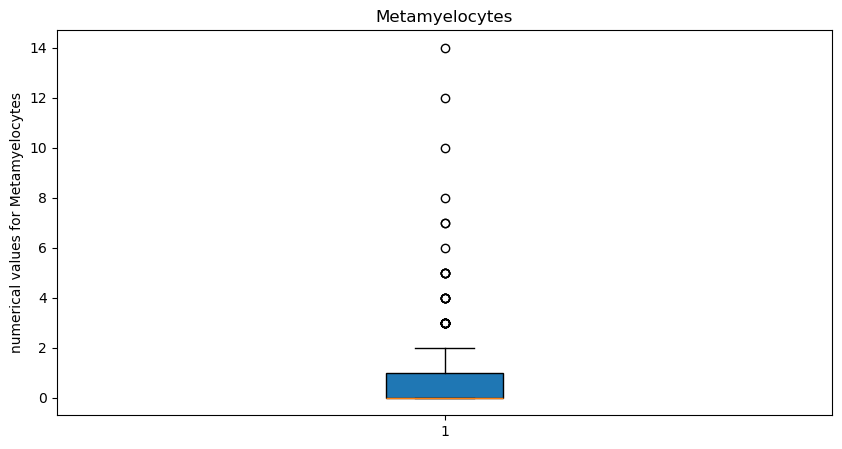

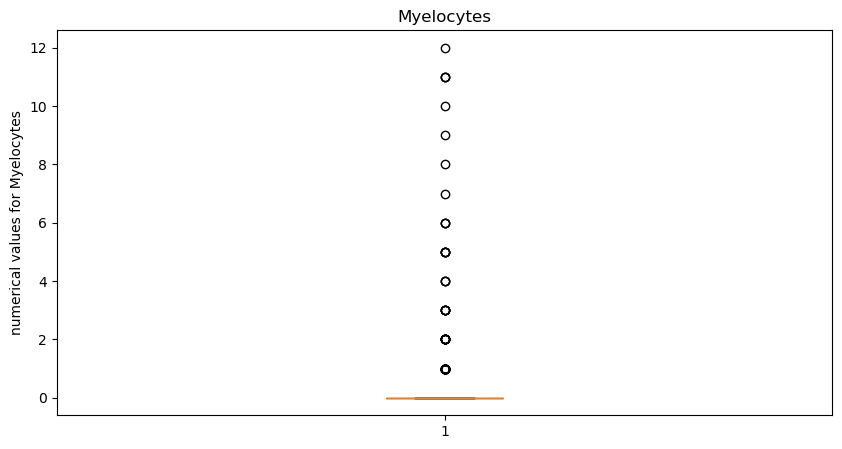

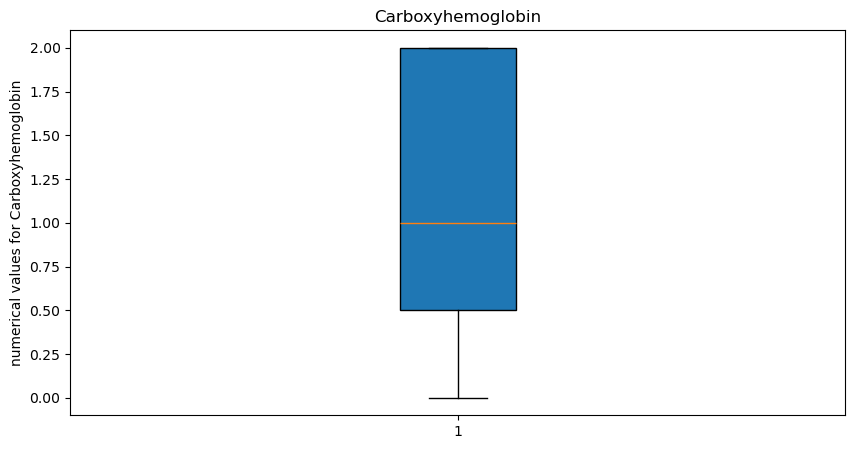

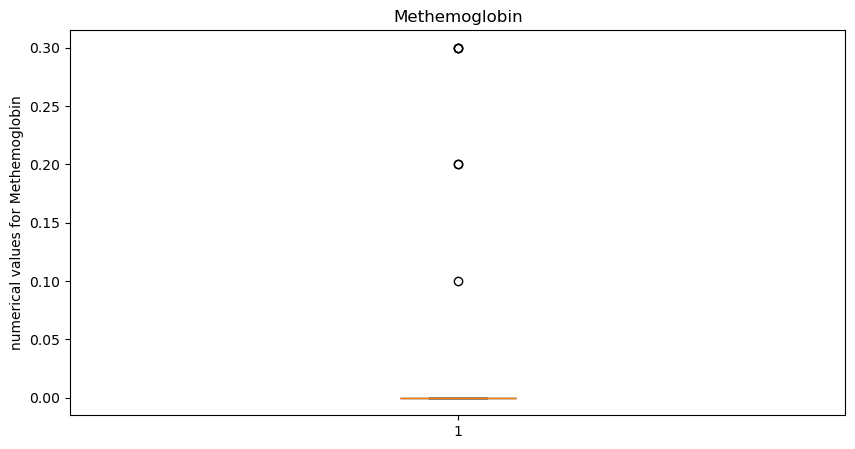

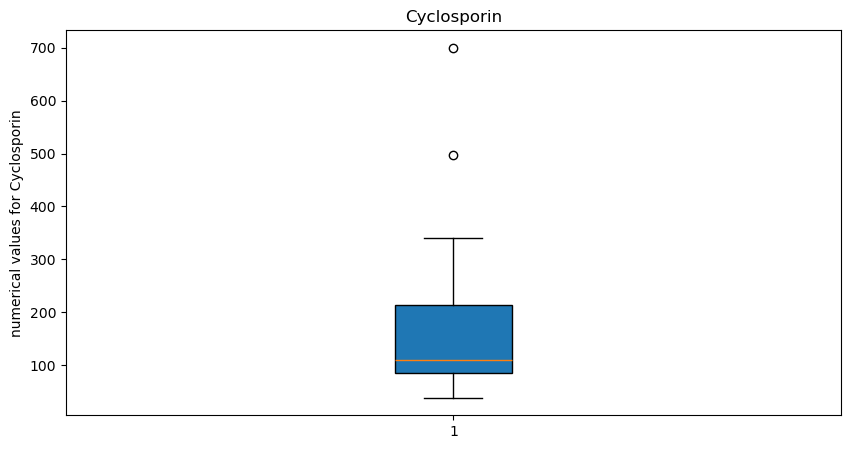

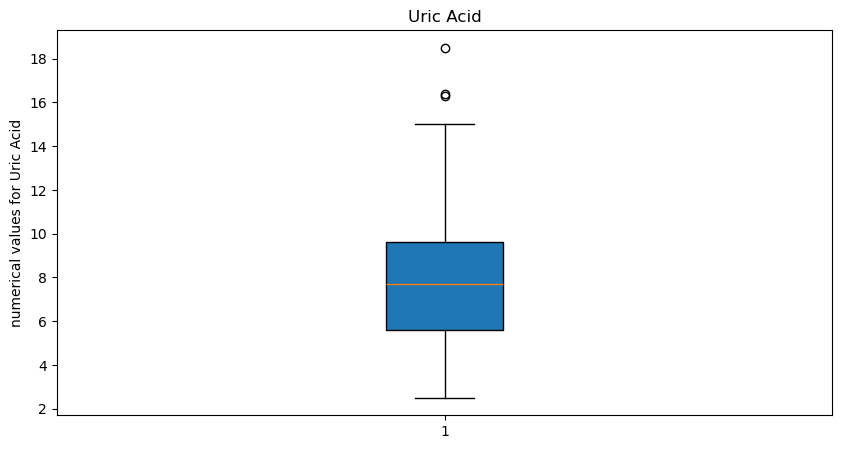

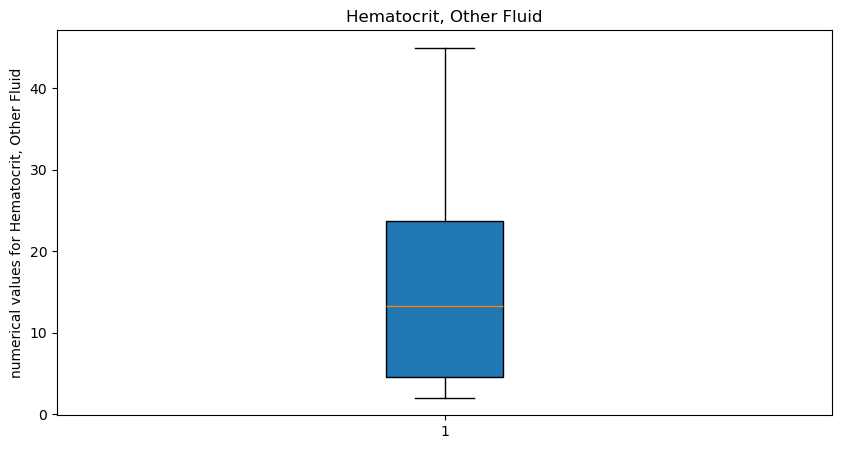

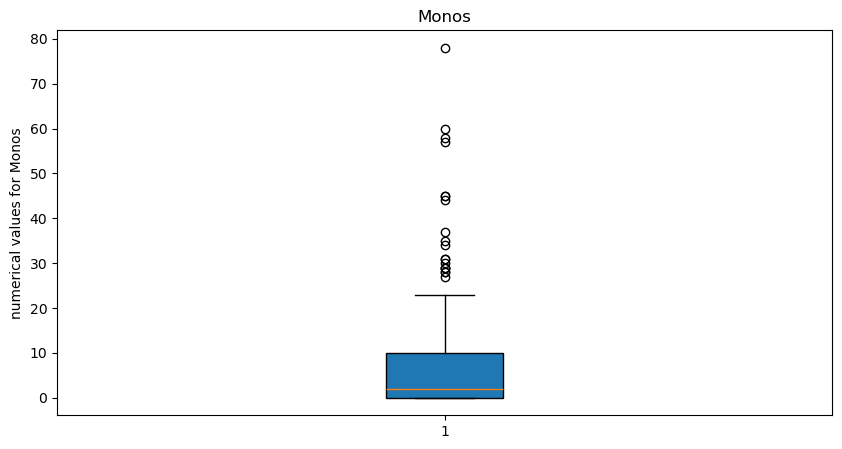

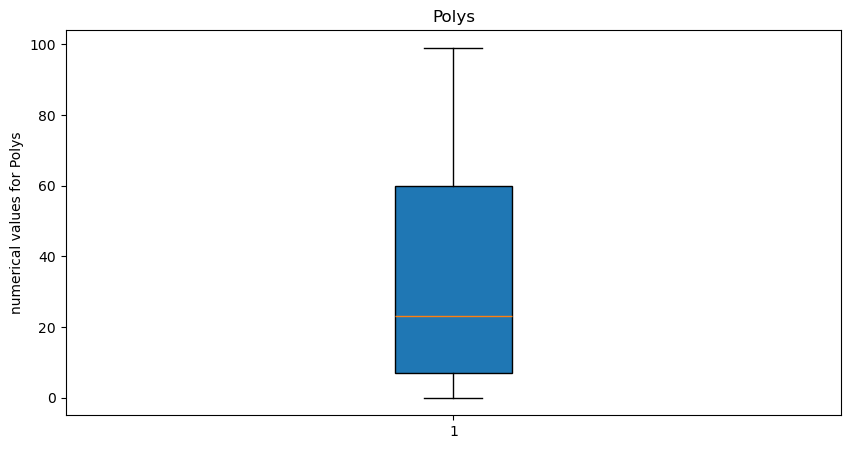

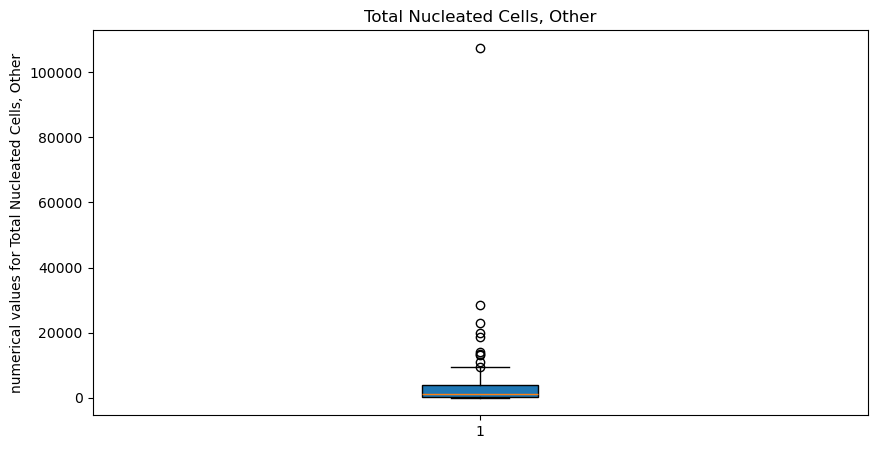

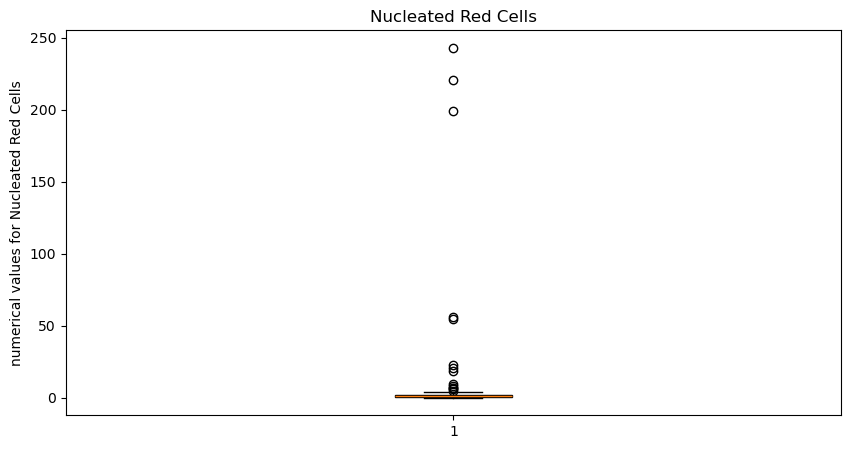

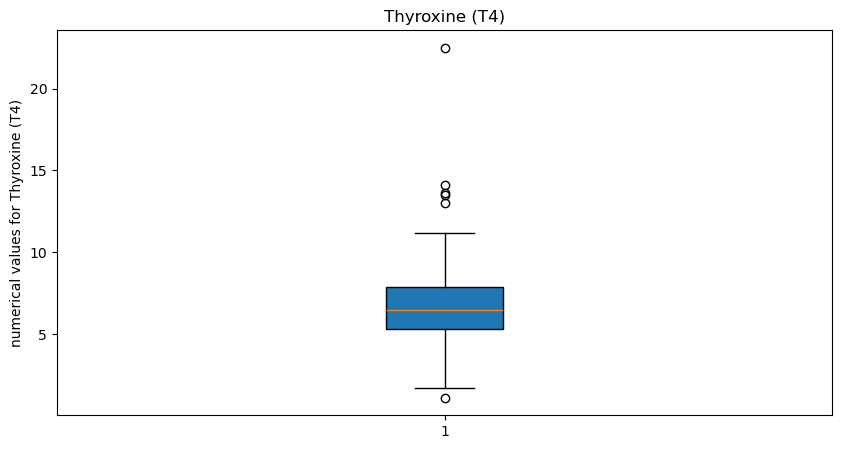

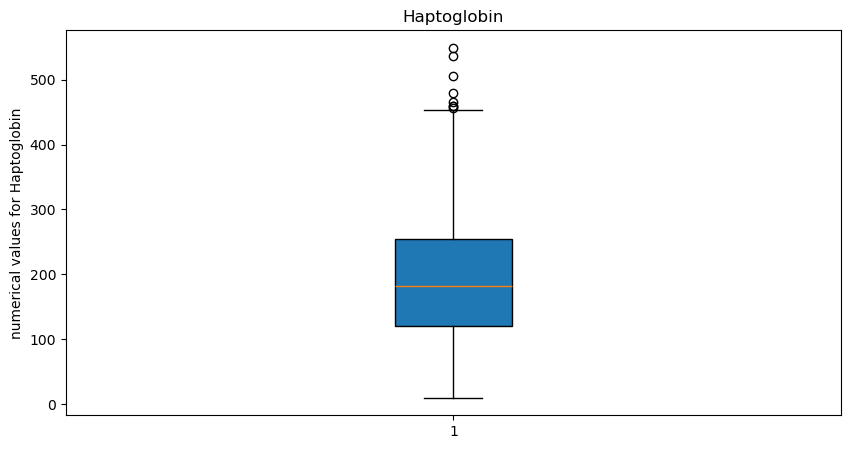

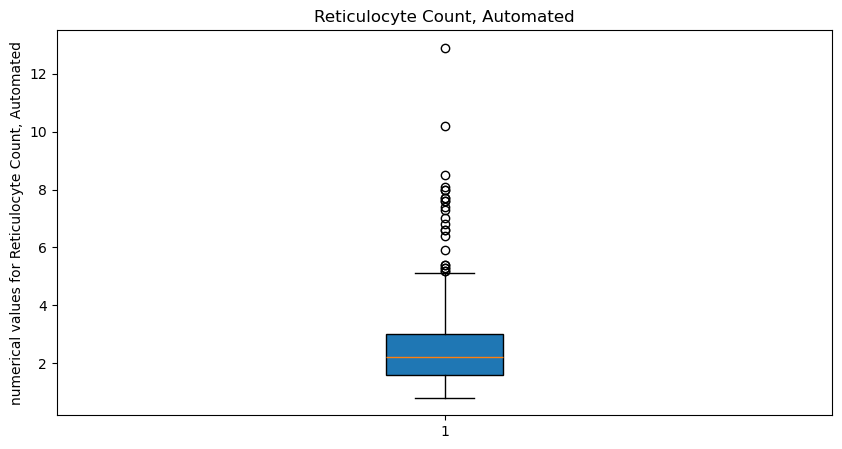

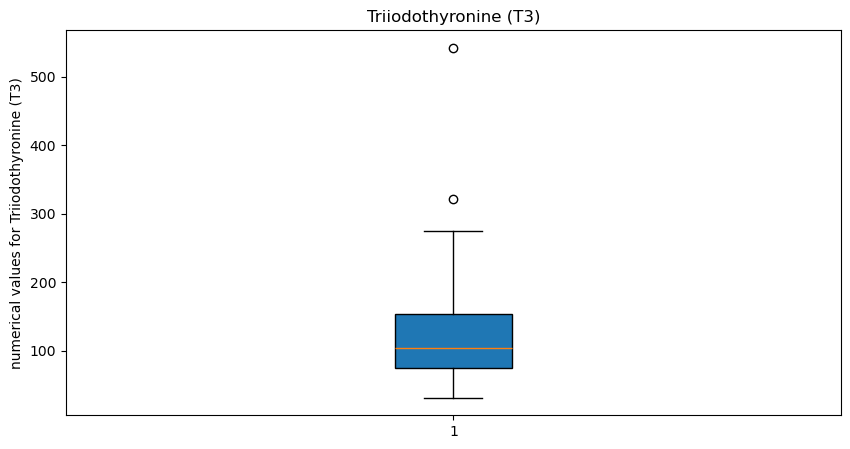

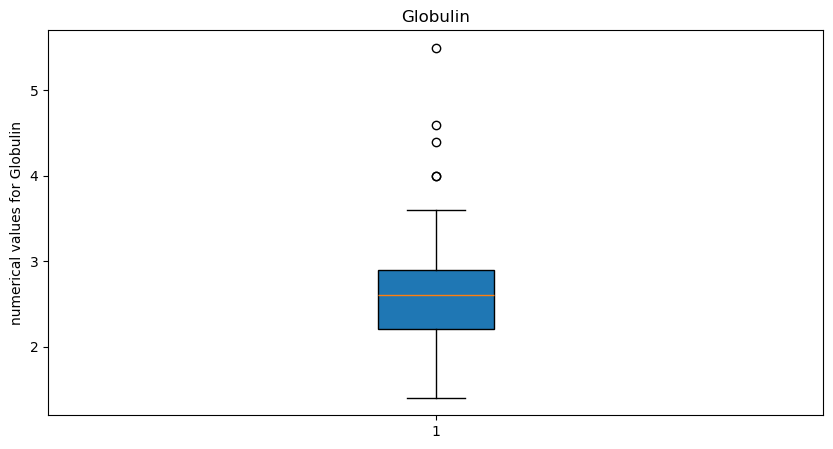

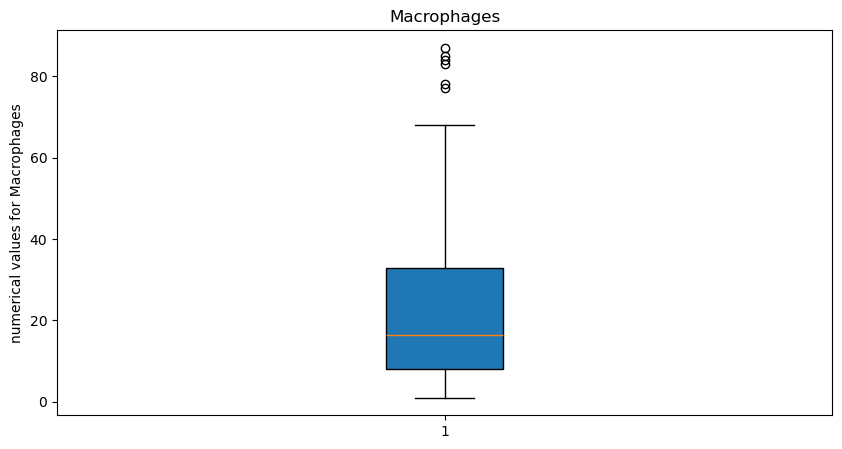

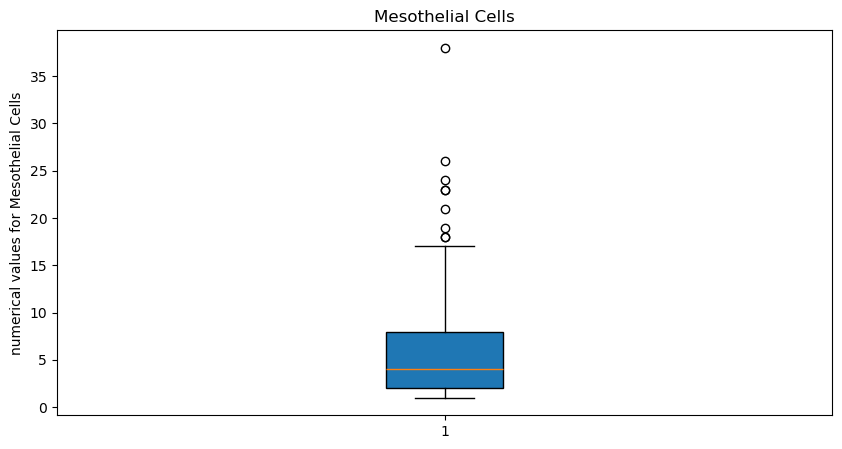

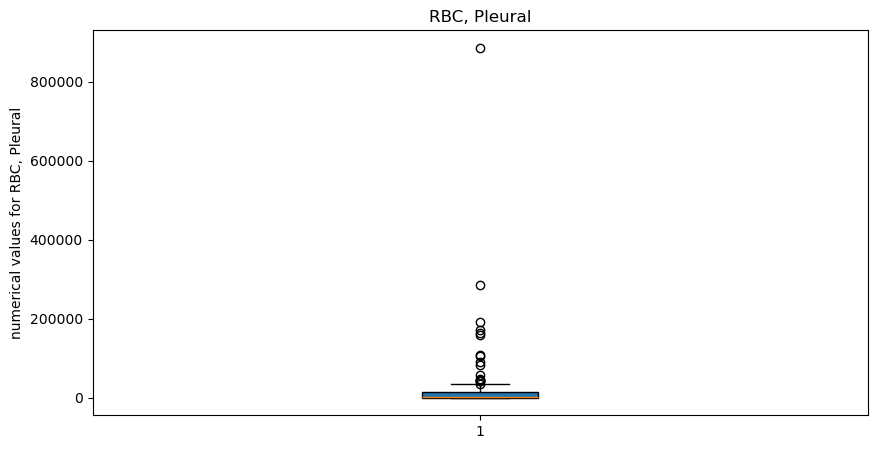

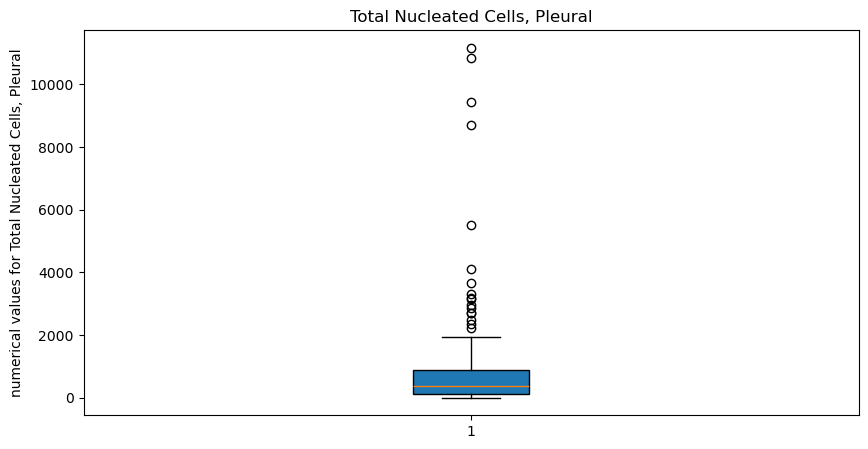

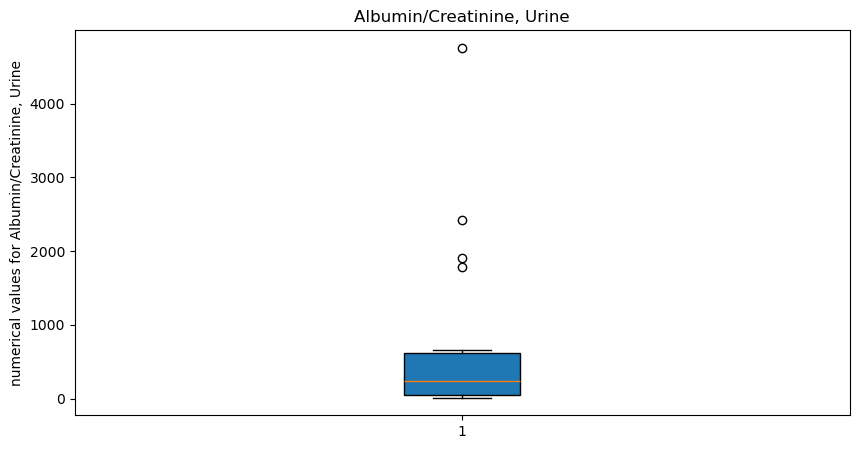

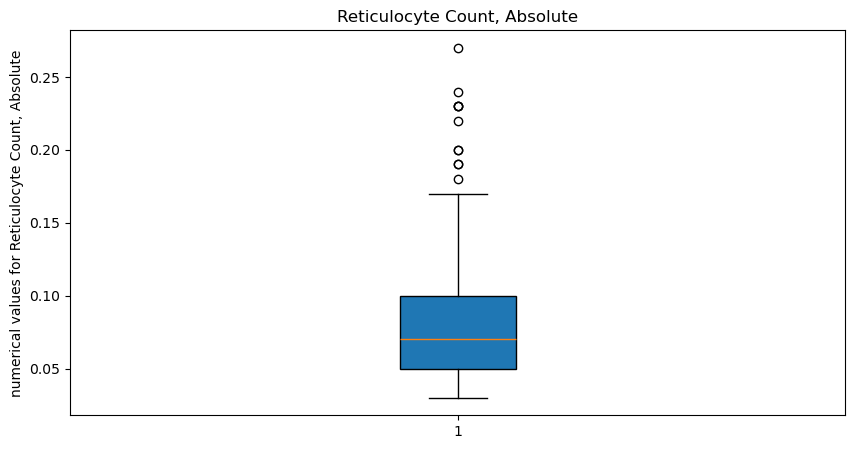

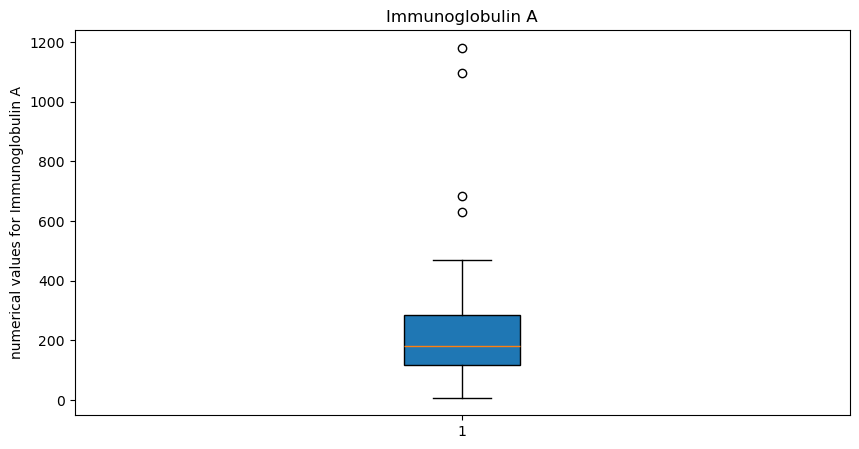

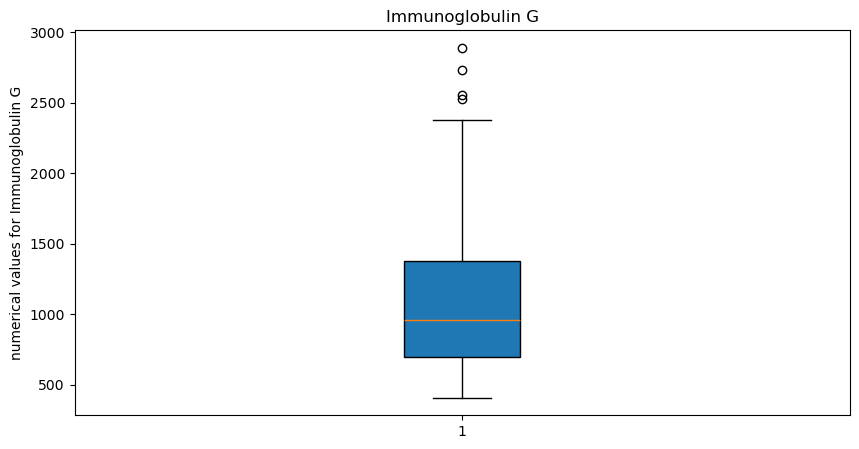

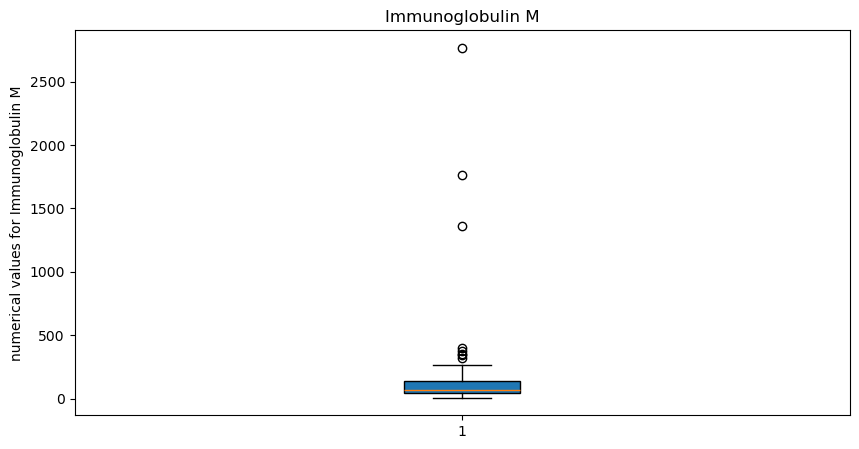

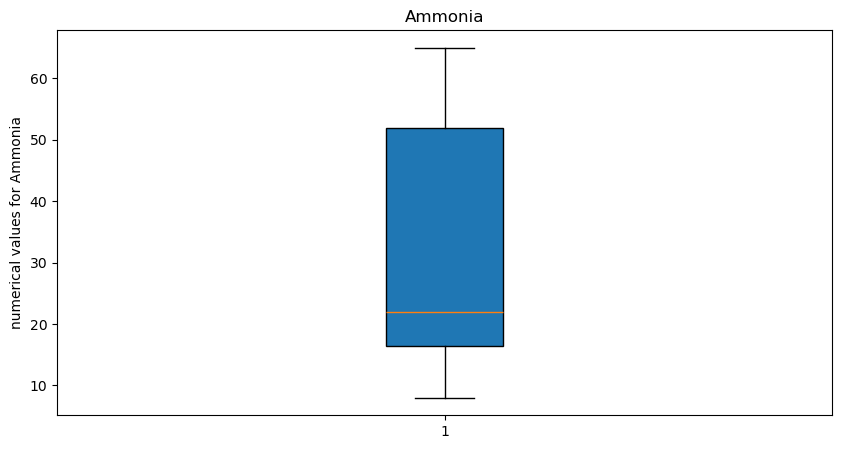

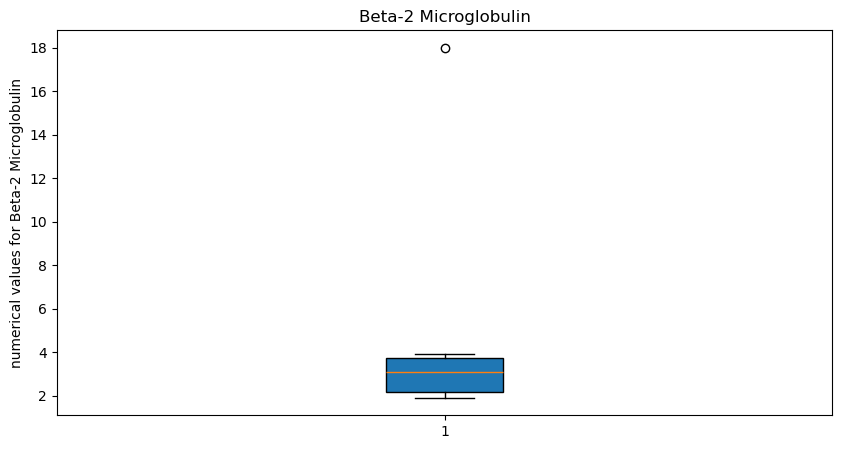

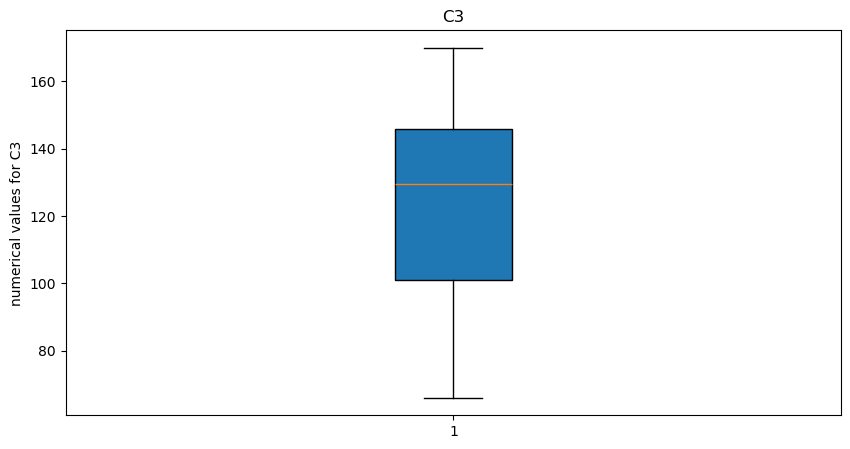

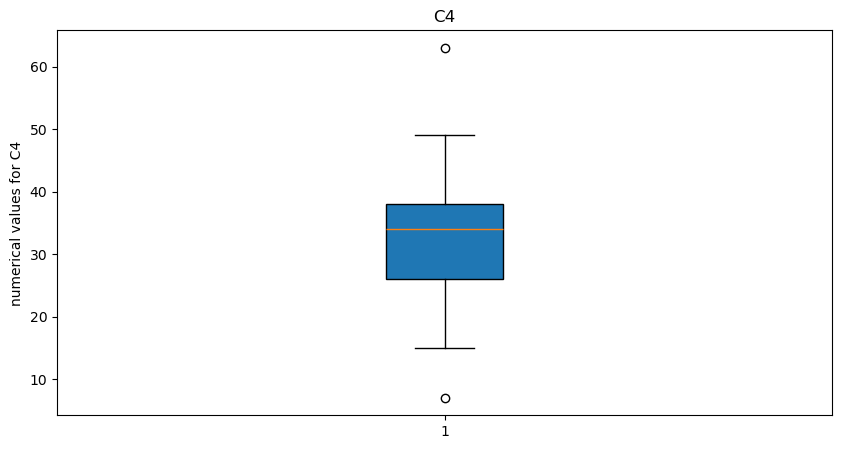

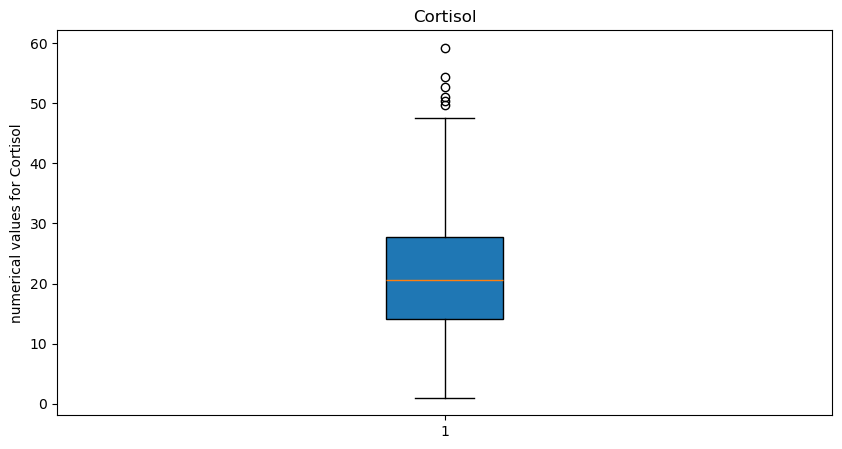

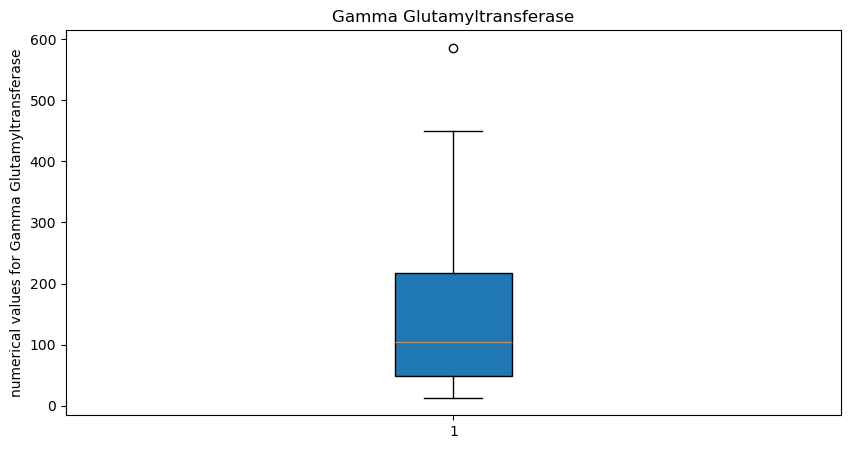

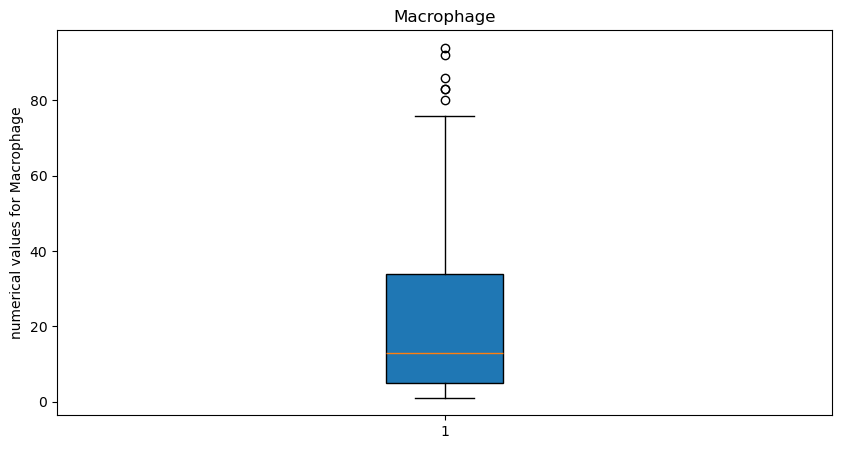

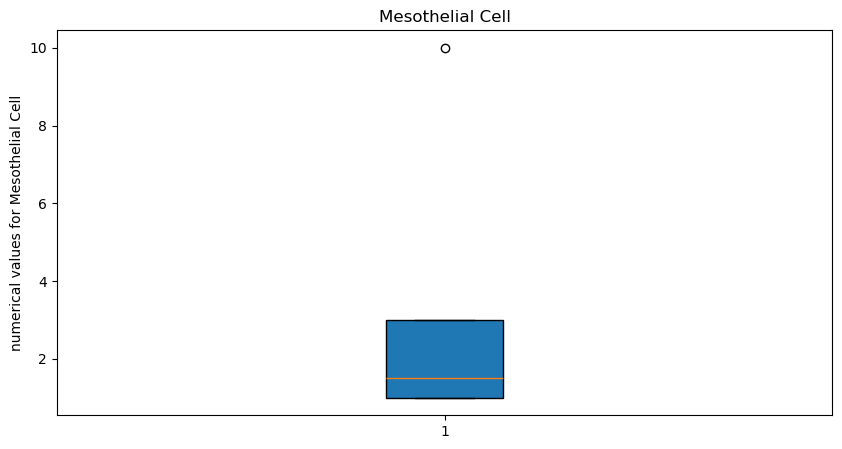

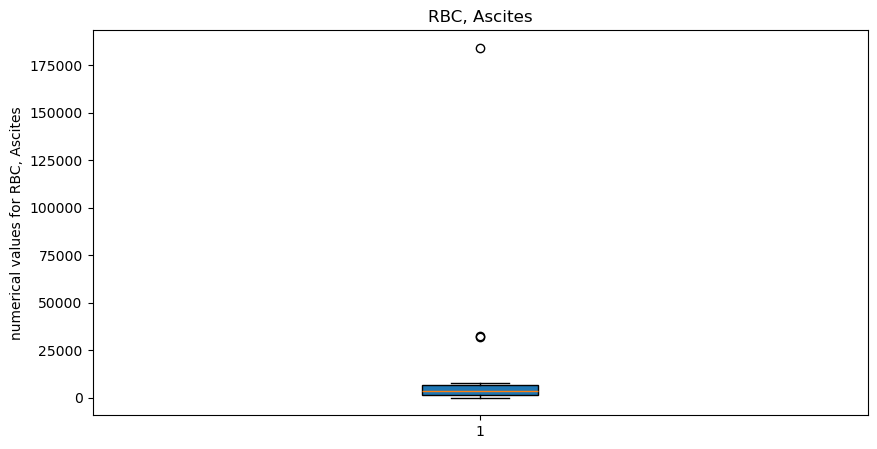

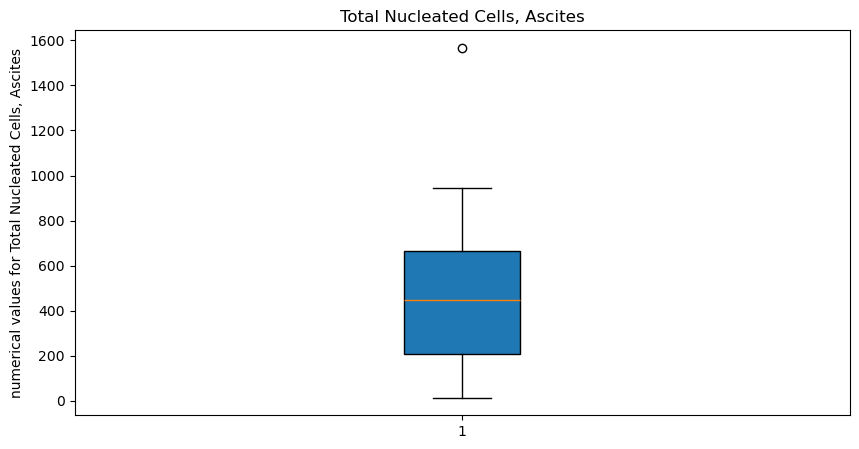

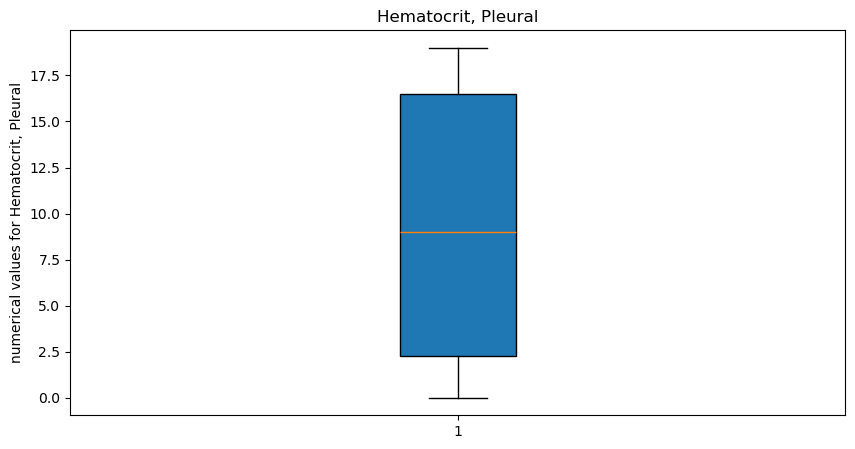

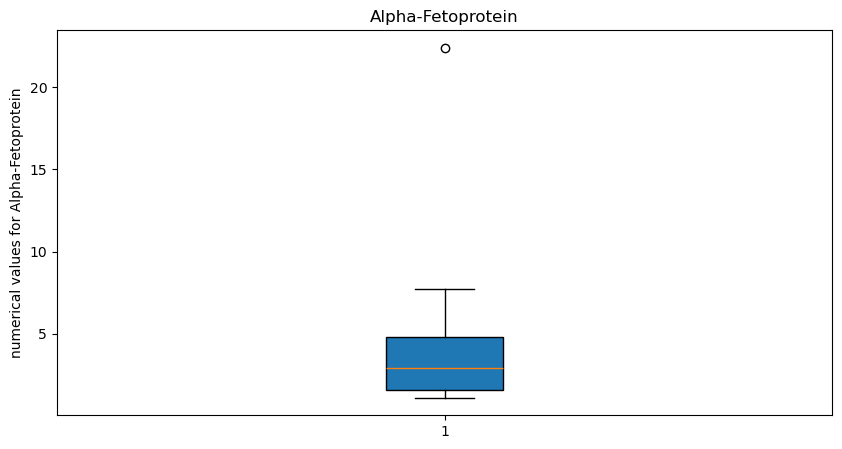

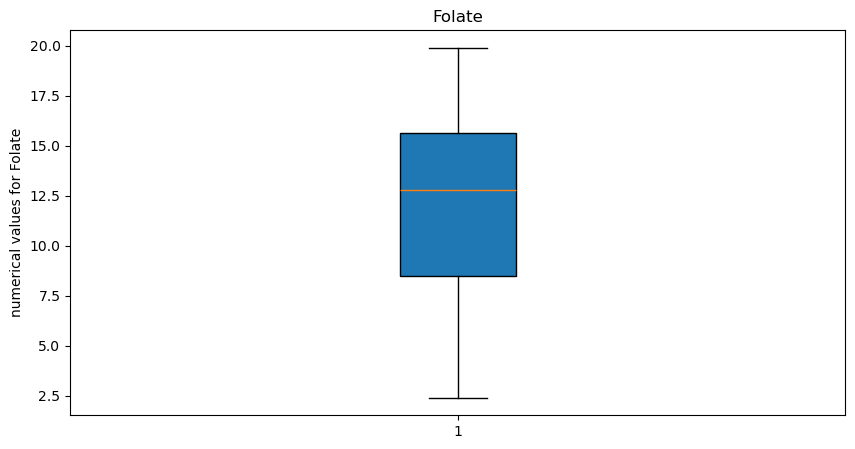

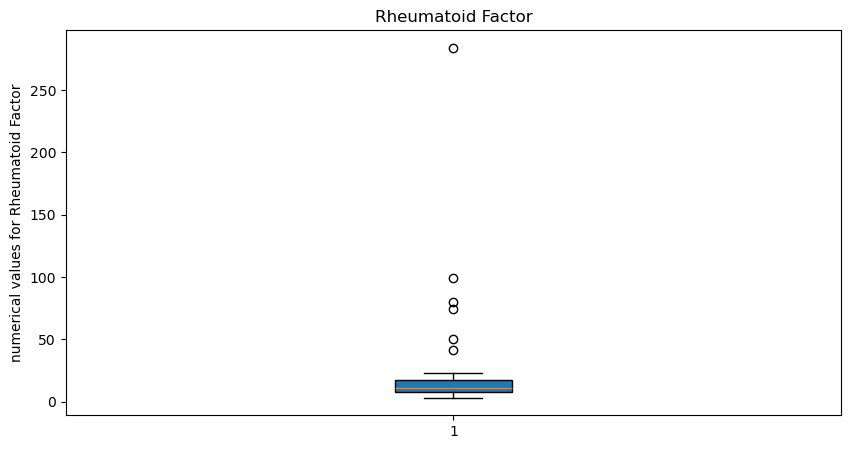

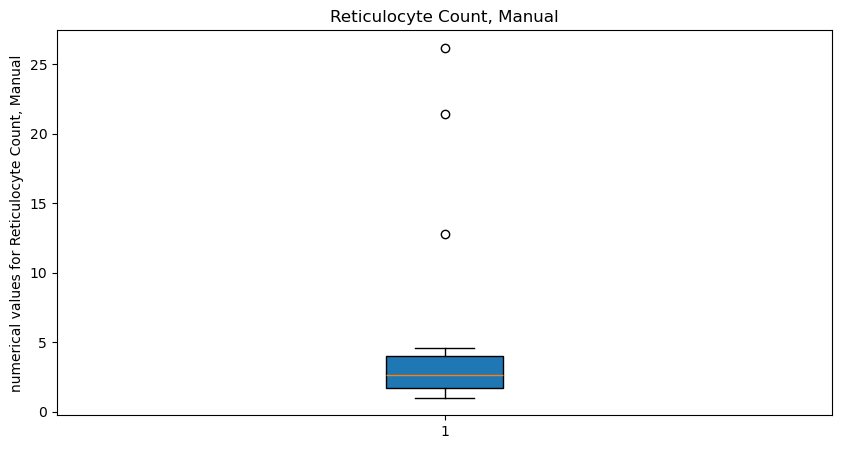

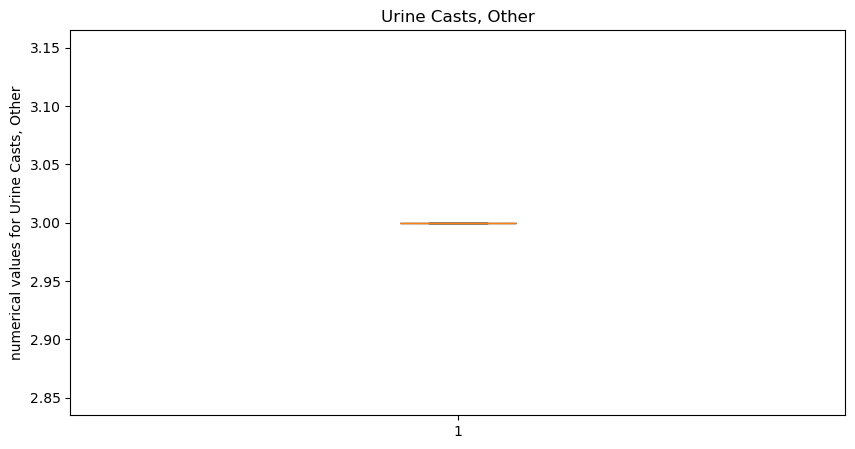

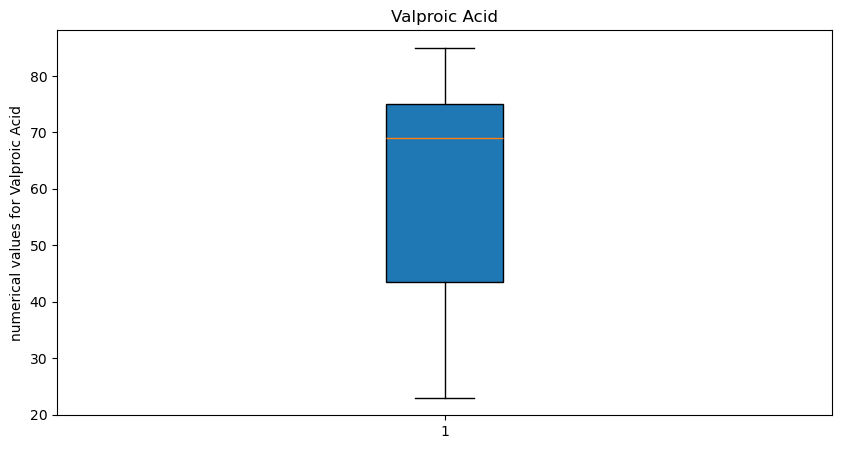

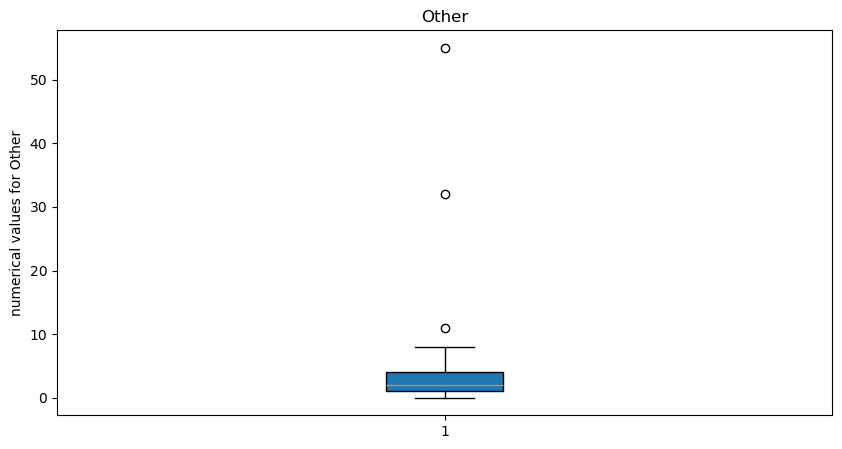

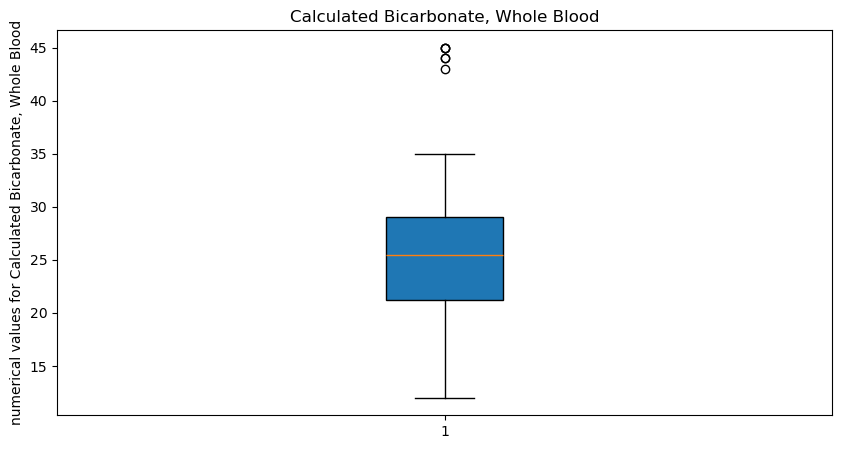

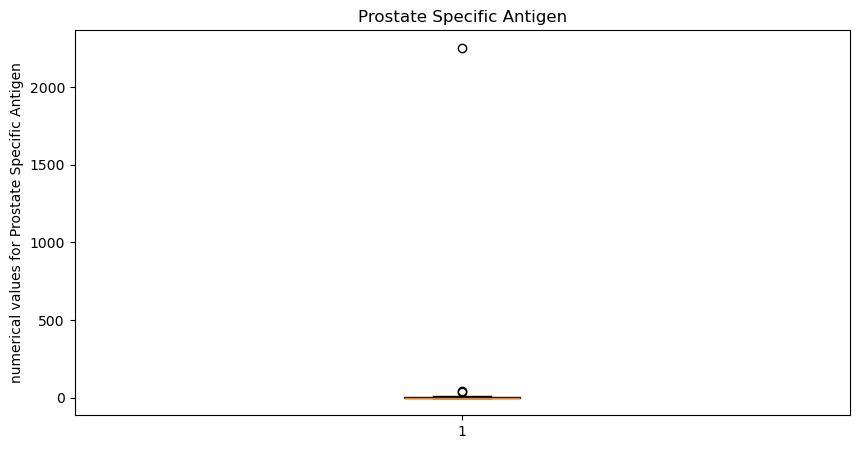

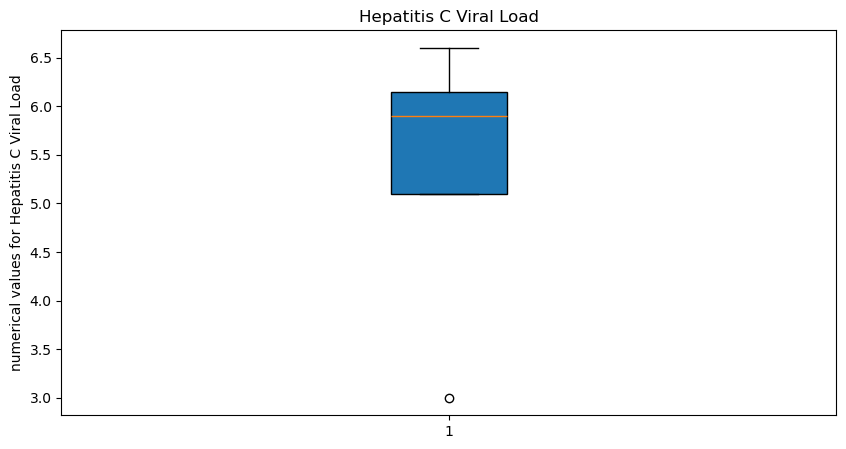

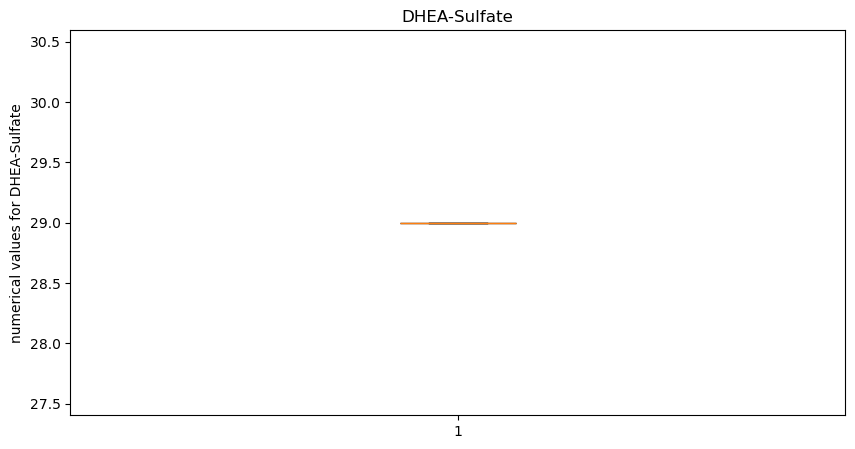

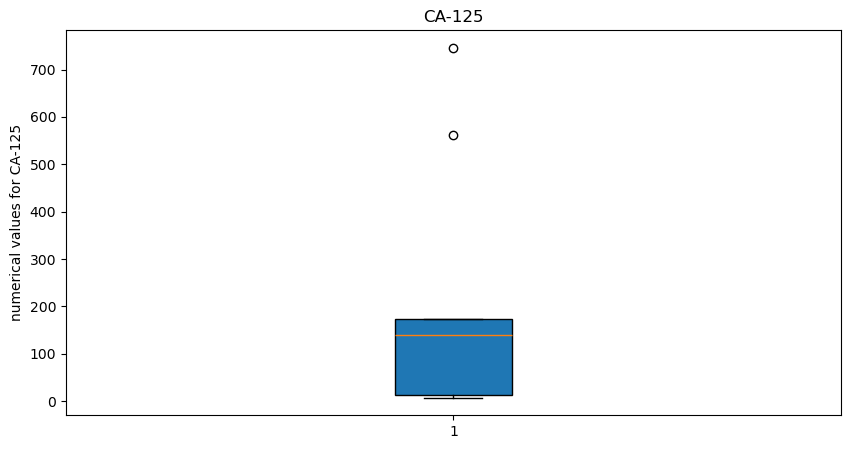

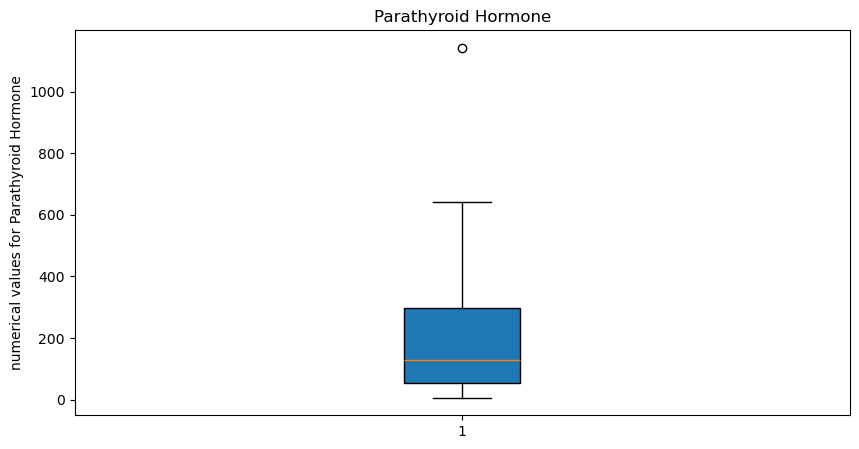

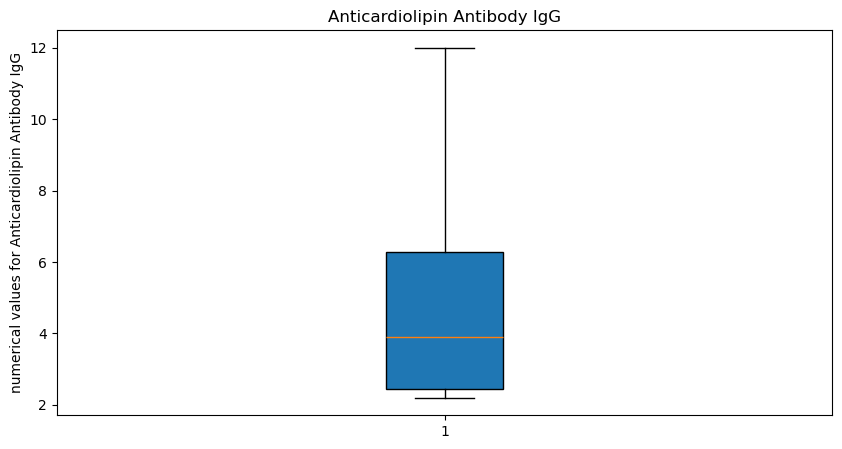

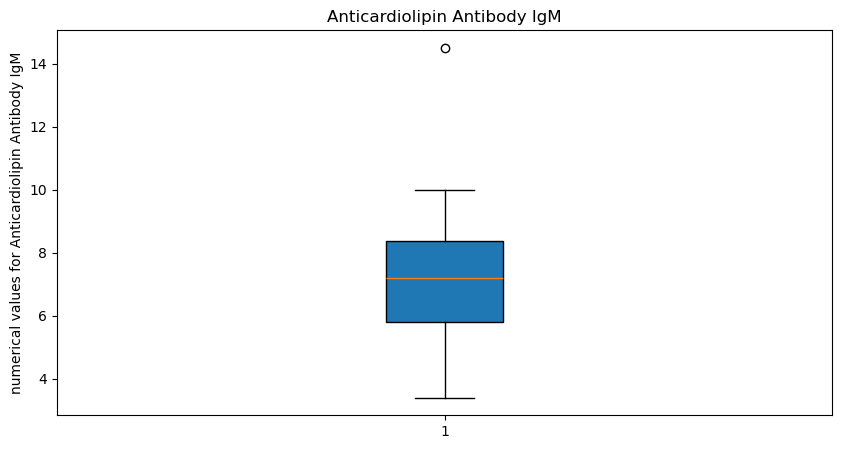

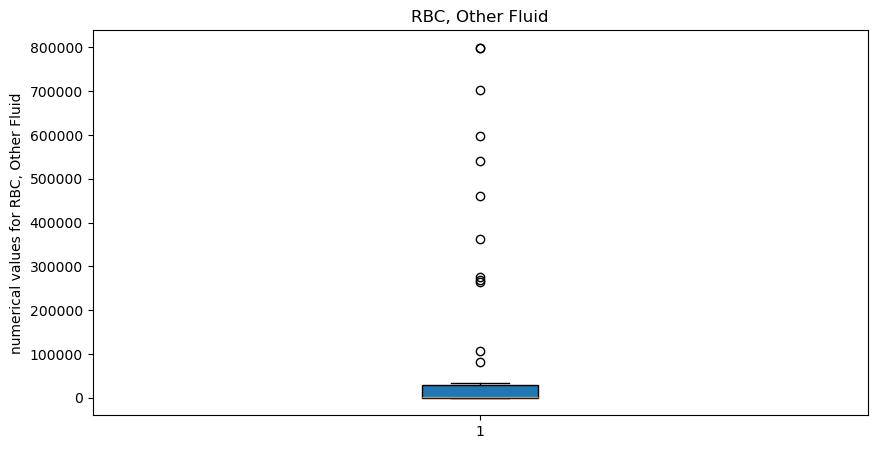

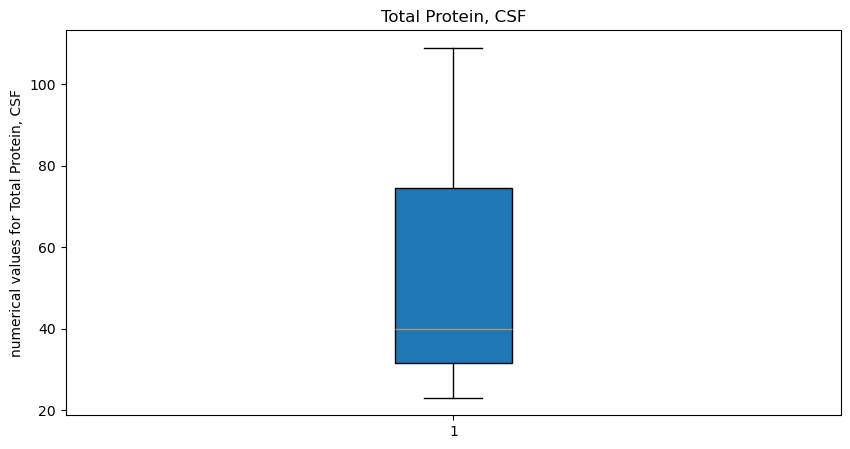

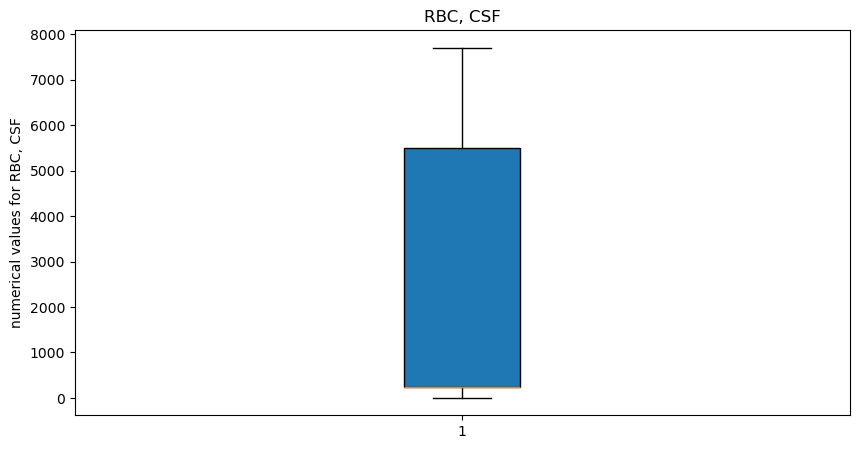

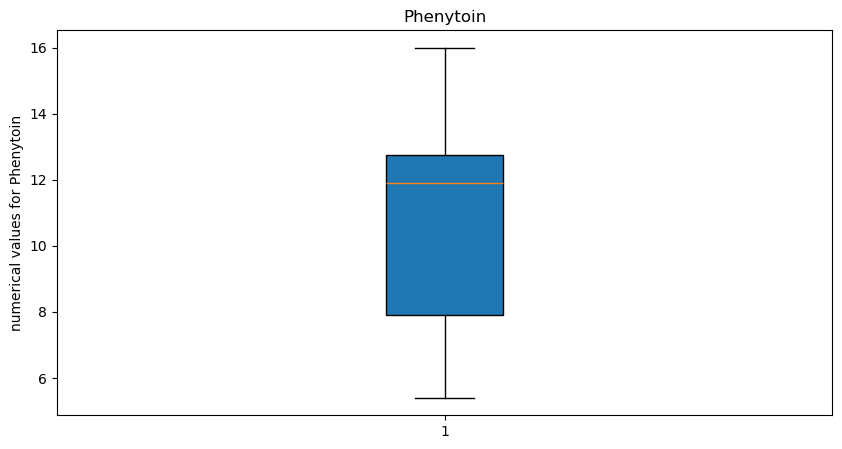

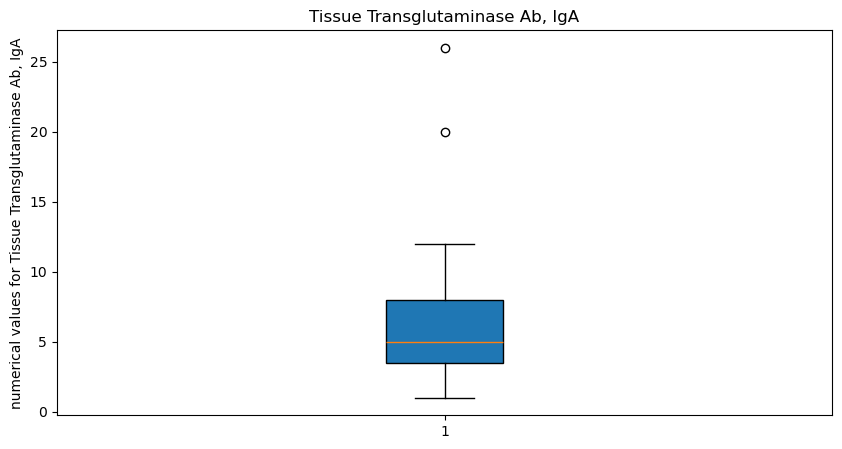

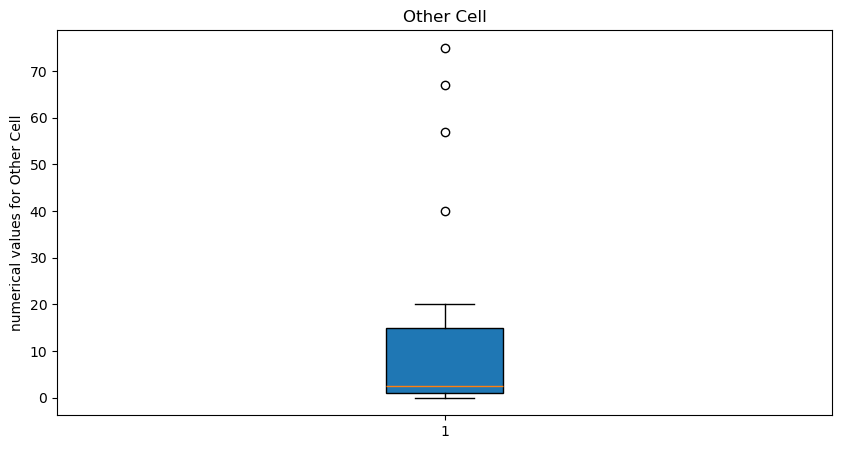

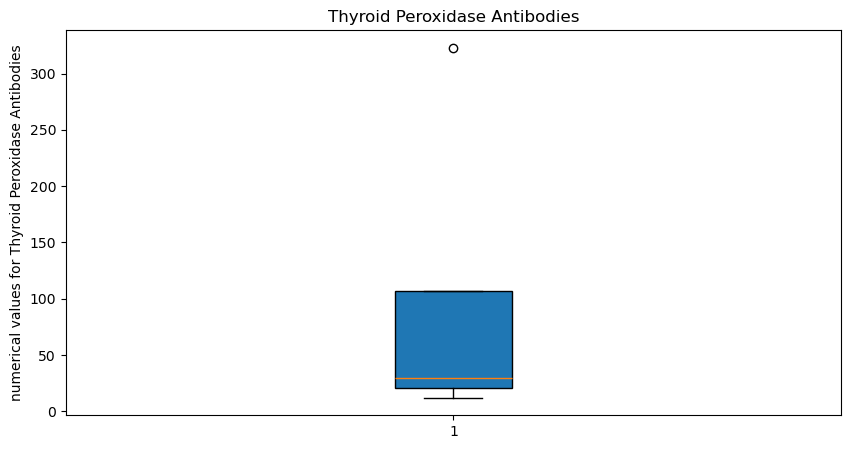

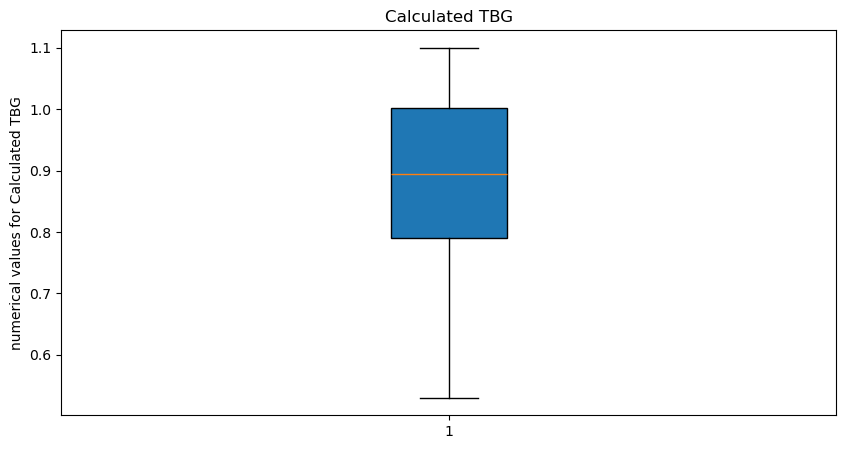

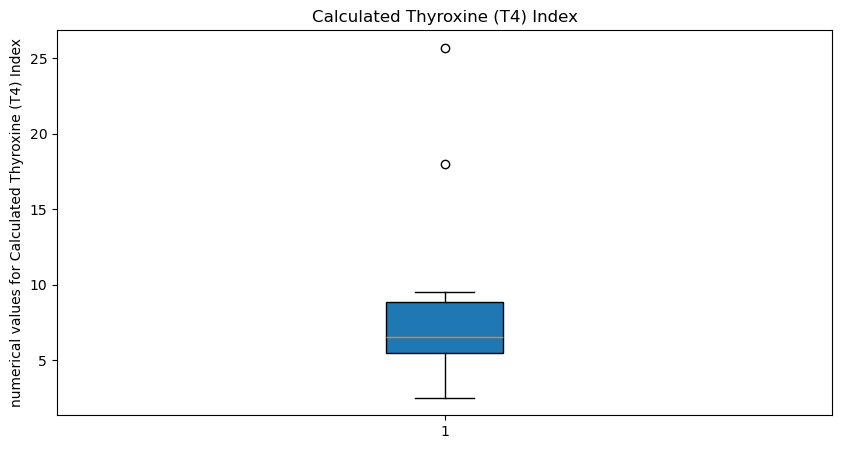

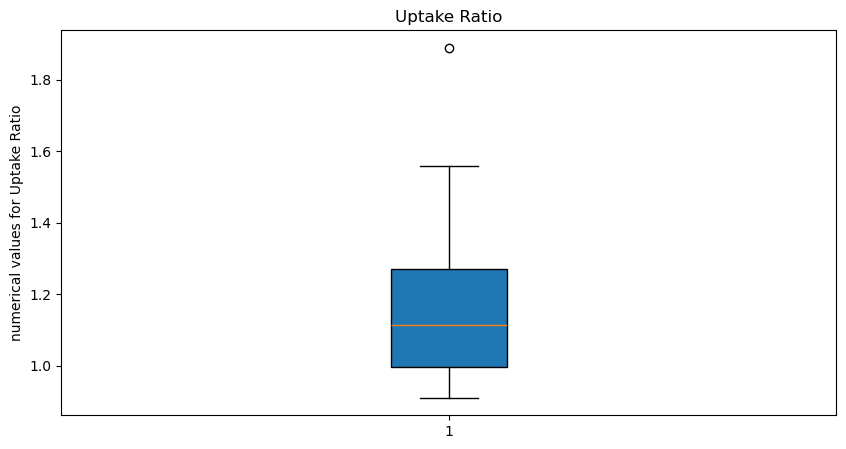

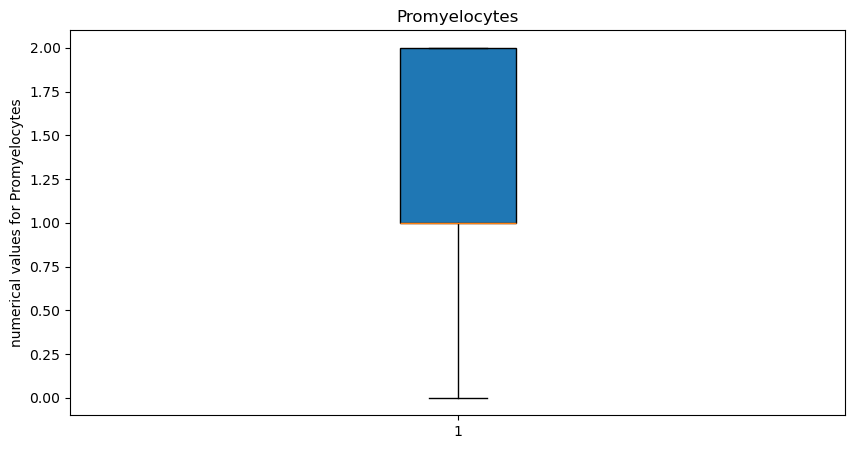

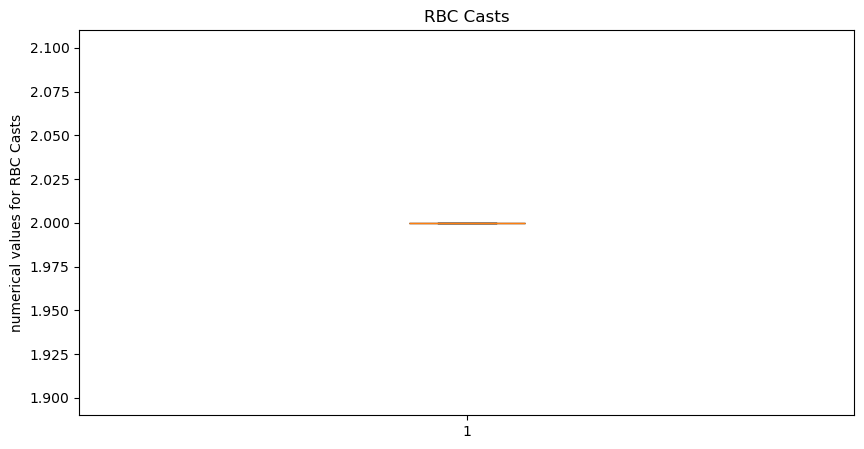

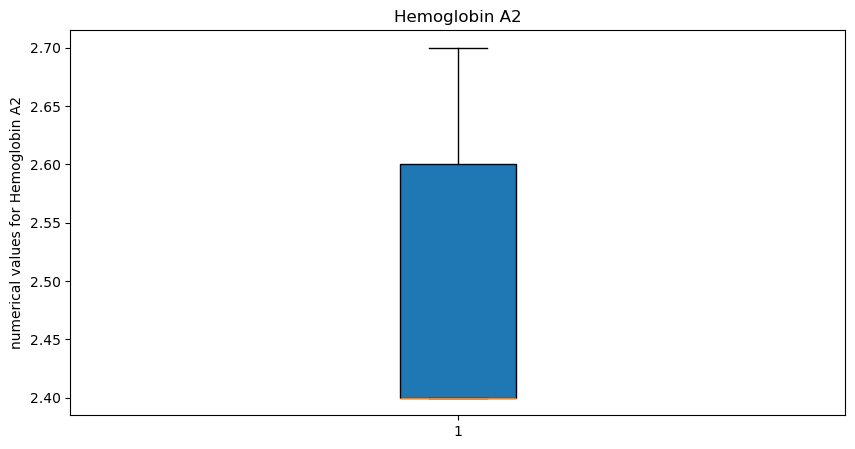

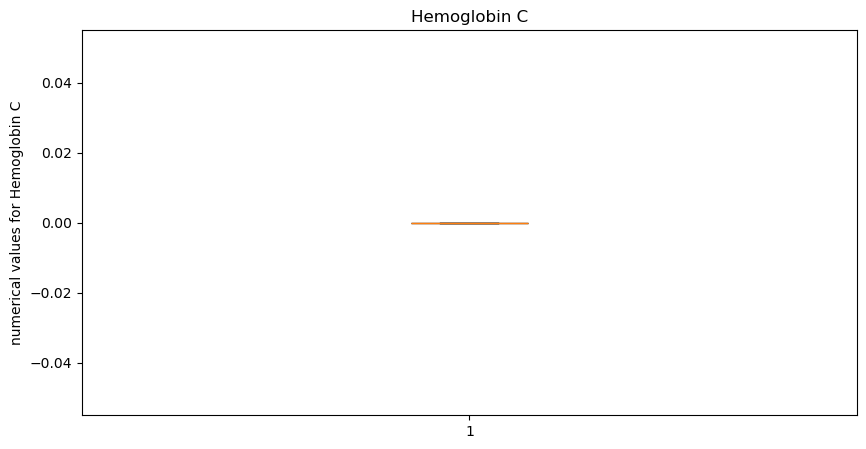

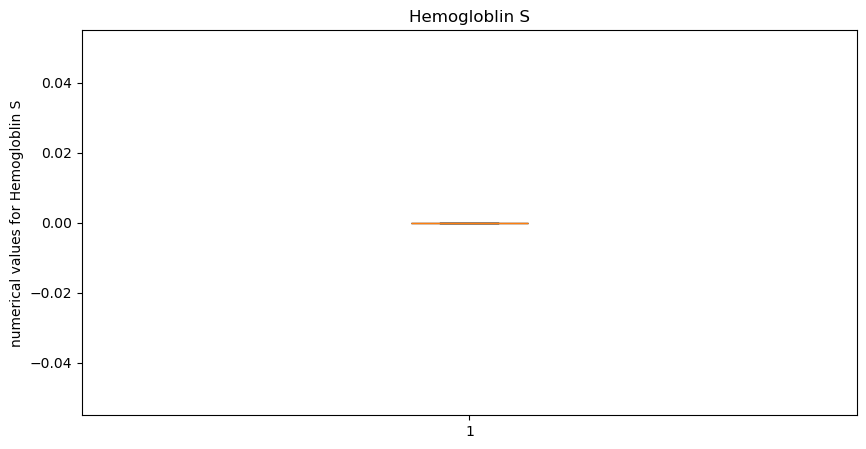

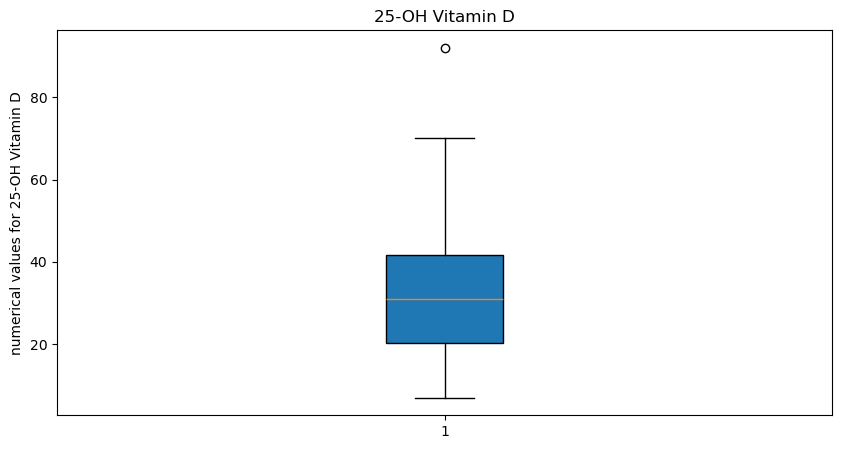

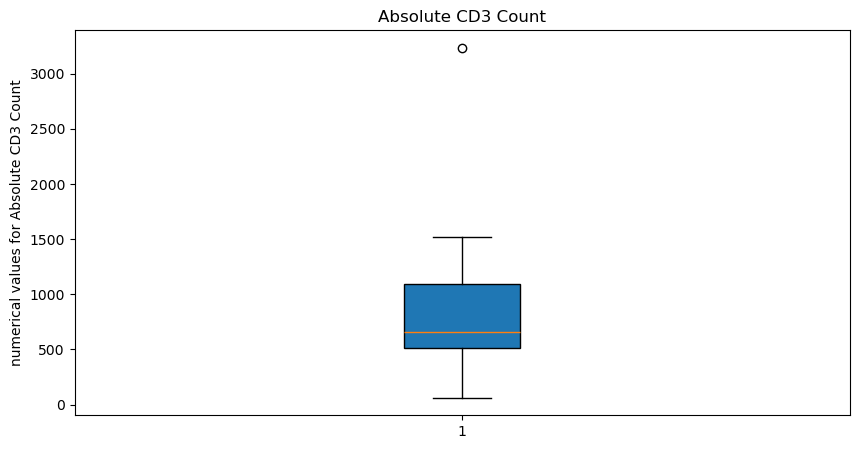

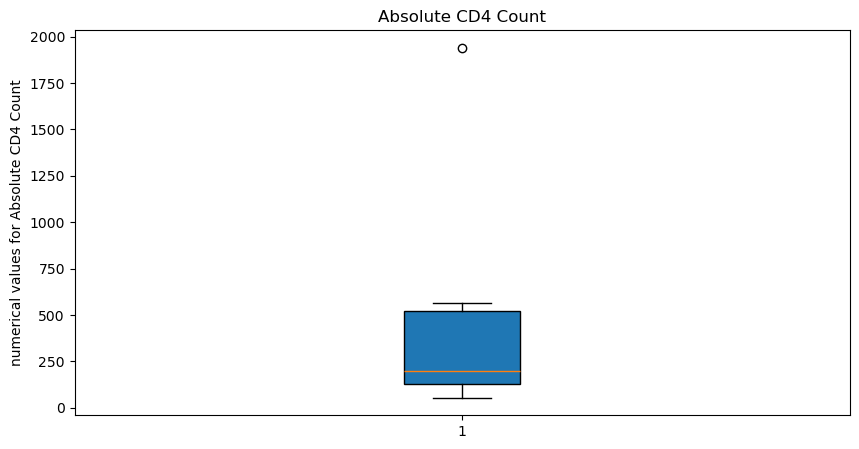

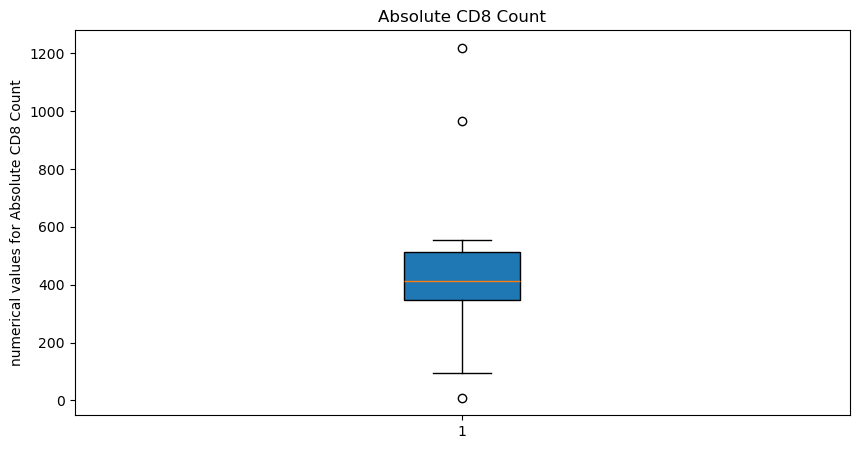

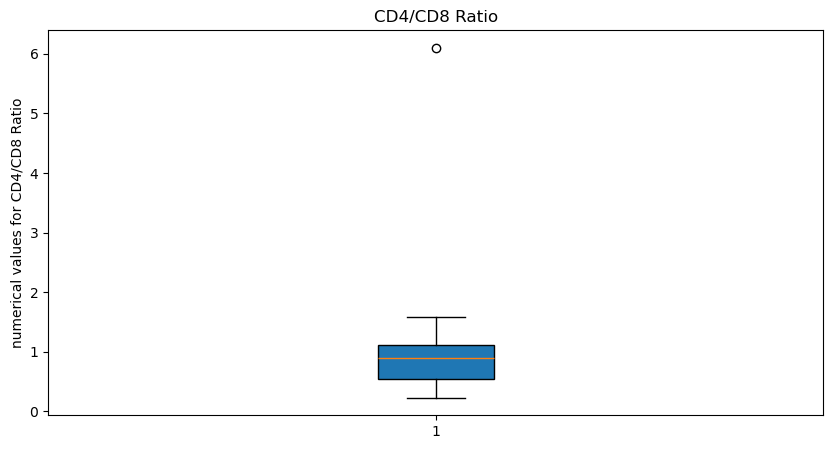

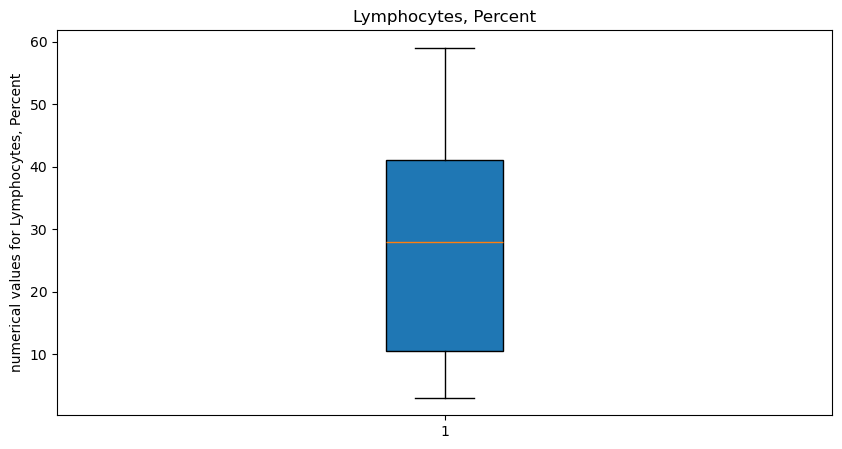

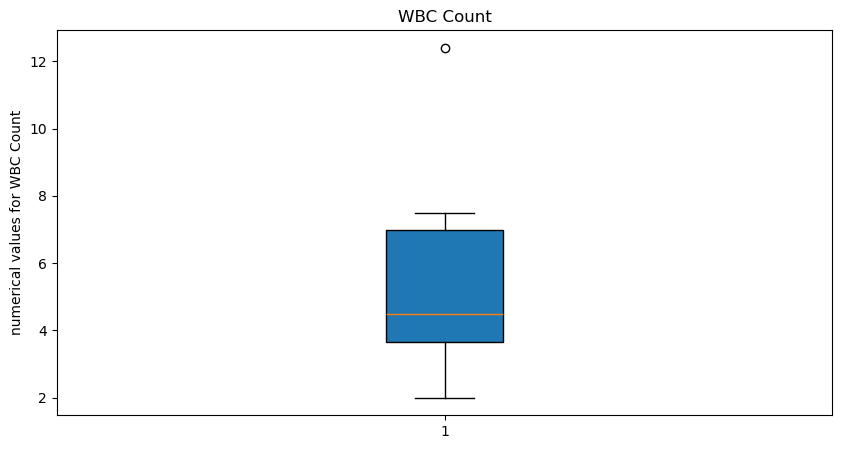

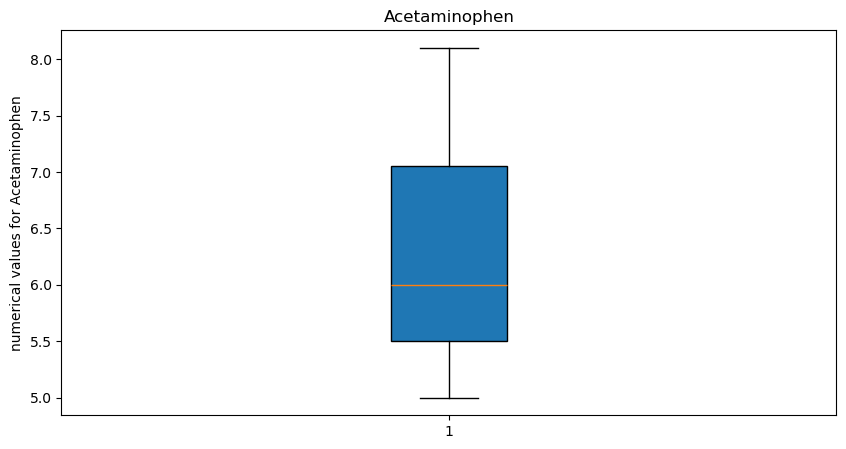

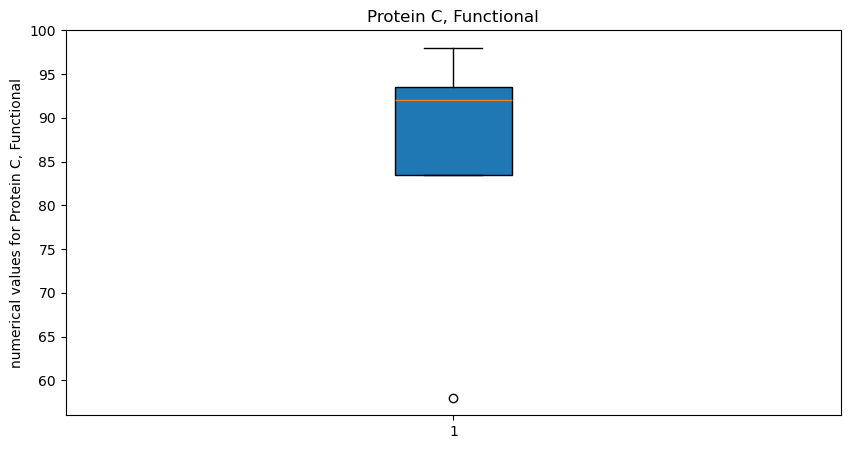

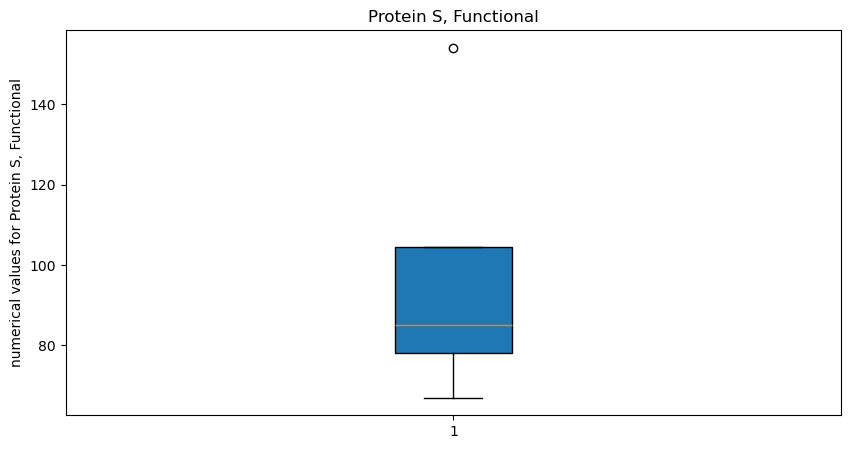

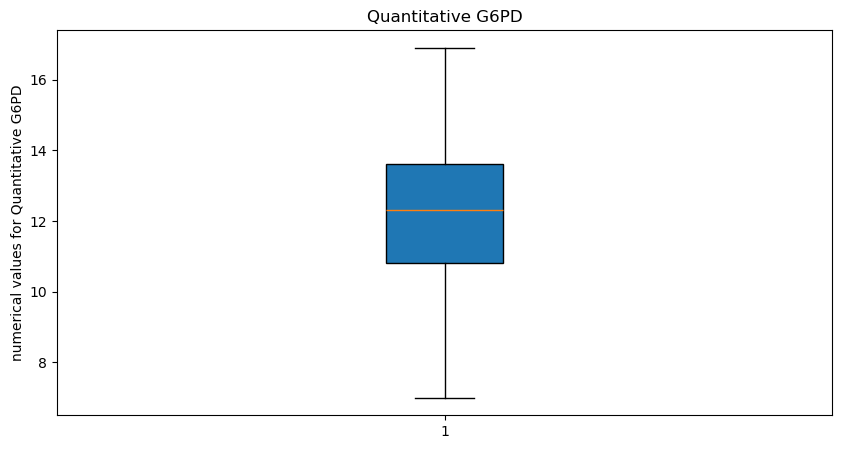

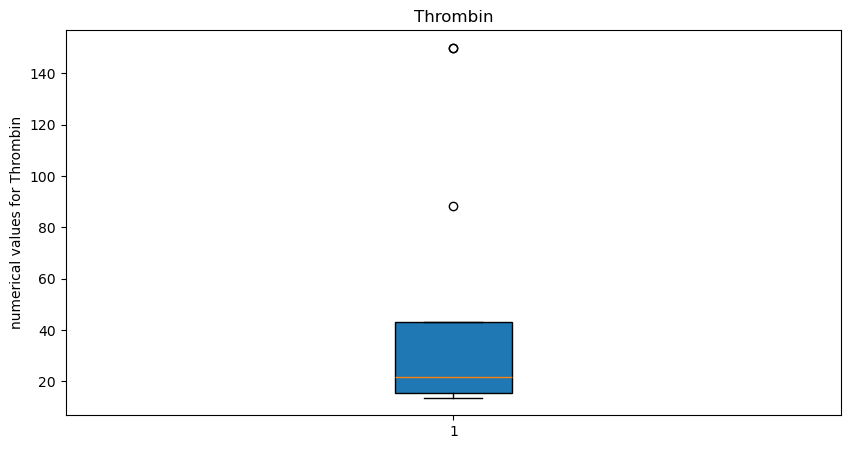

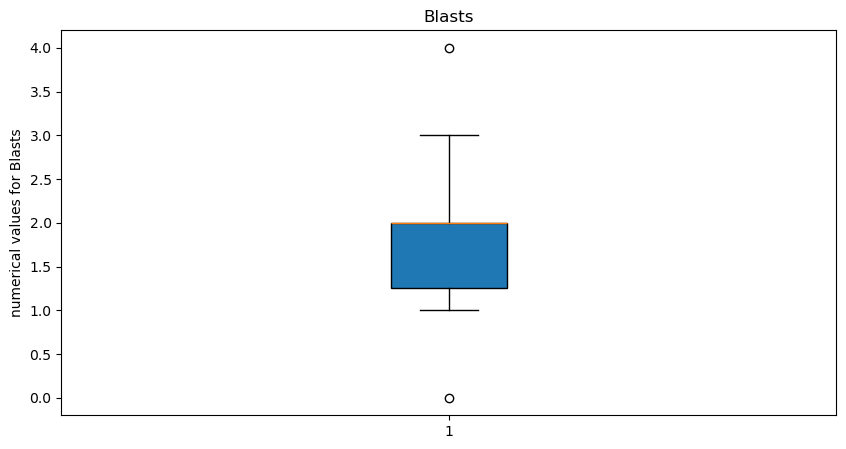

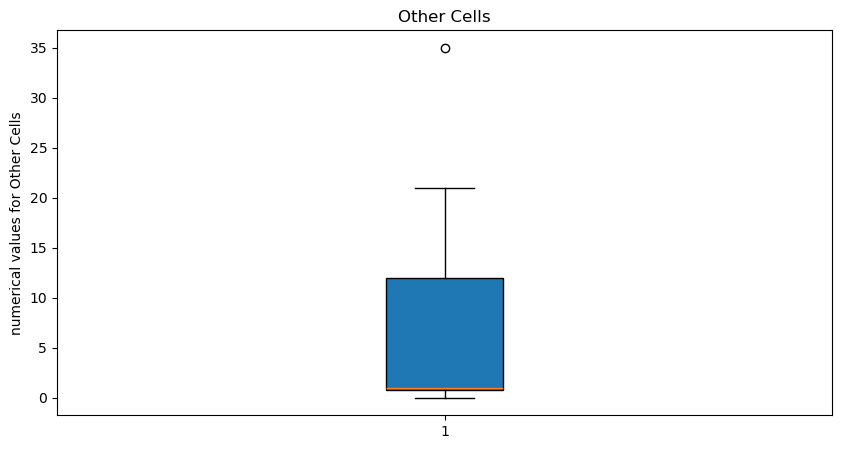

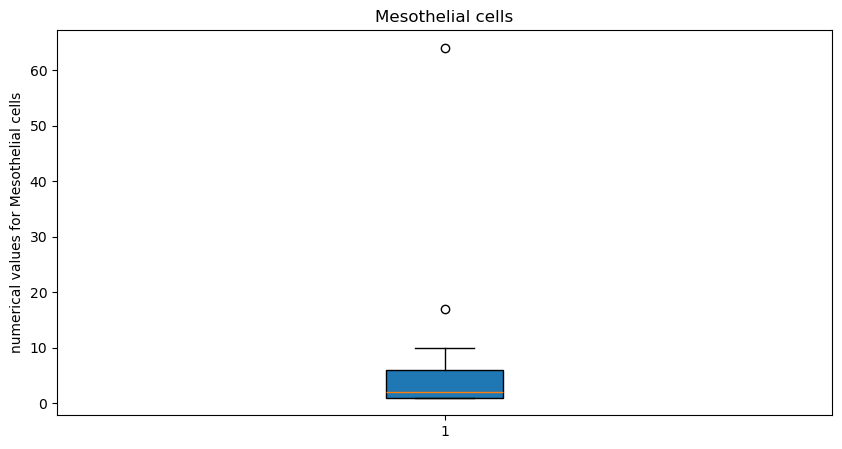

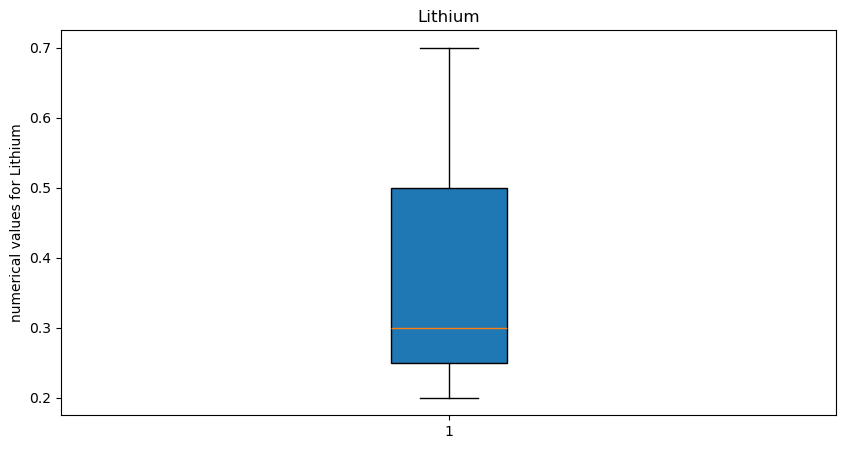

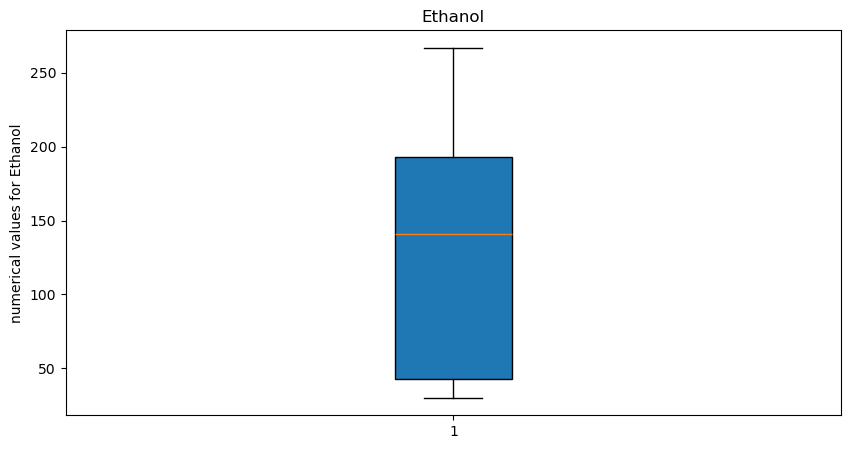

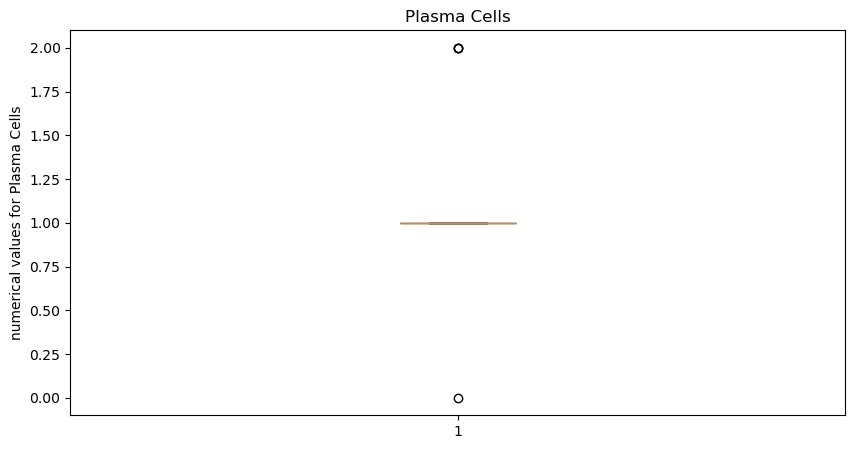

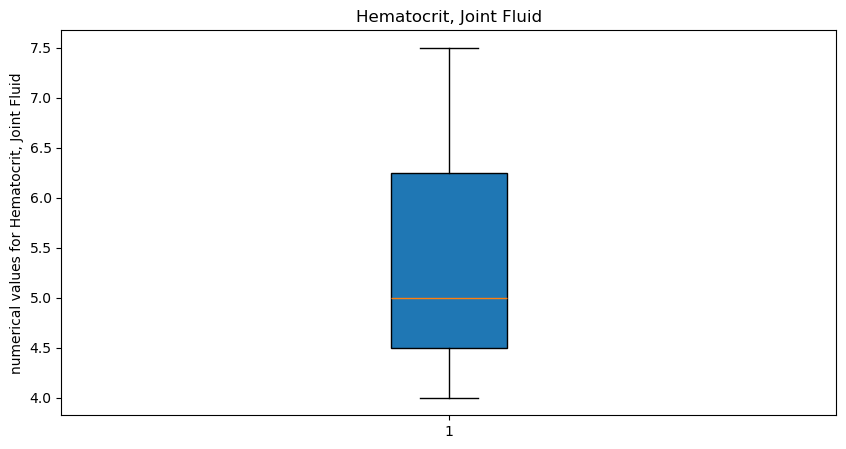

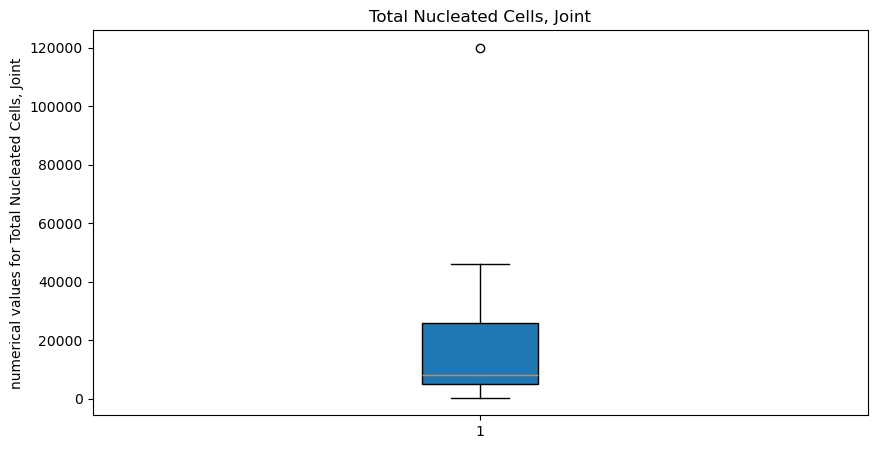

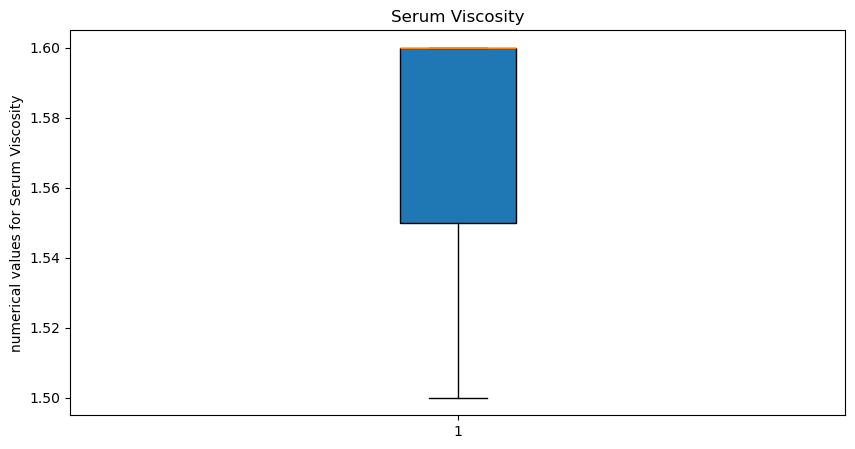

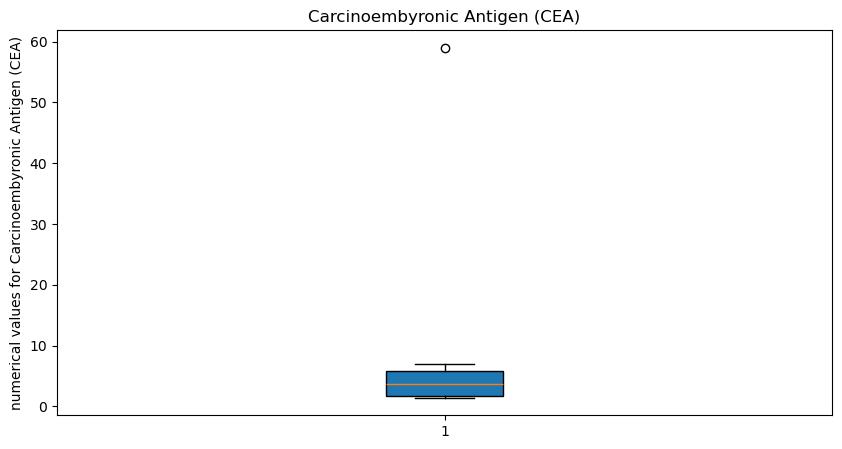

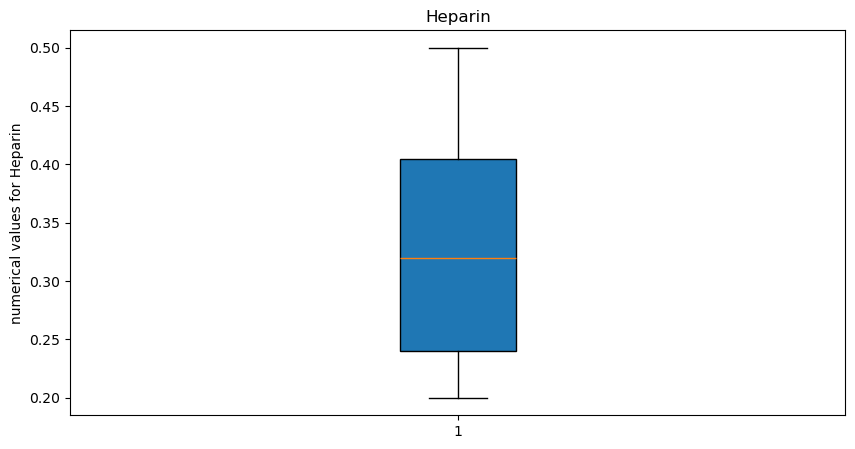

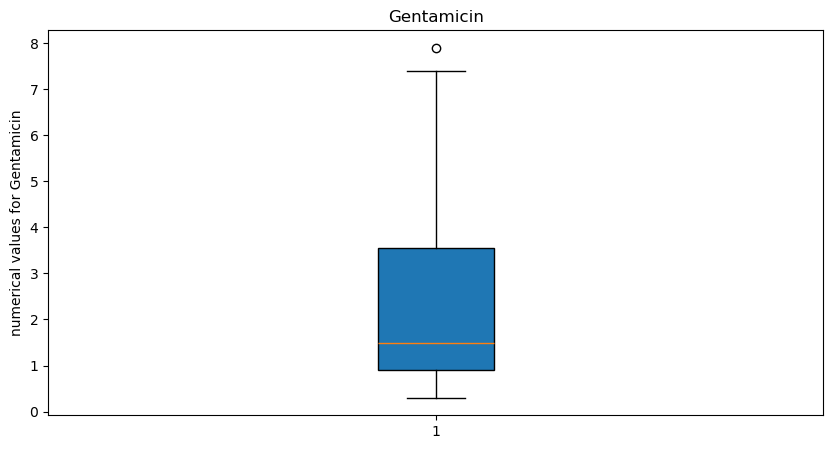

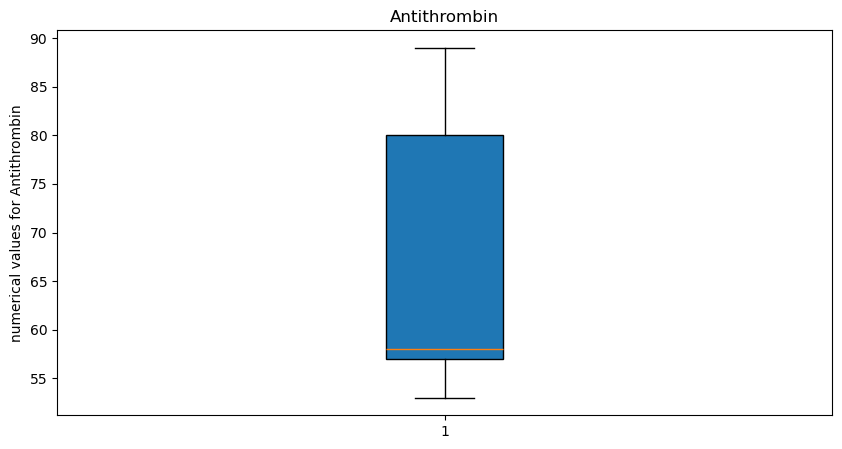

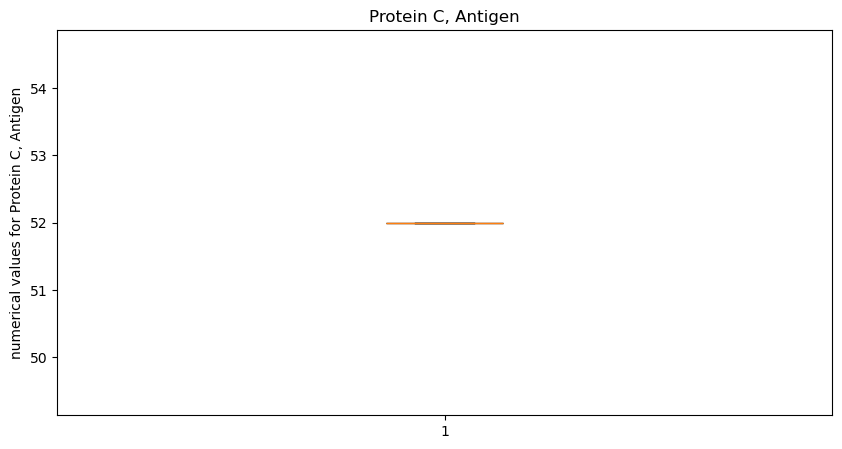

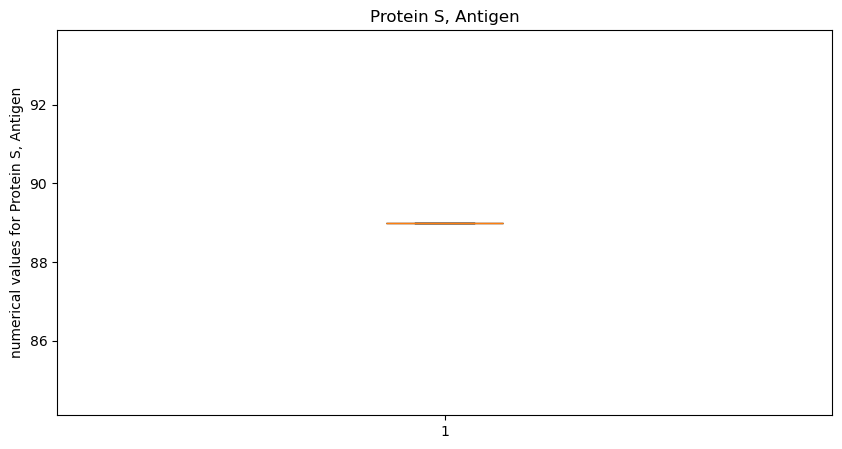

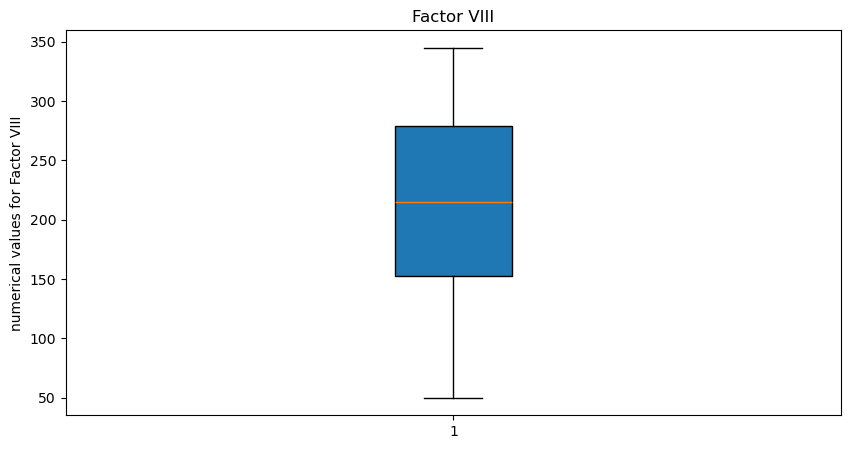

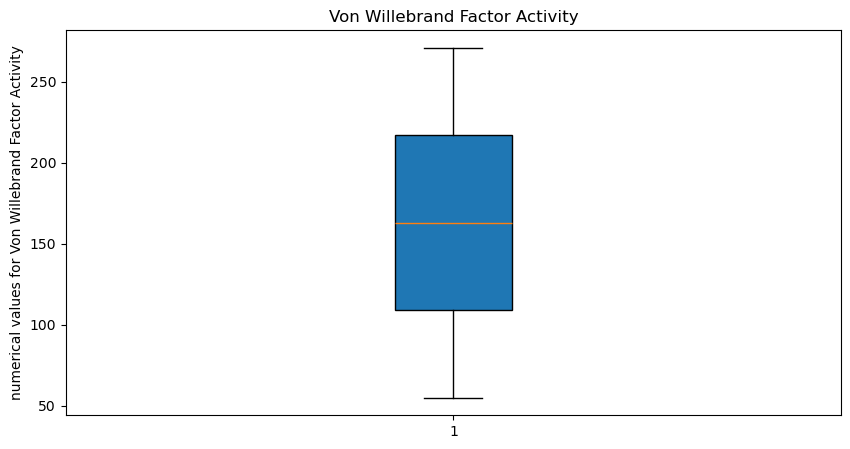

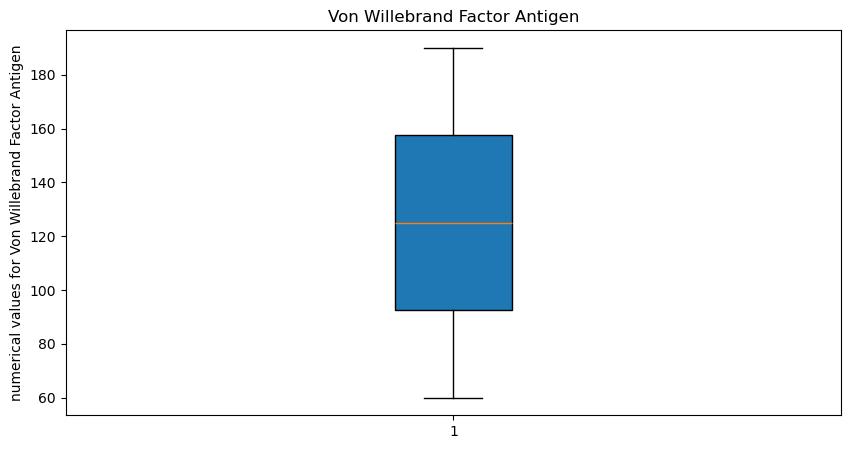

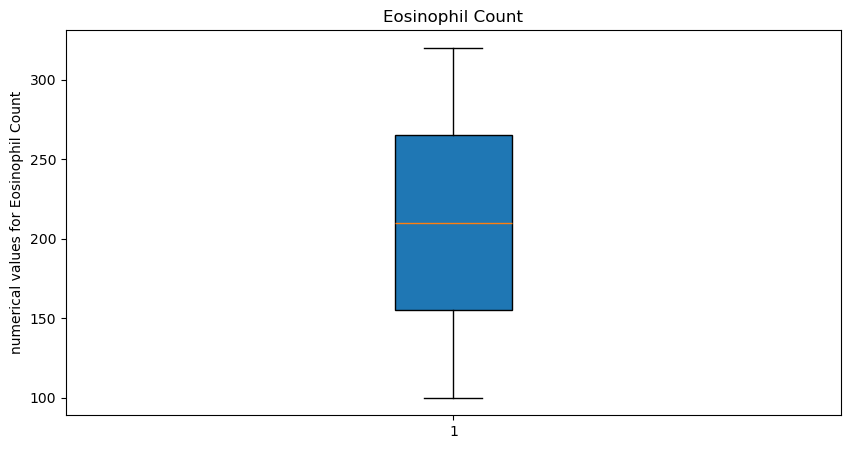

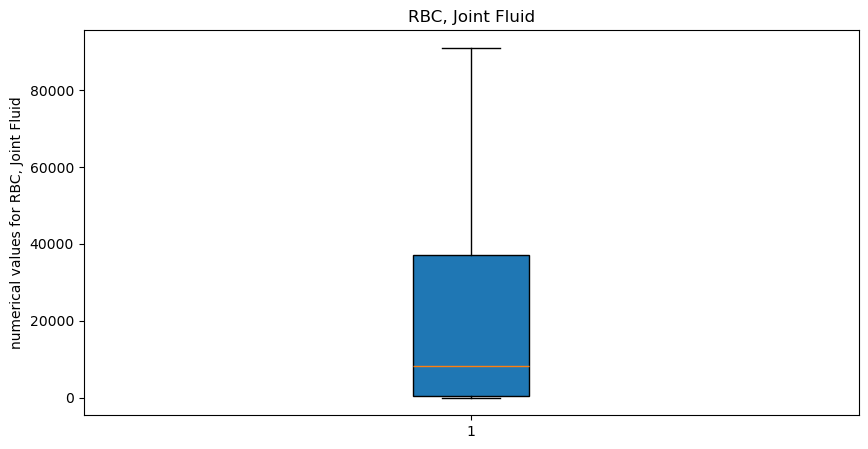

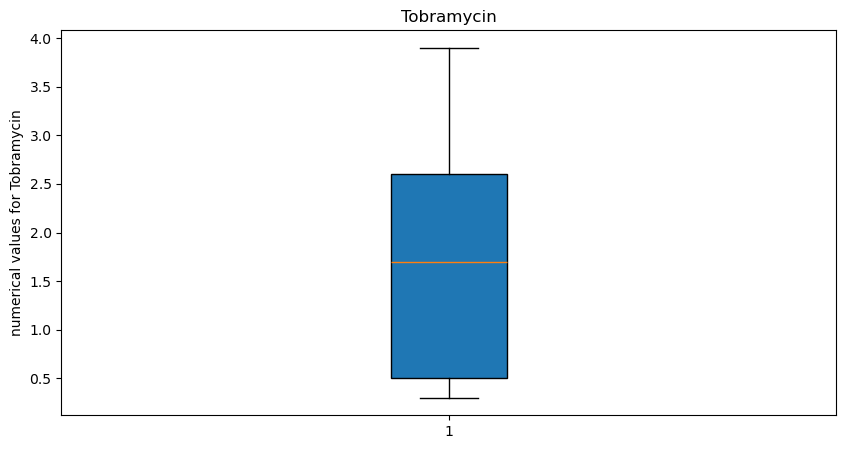

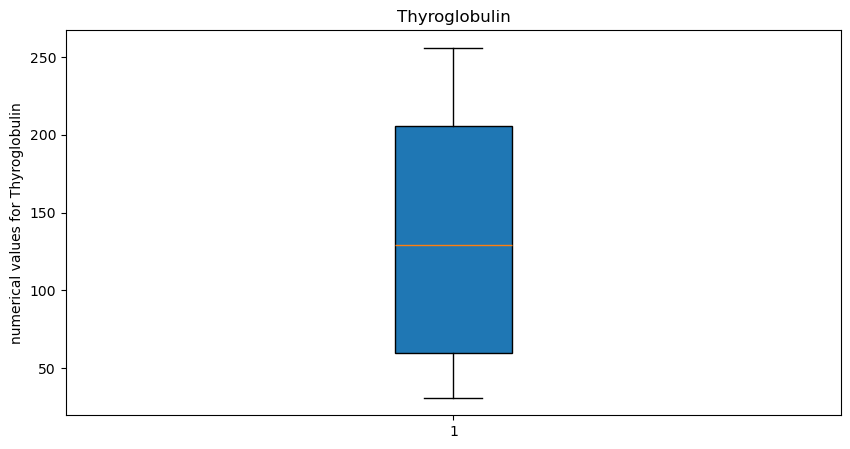

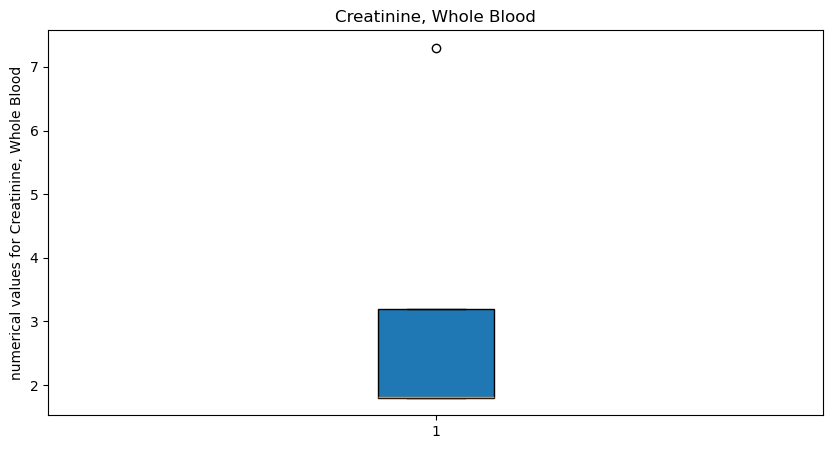

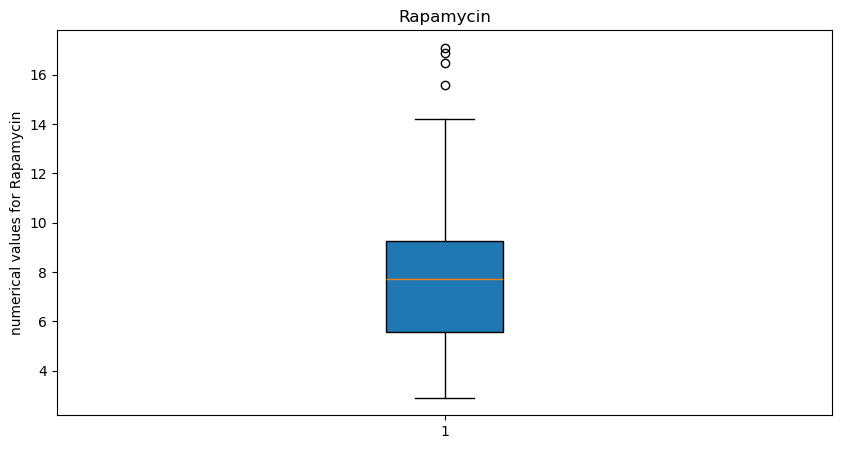

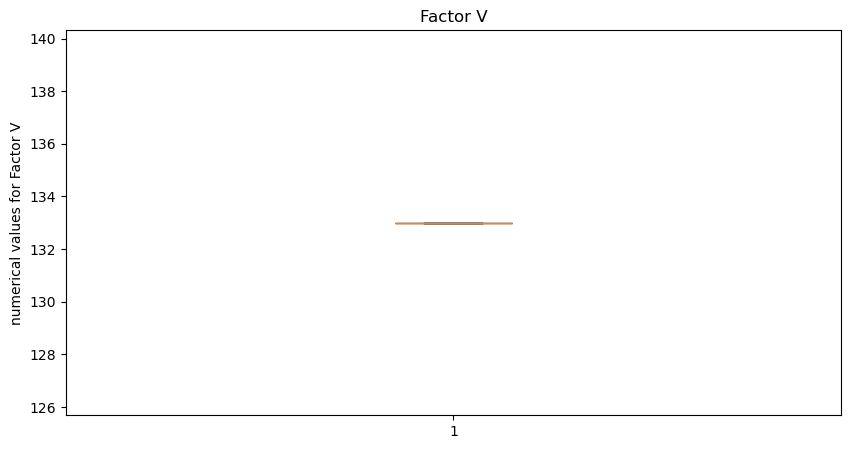

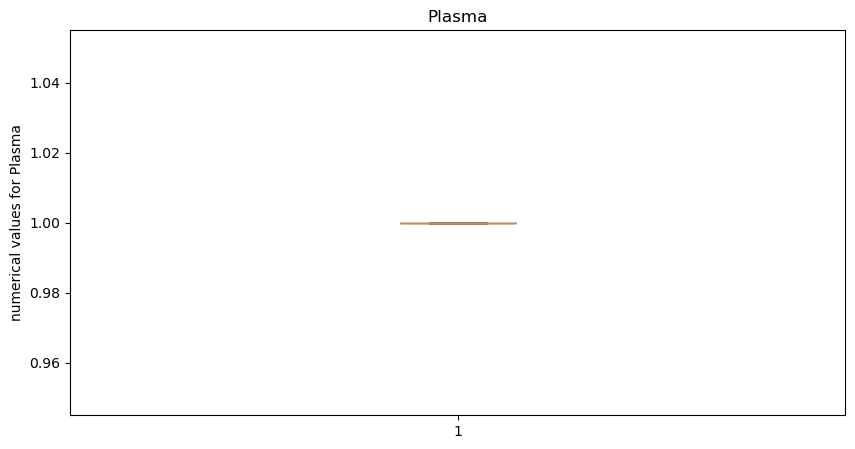

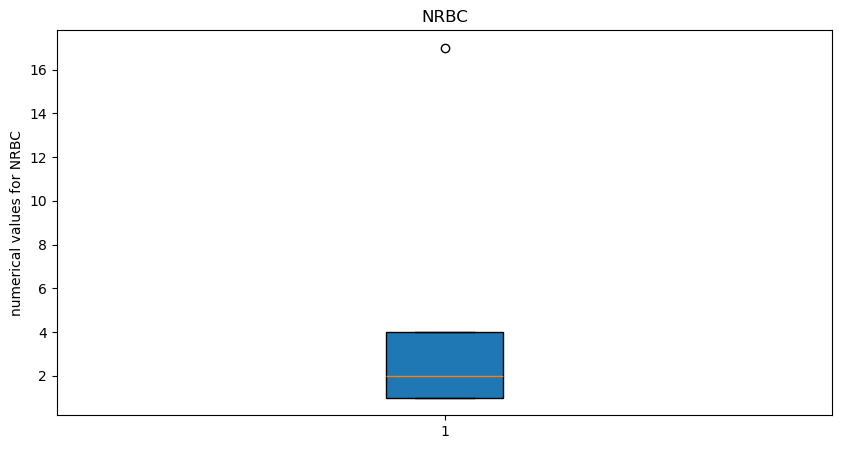

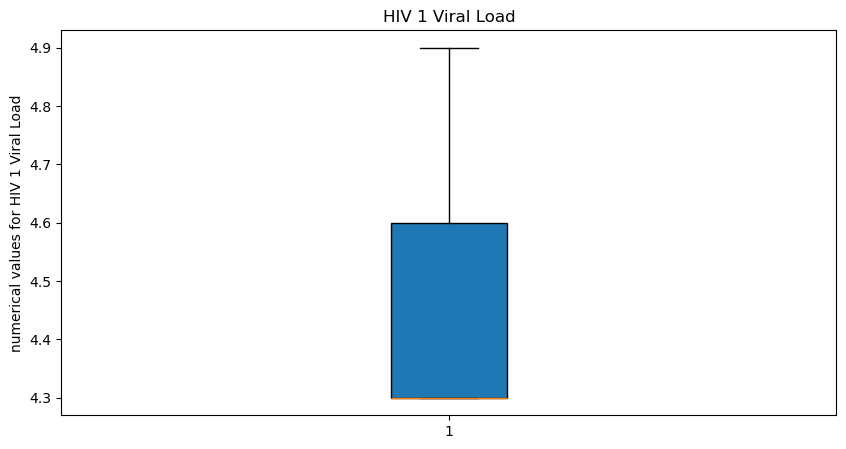

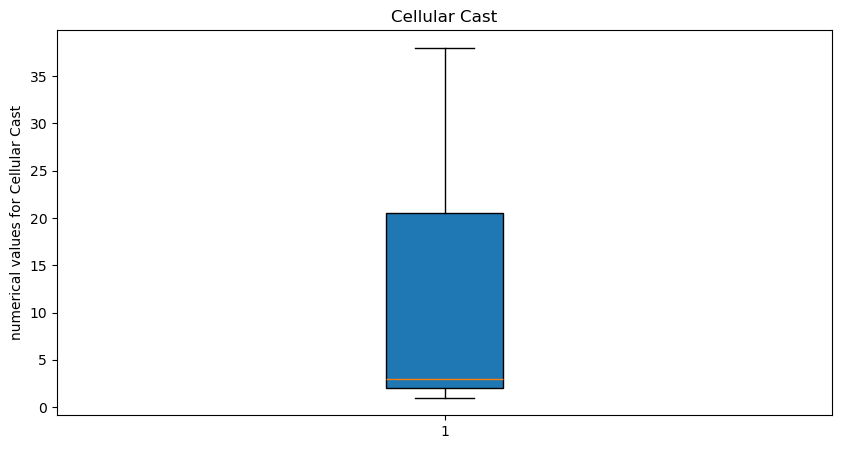

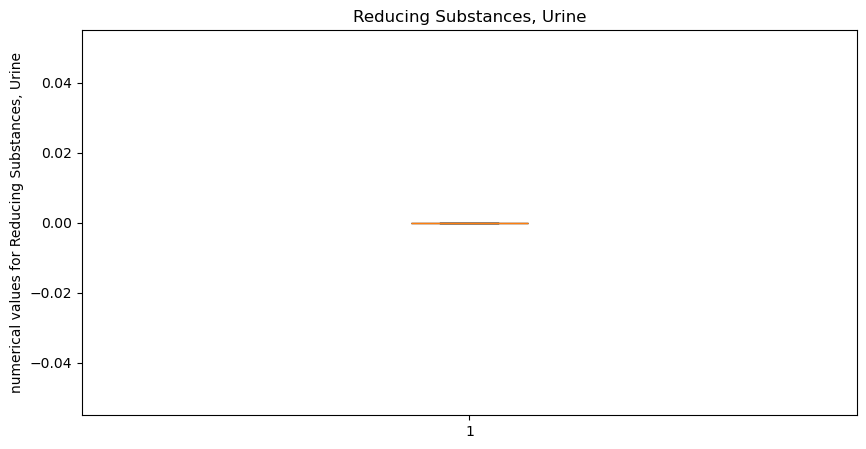

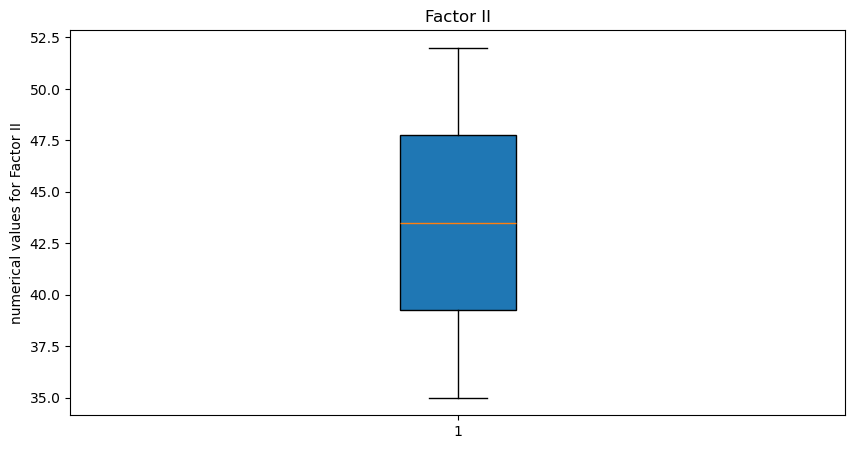

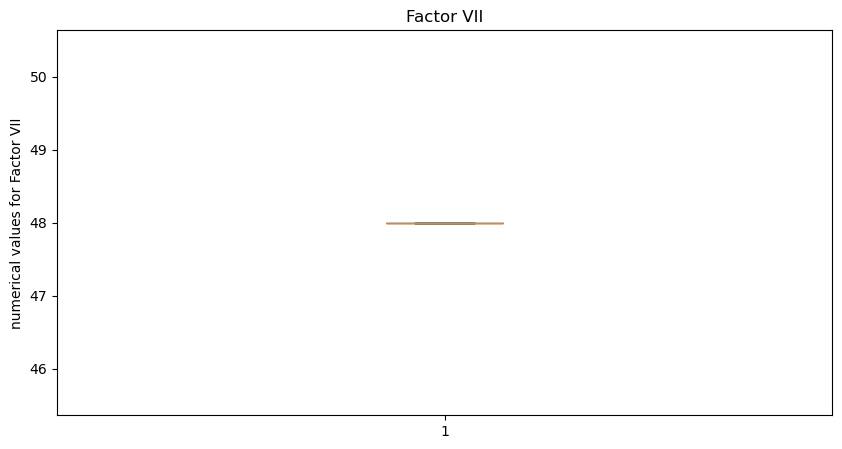

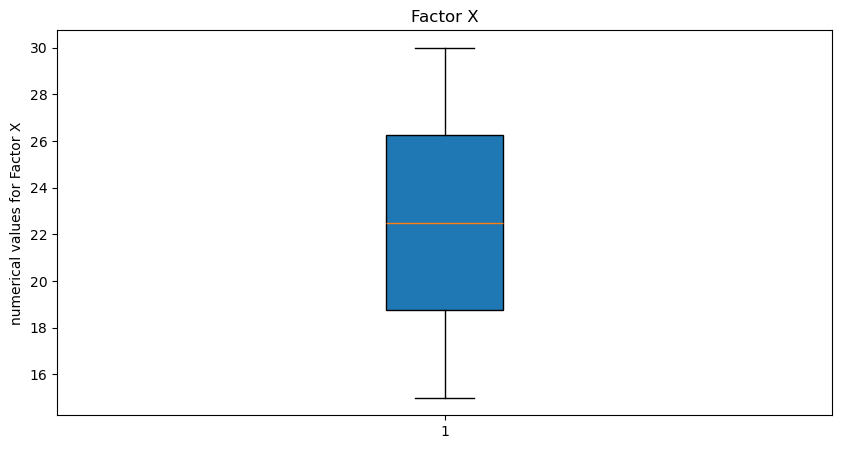

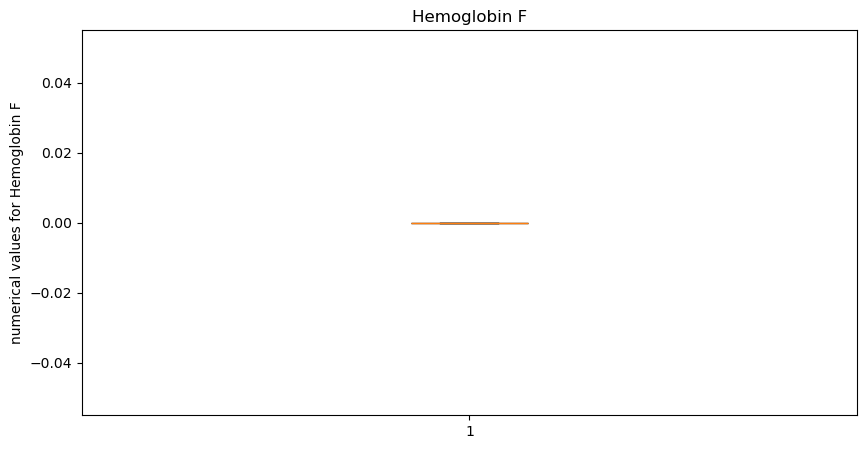

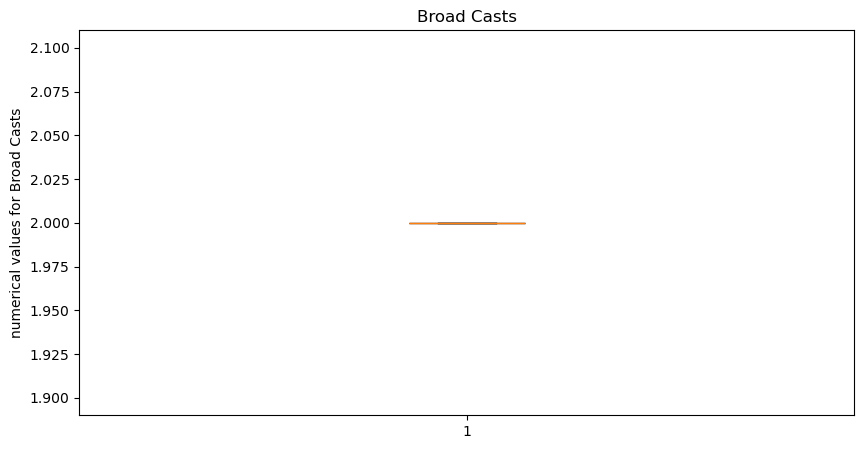

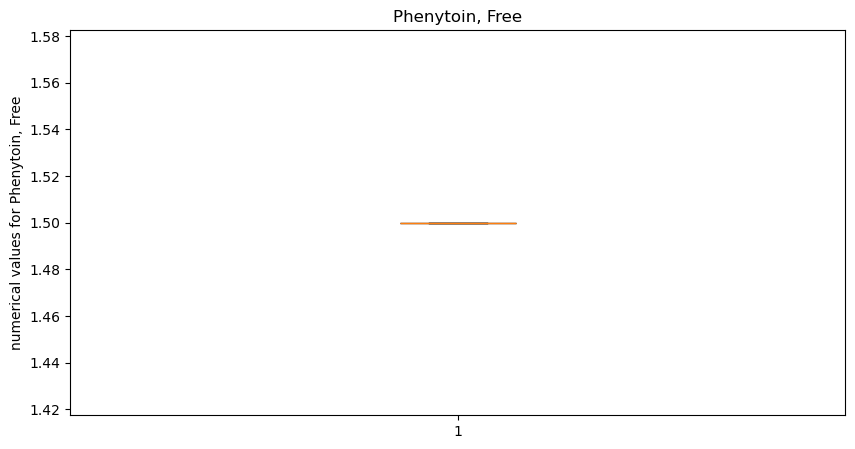

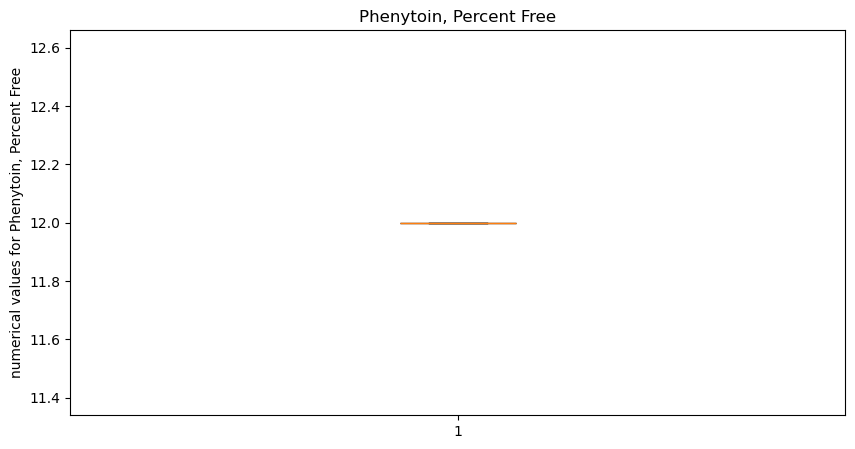

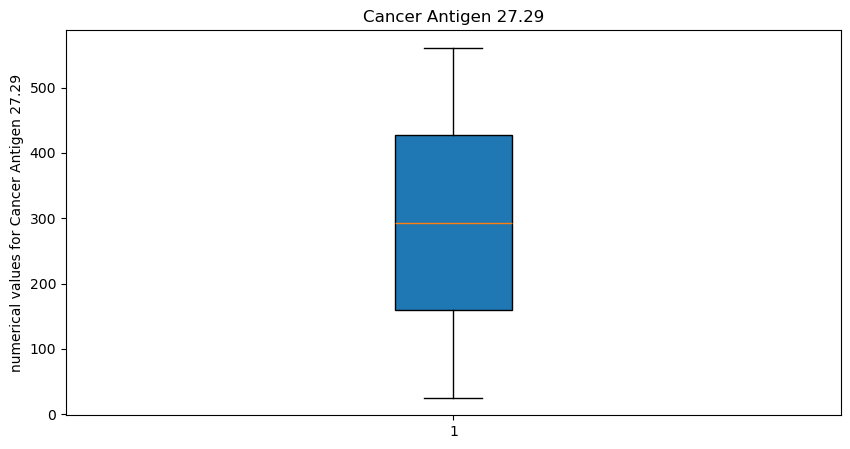

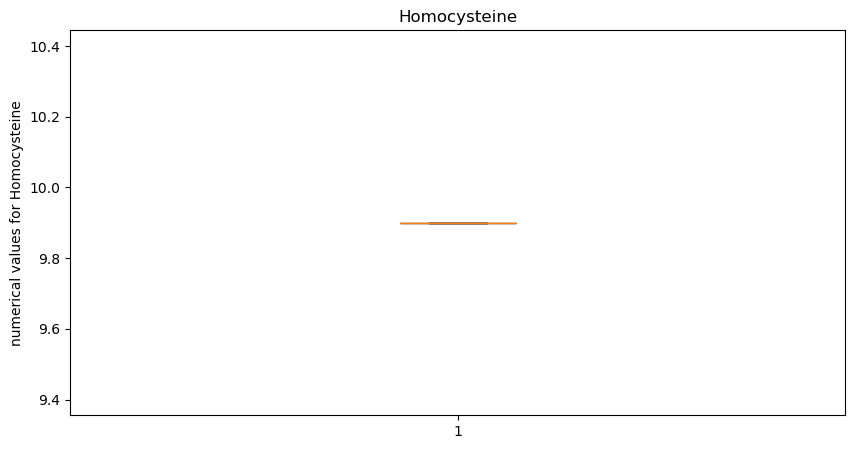

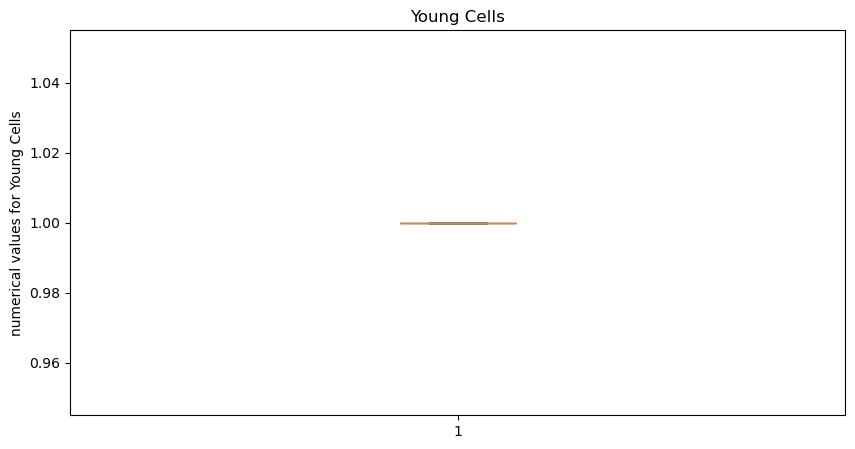

In [90]:
labels = df['label'].unique()
for l in labels: 
    n_values = df[df['label'] == l]['valuenum']
    q1 = n_values.quantile(0.25)
    q3 = n_values.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = n_values[(n_values < lower_bound) | (n_values > upper_bound)]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot(n_values, vert=True, patch_artist=True)
    ax.set_title(f"{l}")
    ax.set_ylabel("numerical values for " + l)
    plt.show()

### 1.3.3 Feature projection

bar chart of valid/invalid tests

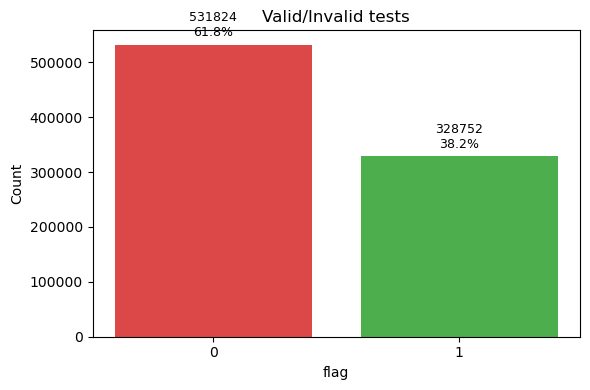

In [26]:
counts = df['flag'].value_counts()
labels = counts.index.astype(str)

fig, ax = plt.subplots(figsize=(6, 4))
colors = ['tab:green' if str(l).lower() in ('1', 'true', 'yes', 'valid', 'v') else 'tab:red' for l in labels]
bars = ax.bar(labels, counts.values, color=colors, alpha=0.85)

ax.set_title("Valid/Invalid tests")
ax.set_xlabel("flag")
ax.set_ylabel("Count")

for bar, cnt in zip(bars, counts.values):
    pct = cnt / len(df) * 100
    ax.annotate(f"{cnt}\n{pct:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()